# Credit Card Fraud Detection by MagdElDin AbdalRaaof and Yassin Riad

# Data Visualisation

Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

We'll load the dataframe first

In [3]:
df = pd.read_csv('creditcard_2023.csv')

We check for any null values

No null values are present

In [52]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Word of note, A Class value of 1 means the transaction is fraudulent

Now we'll see the details of each of the columns (except the class) for further analysis.

We do this by checking the column itself, then the fraudulent subset, then the non-fraudulent subset.

Here we create a function to help us visualize

We also made a function to draw a heatmap matrix to check correlations

In [9]:
def plot_hist_and_box(df,col):
    fig, ax = plt.subplots(2, 3, figsize=(30, 10))

    ax[0,0].set_title('Histogram for All Transactions')
    sns.histplot(data=df, x=col, ax=ax[0,0])

    ax[0,1].set_title('Histogram for Fraudulent Transactions')
    sns.histplot(data=df[df['Class'] == 1], x=col, ax=ax[0,1])

    ax[0,2].set_title('Histogram for Legitimate Transactions')
    sns.histplot(data=df[df['Class'] == 0], x=col, ax=ax[0,2])

    ax[1,0].set_title('Boxplot for All Transactions')
    sns.boxplot(data=df, x=col, ax=ax[1,0])

    ax[1,1].set_title('Boxplot for Fraudulent Transactions')
    sns.boxplot(data=df[df['Class'] == 1], x=col, ax=ax[1,1])

    ax[1,2].set_title('Boxplot for Legitimate Transactions')
    sns.boxplot(data=df[df['Class'] == 0], x=col, ax=ax[1,2])

plt.show()


In [10]:
def draw_heat_graph(df):
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Heatmap for dataframe")
    plt.show()

## Without Changing Data

### V1

We can see the overall column is mostly Gaussian and the fraudulent transactions are more Gaussian, but the non-fraudulent transactions are weird since they seem to operate in waves

The fraudulent traansactions seem to emphasize the point of having a standard distribution since even the outliers are almost balaneced across both sides.

The legitimate transactions have many outliers on the lower end of the spectrum

The inclusion of both makes the box plot for the overall column a mix where it is shifted to the right like the legitimate transactions but it has less outliers as a consequence of mixing both


A new thing to note is how most legitimate transactions are either near 0 or on the positive end

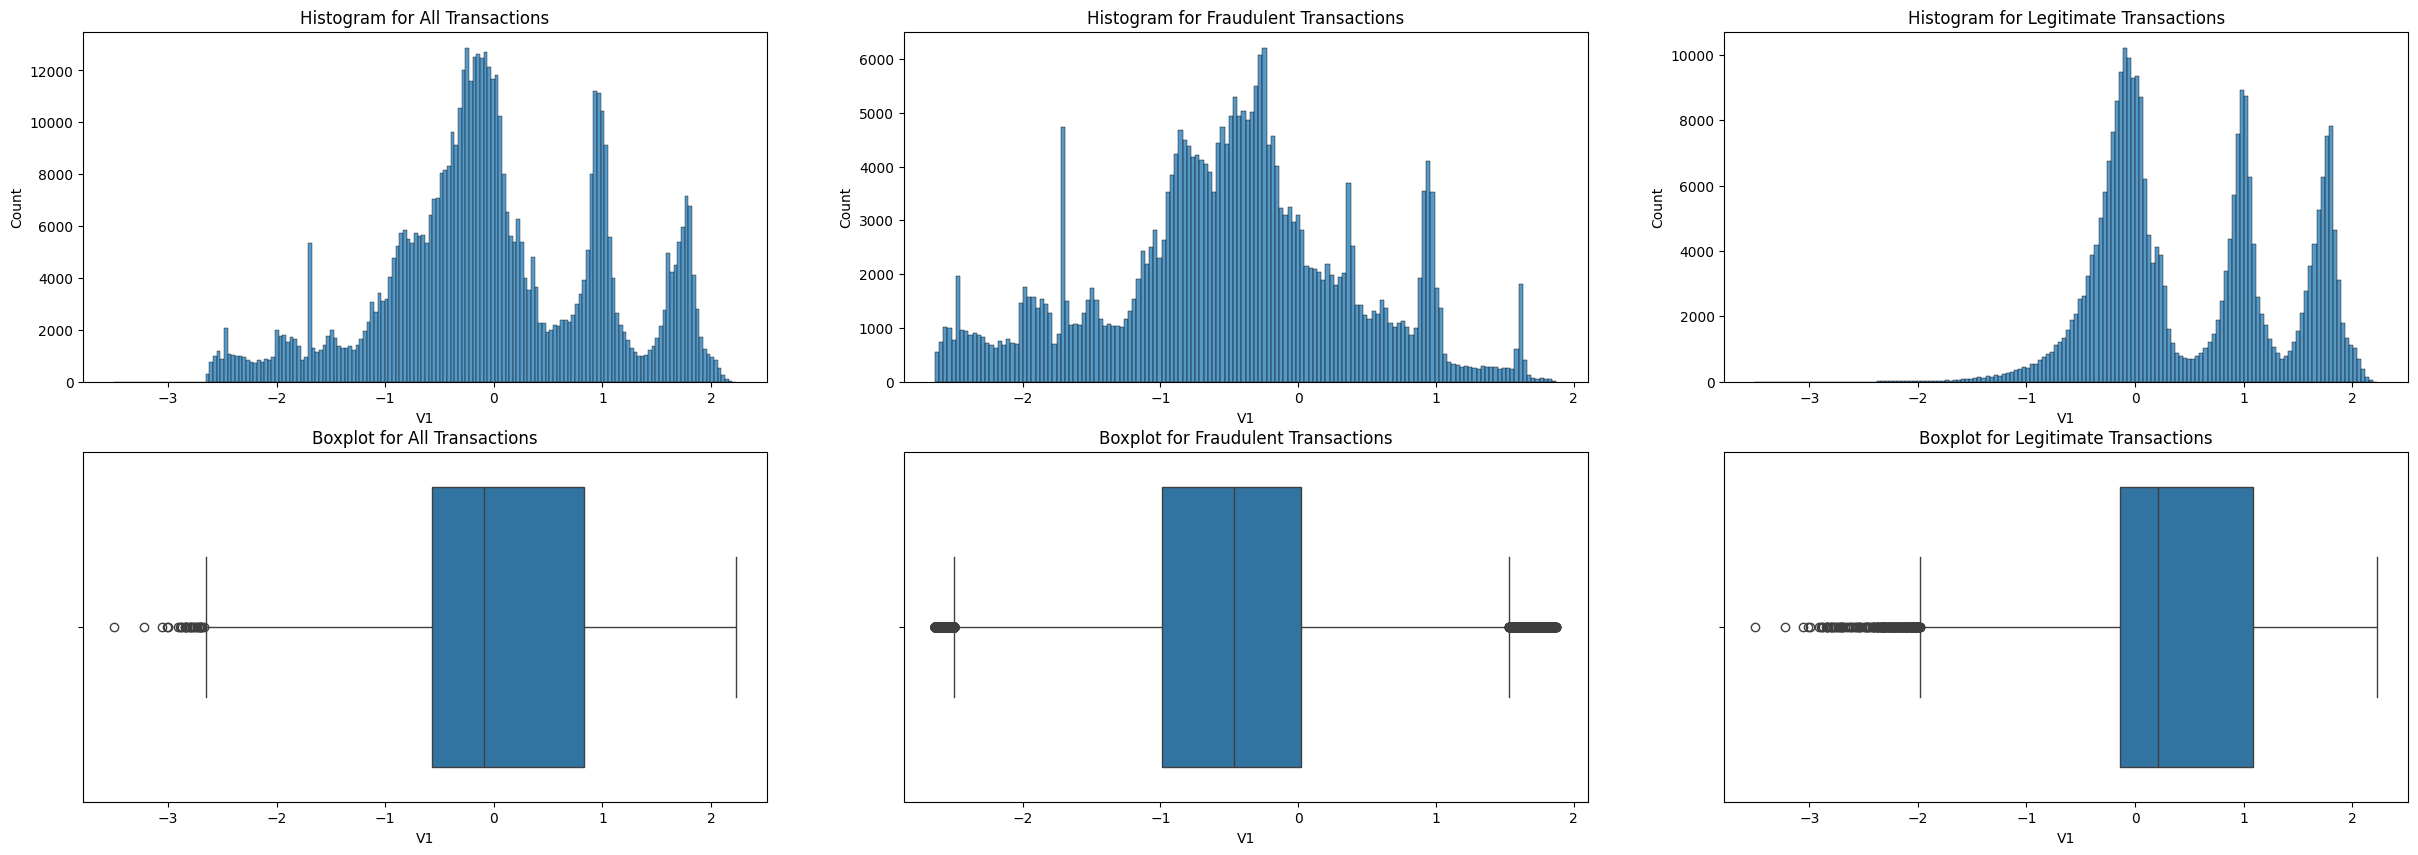

In [50]:
plot_hist_and_box(df,'V1')

### V2

V2 clearly has severe outliers messing with the data, notably it is a legitimate transaction as the fraudulent transactions are Gaussian while the legitimate transactions share the skewed shape of the main column.

The box plots prove our hypothesis of an outlier being present among the legitimate transactions.

So far, it seems that fraudulent transactions follow a certain pattern while legitimate transactions are much more random. Whether or not this holds true for the rest of the dataset remains to be seen

At this point, I started noticing repetition in the code that warrants the creation of a function for our plotting purposes. Initially the code was copied and pasted, but this will change now and applied retroactively

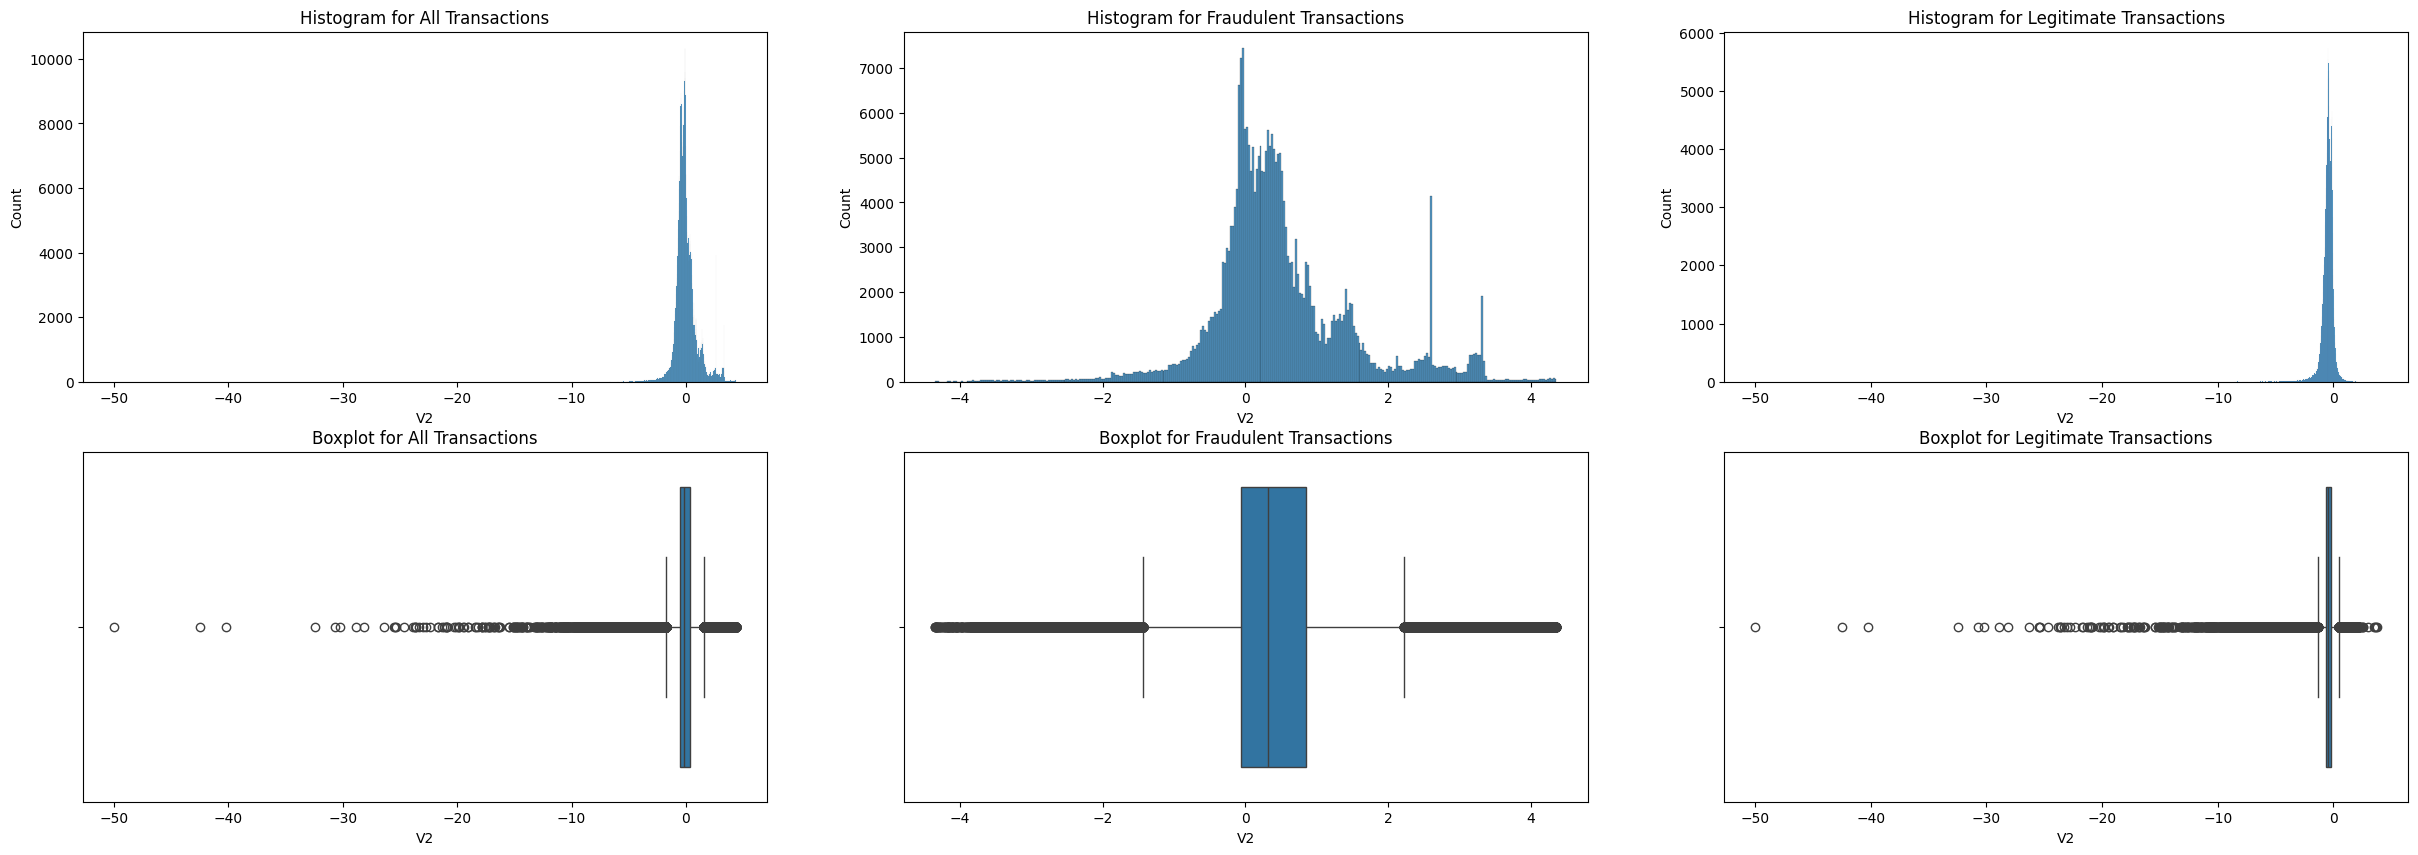

In [51]:
plot_hist_and_box(df,'V2')

### V3

Most of these are almost Gaussian, which is great since that only means we need to shift a little bit. We do need to not the absurd outlier caused by a legitimate transaction.

We can also note that legitimate transactions are much more tightly distributed while fraudulent transactions are more spread out.

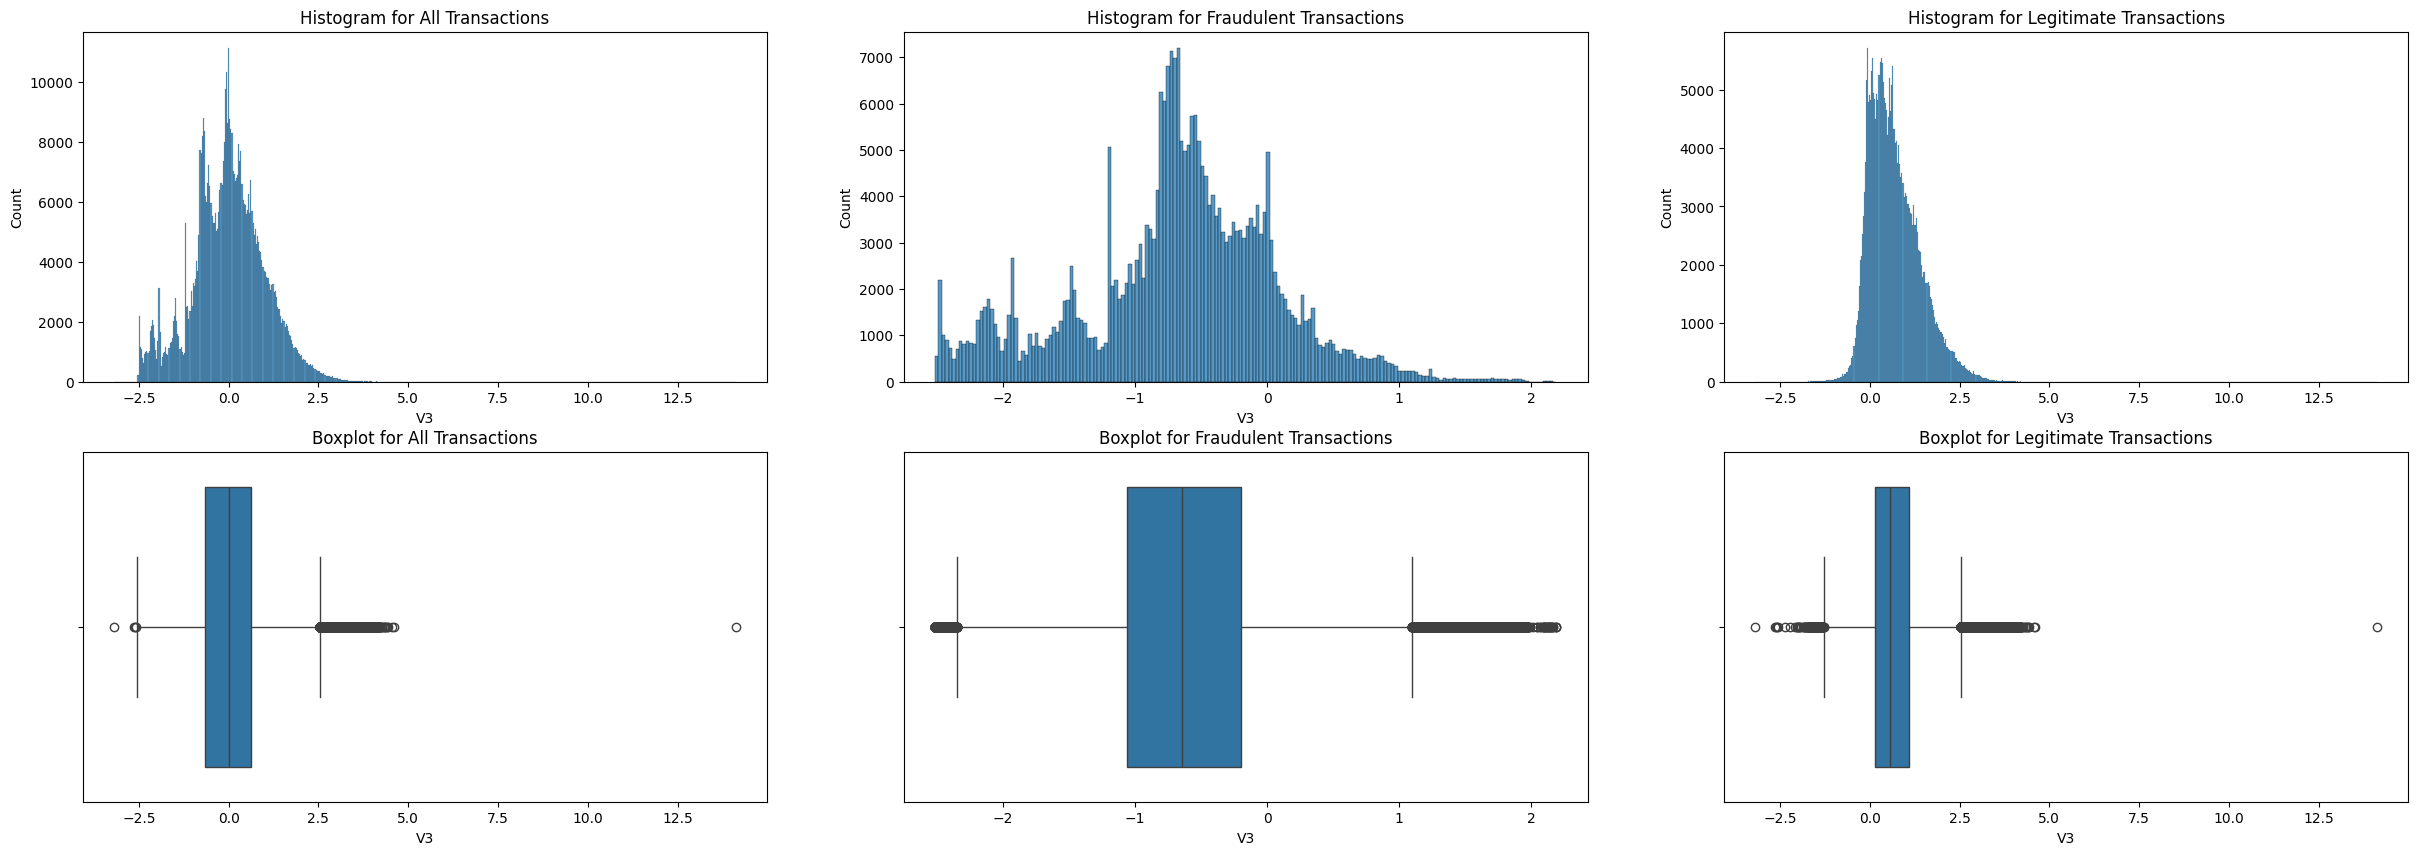

In [53]:
plot_hist_and_box(df,'V3')

### V4

We can assume from here on out that most of these are going to be close to Gaussian where the only changes necessary are either the use of log or exponentials. We will only write down any interesting observations that don't fit the prior description.

V4's fraudulent transactions do show a weird pattern where there are too many spikes in frequency for a Gaussian distribution to be blindly assumed. Either a transformation is in order, or something else has to be done

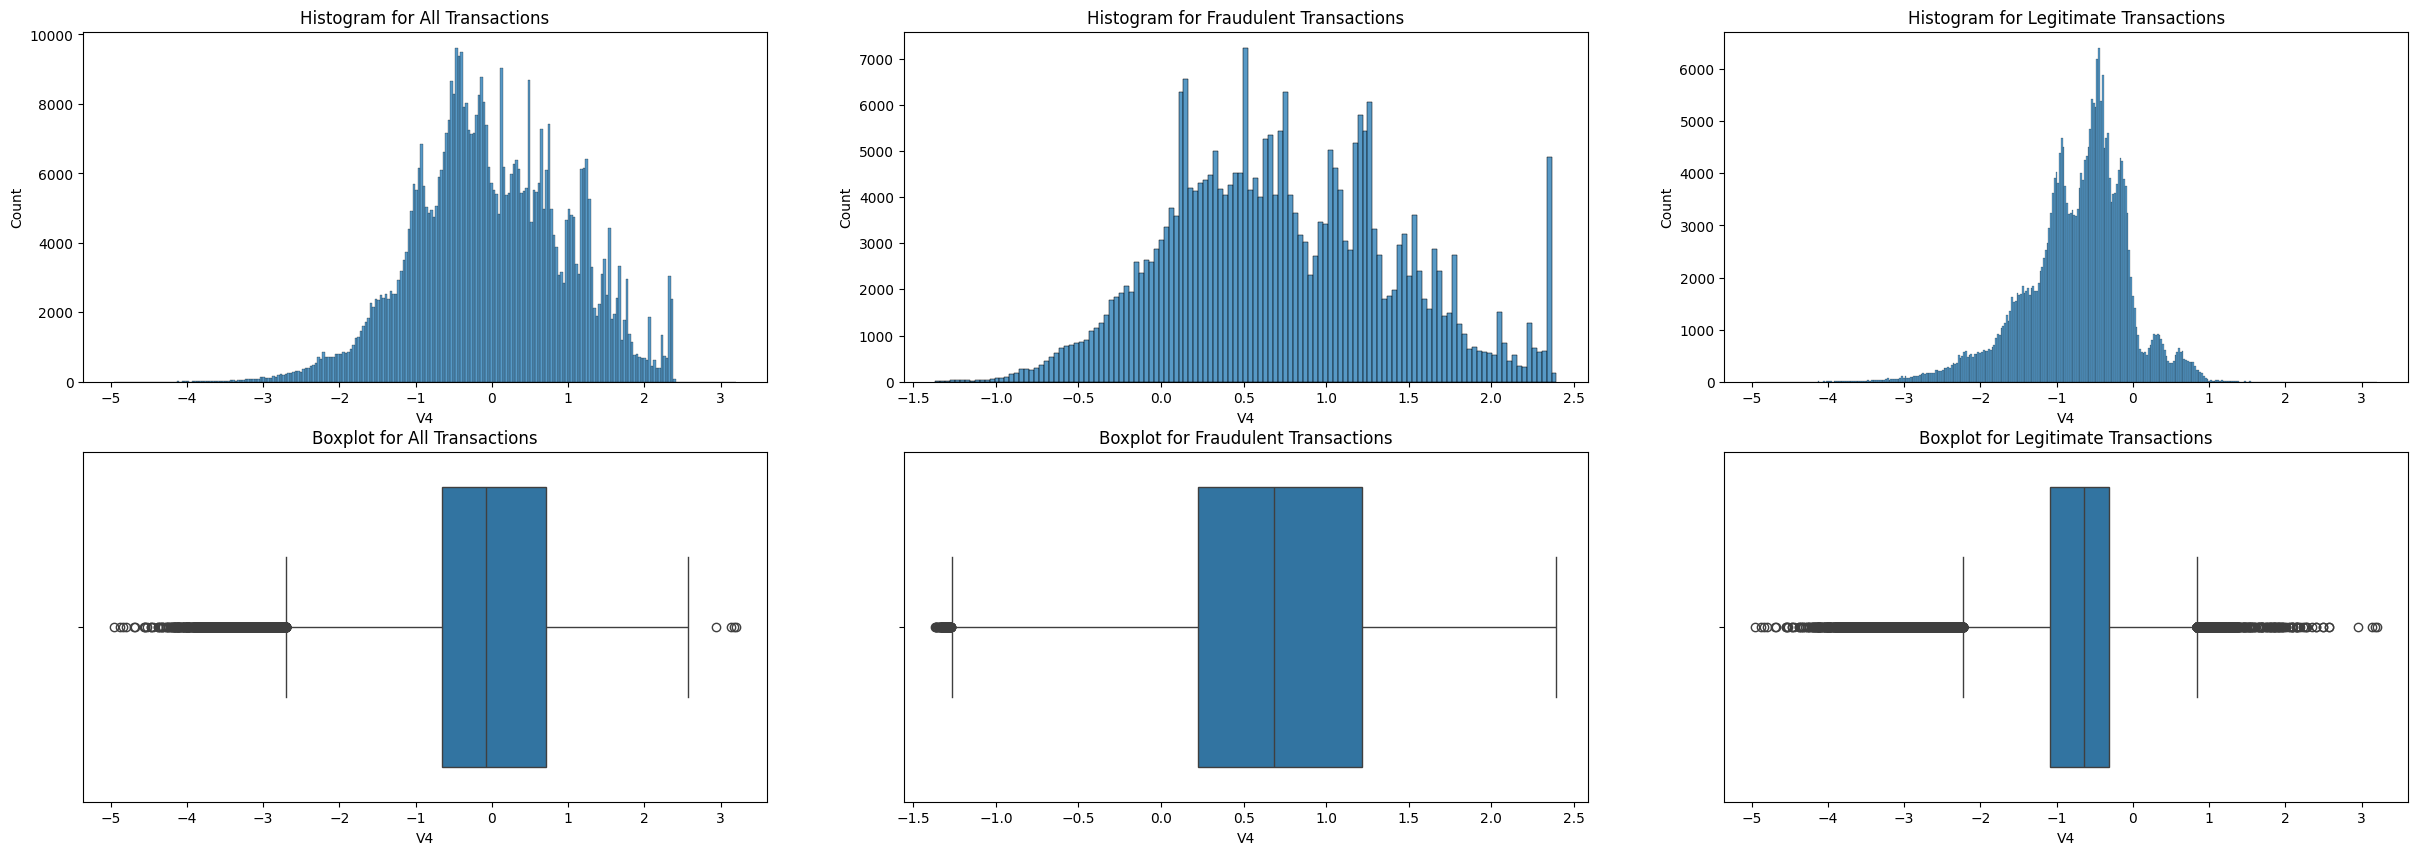

In [54]:
plot_hist_and_box(df,'V4')

### V5

Many outliers can be seen from the side of the legitimate transactions

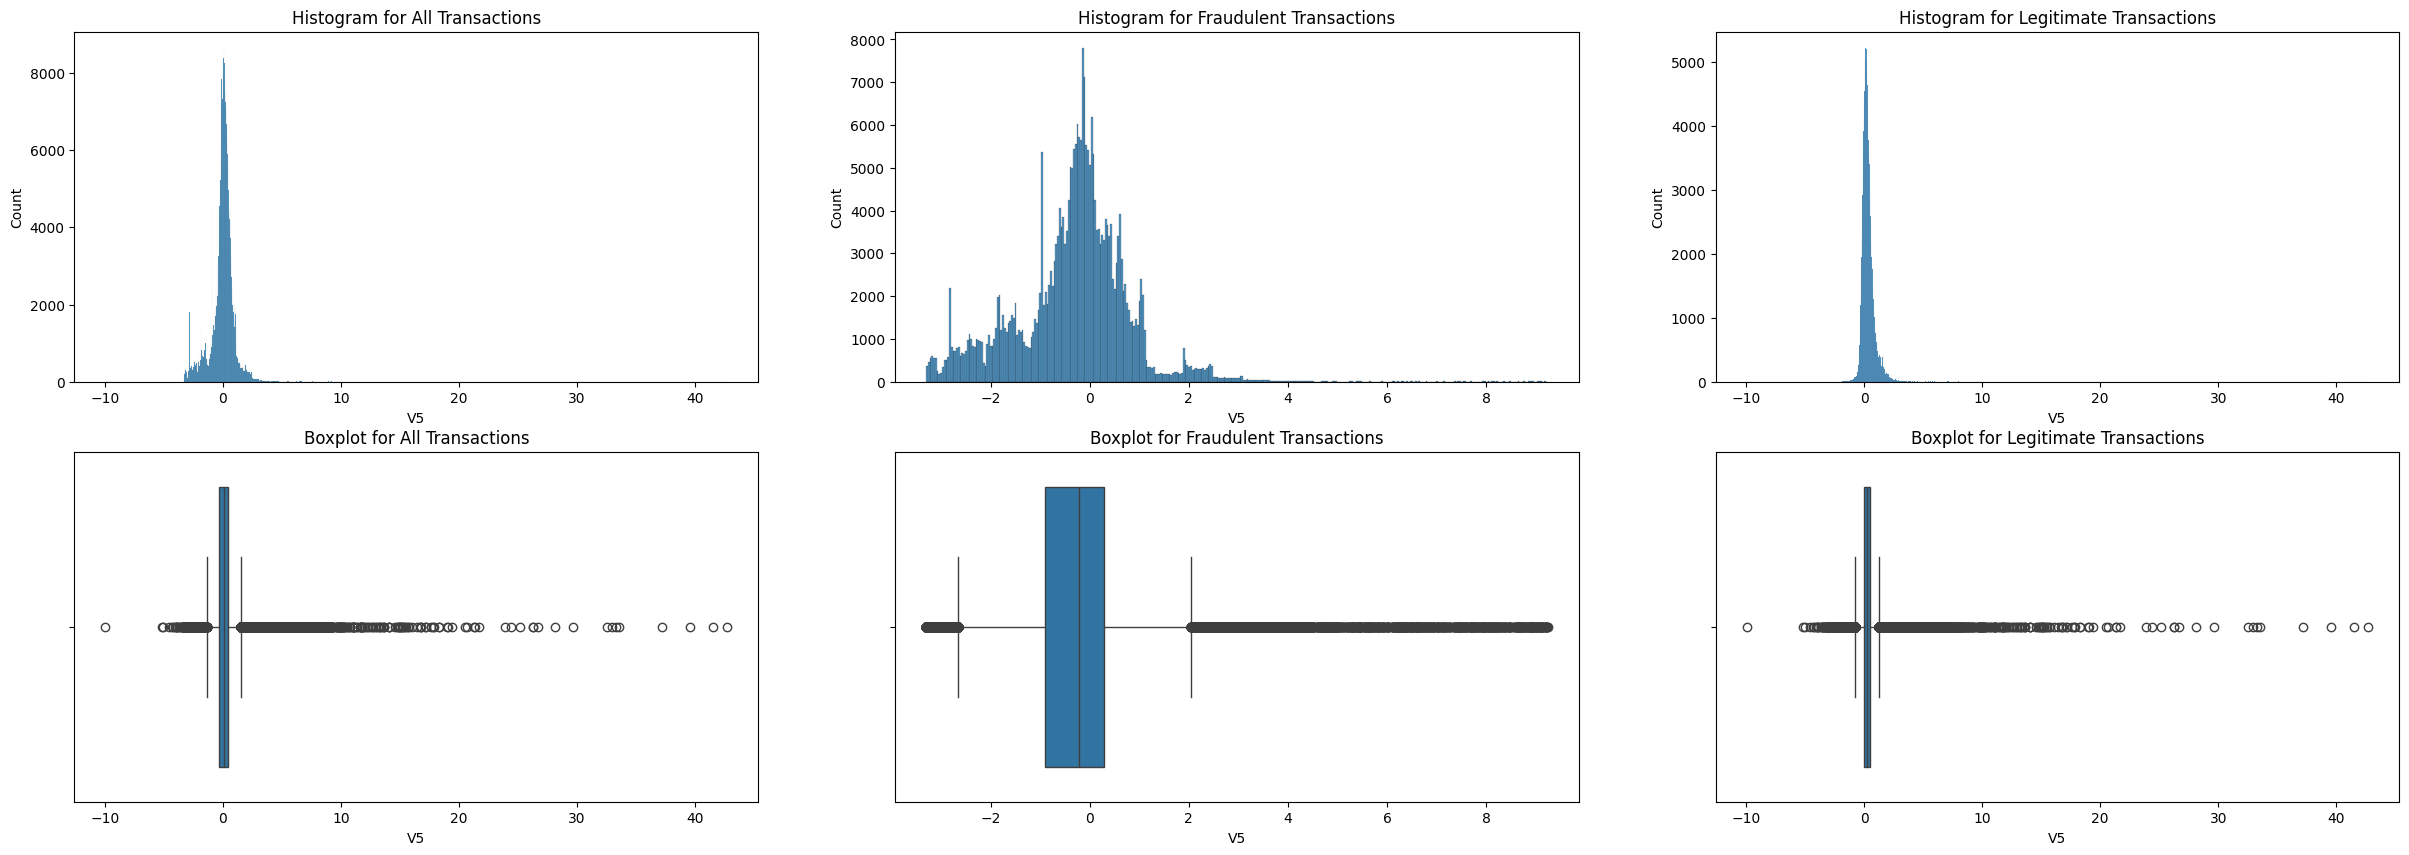

In [55]:
plot_hist_and_box(df,'V5')

### V6

The outliers for the legitimate transactions are spread out over both sides, which is interesting.

Additionally, there is a weird spike at the edge of the fraudulent transaction histogram

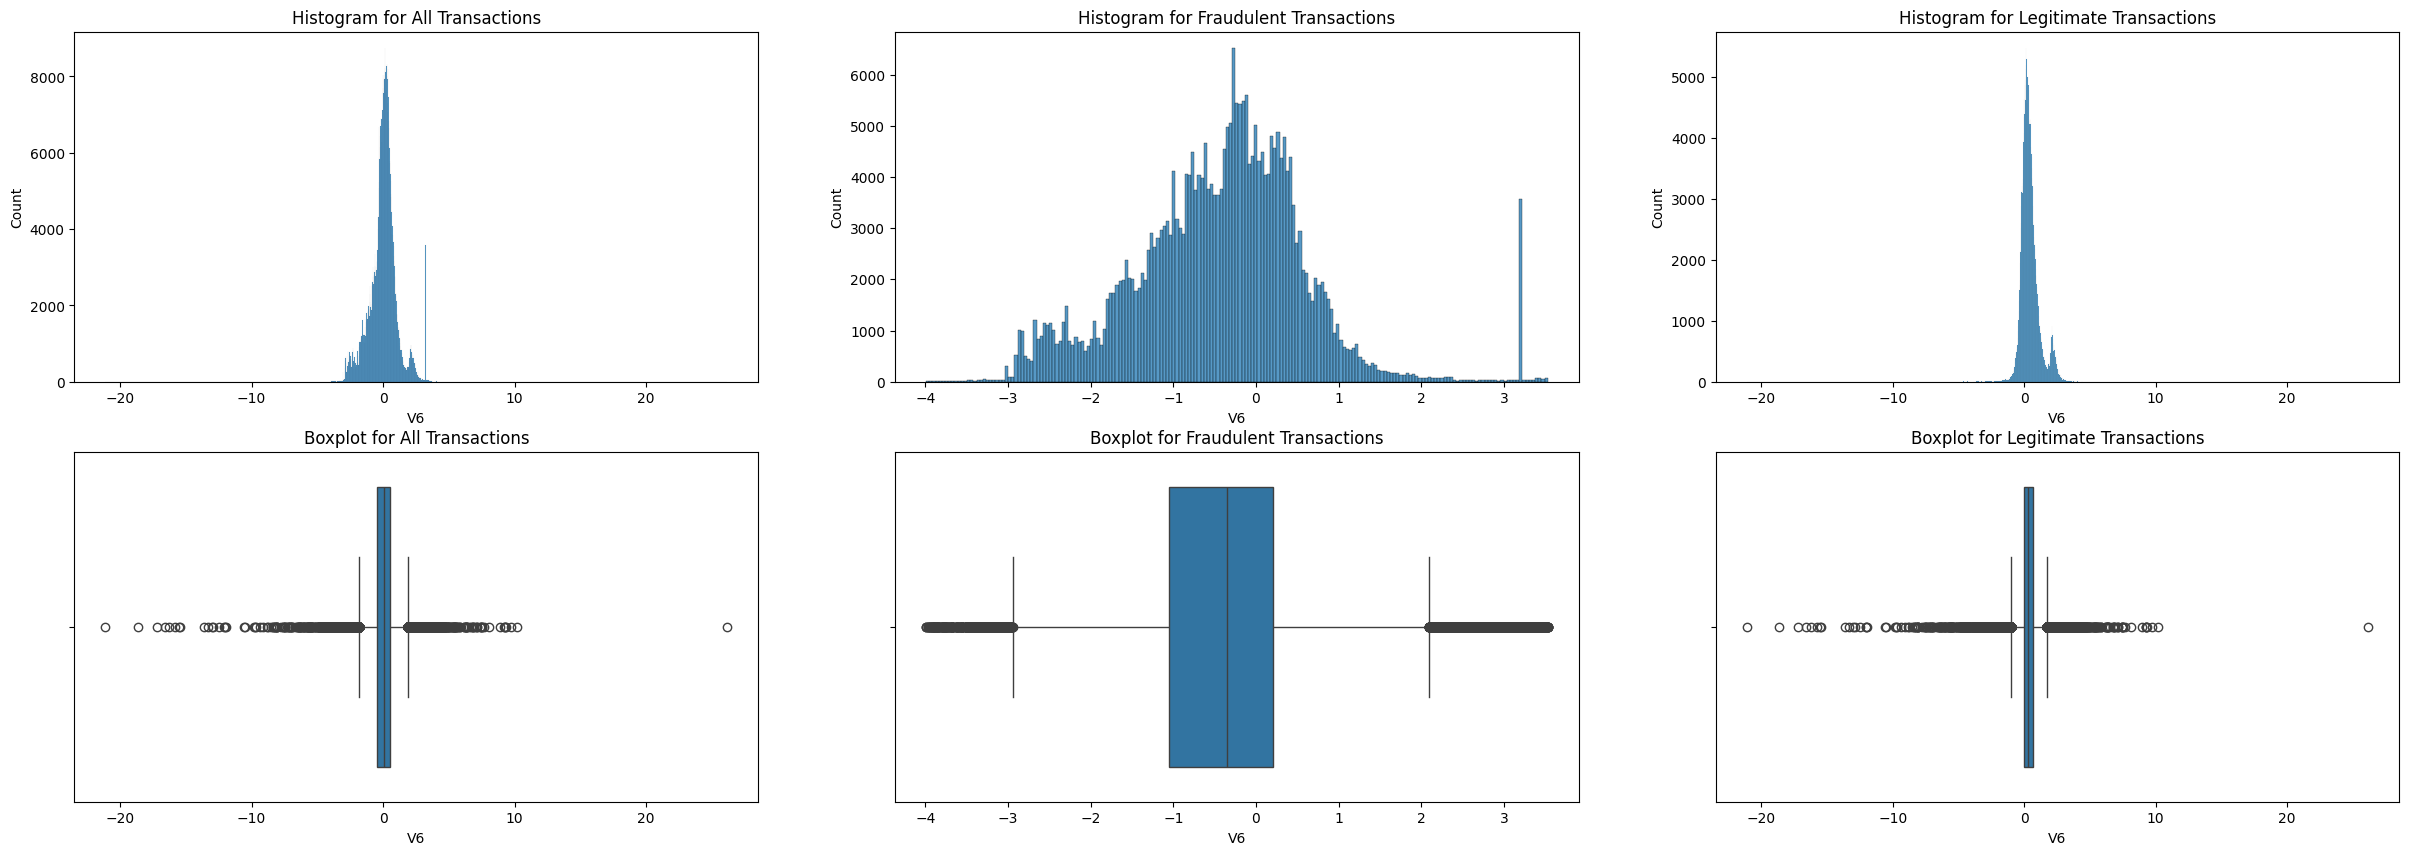

In [56]:
plot_hist_and_box(df,'V6')

### V7

Weird spikes near the edges of fraudulent transactions and an outlier at the edge of legitimate transactions

New hypothesis: A singular point is causing all these problems for the legitimate transactions and removing it would siginificantly improve data visualization.

The hypothesis will be tested after all columns have been visualized first.

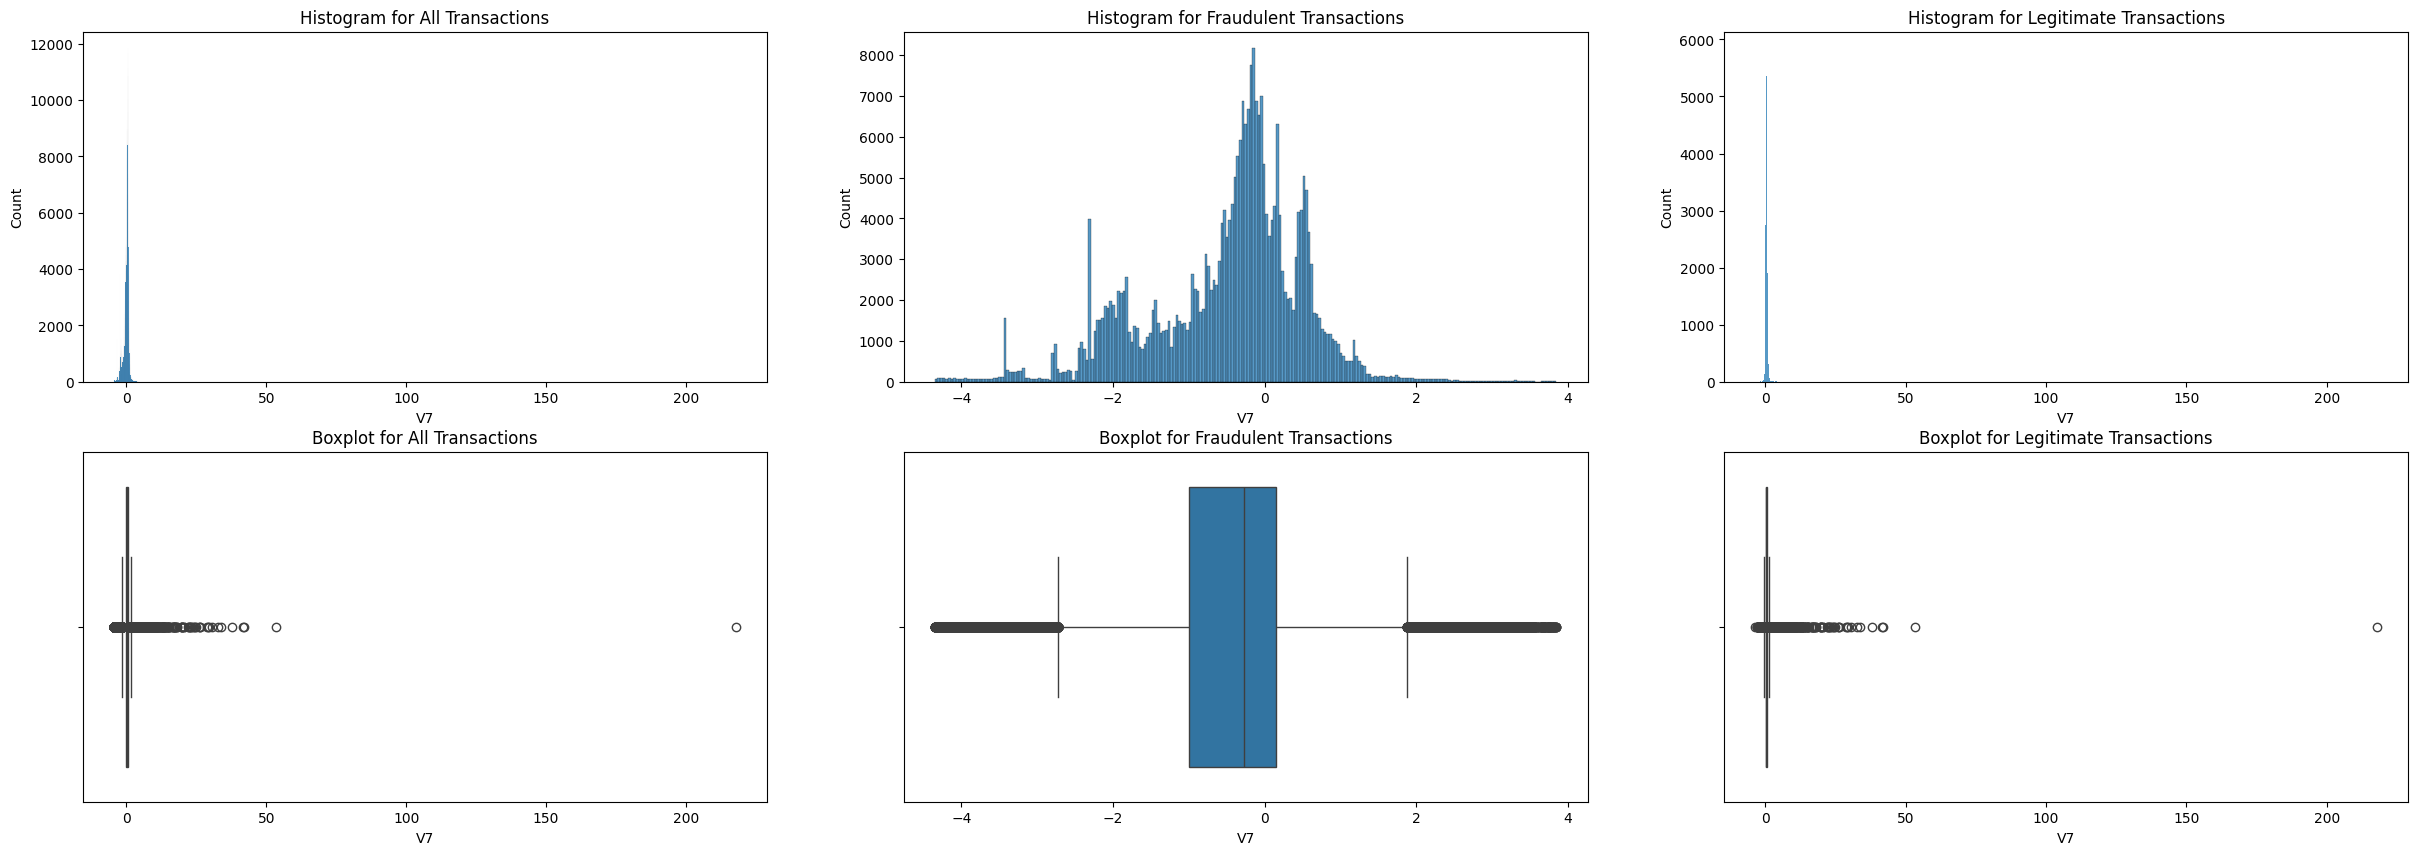

In [57]:
plot_hist_and_box(df,'V7')

### V8

Outliers aside, this is a narow, yet very close fit to Gaussian distribution throughout.

Also the outliers this time are almost equally as plentiful in both fraudulent and legitimate transactions.

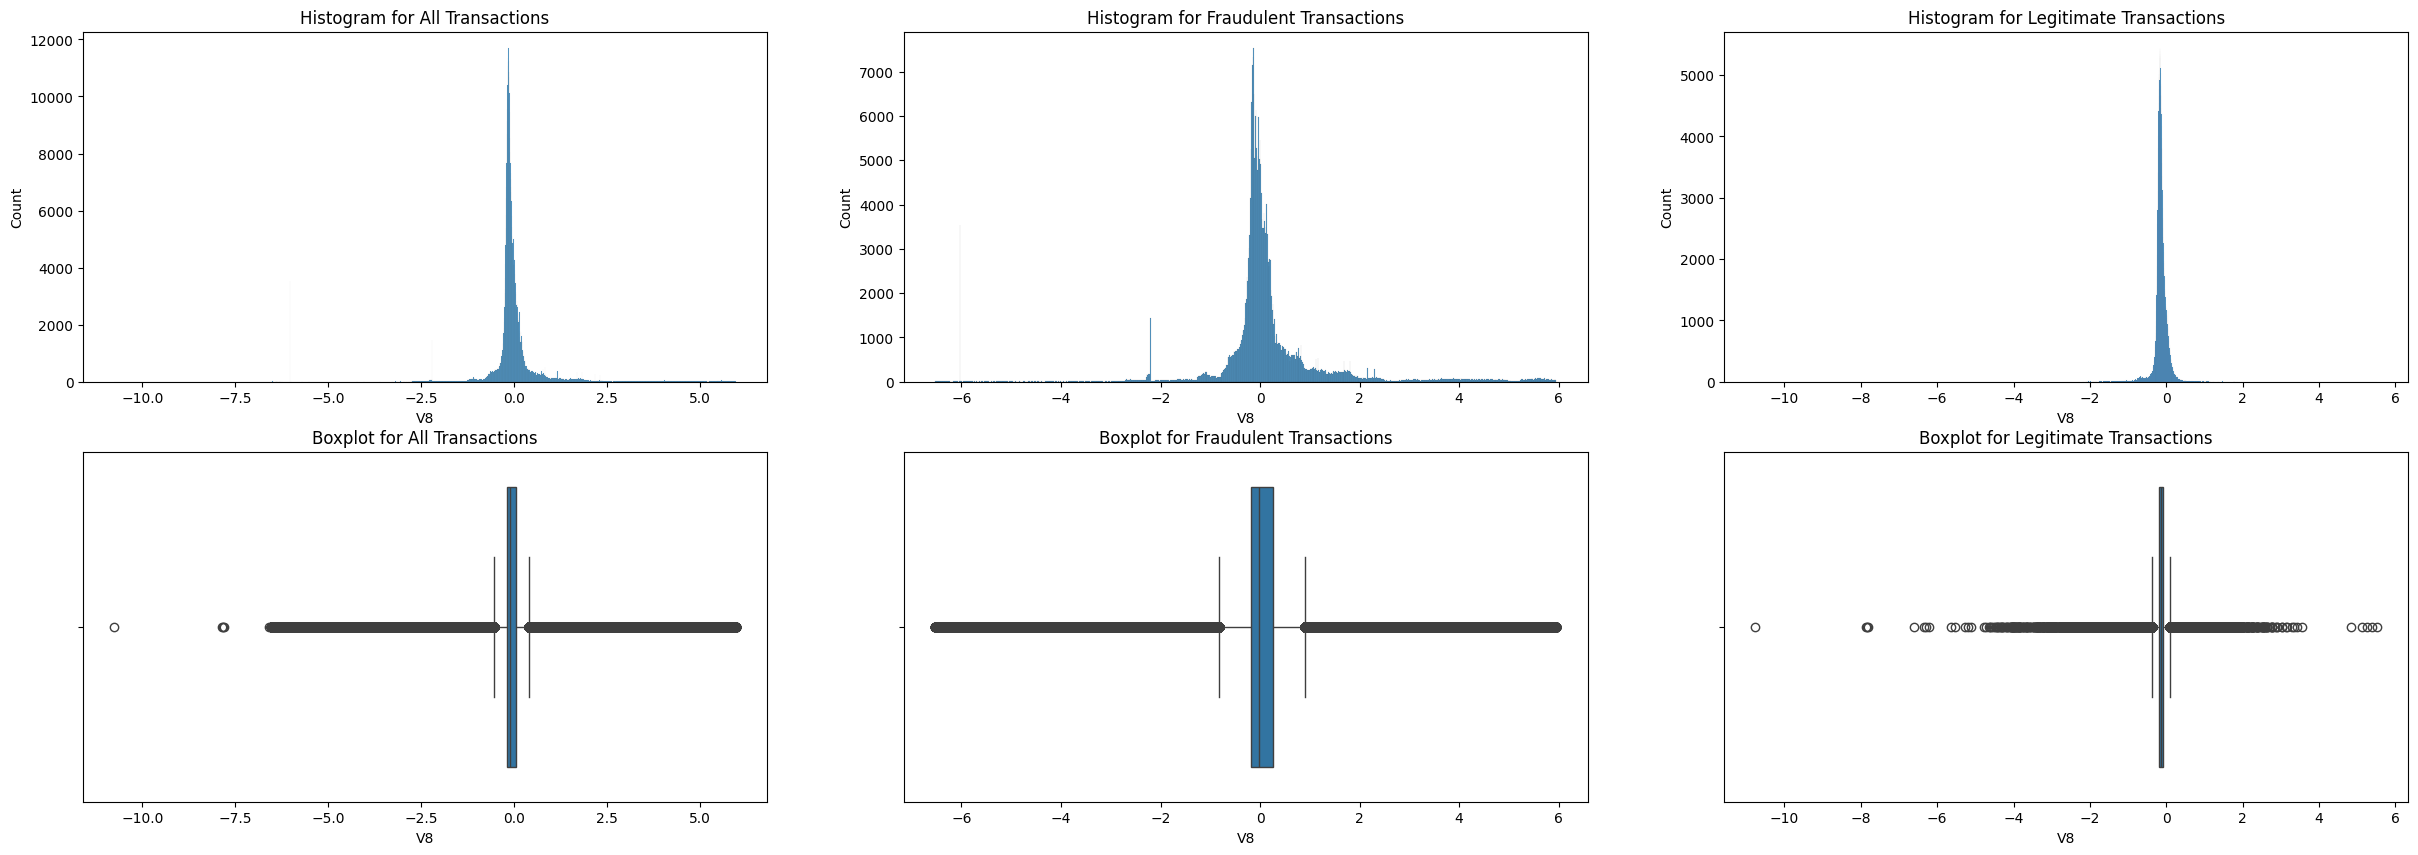

In [58]:
plot_hist_and_box(df,'V8')

### V9

Weird spikes near the edges of fraudulent transactions and an outlier at the edge of legitimate transactions

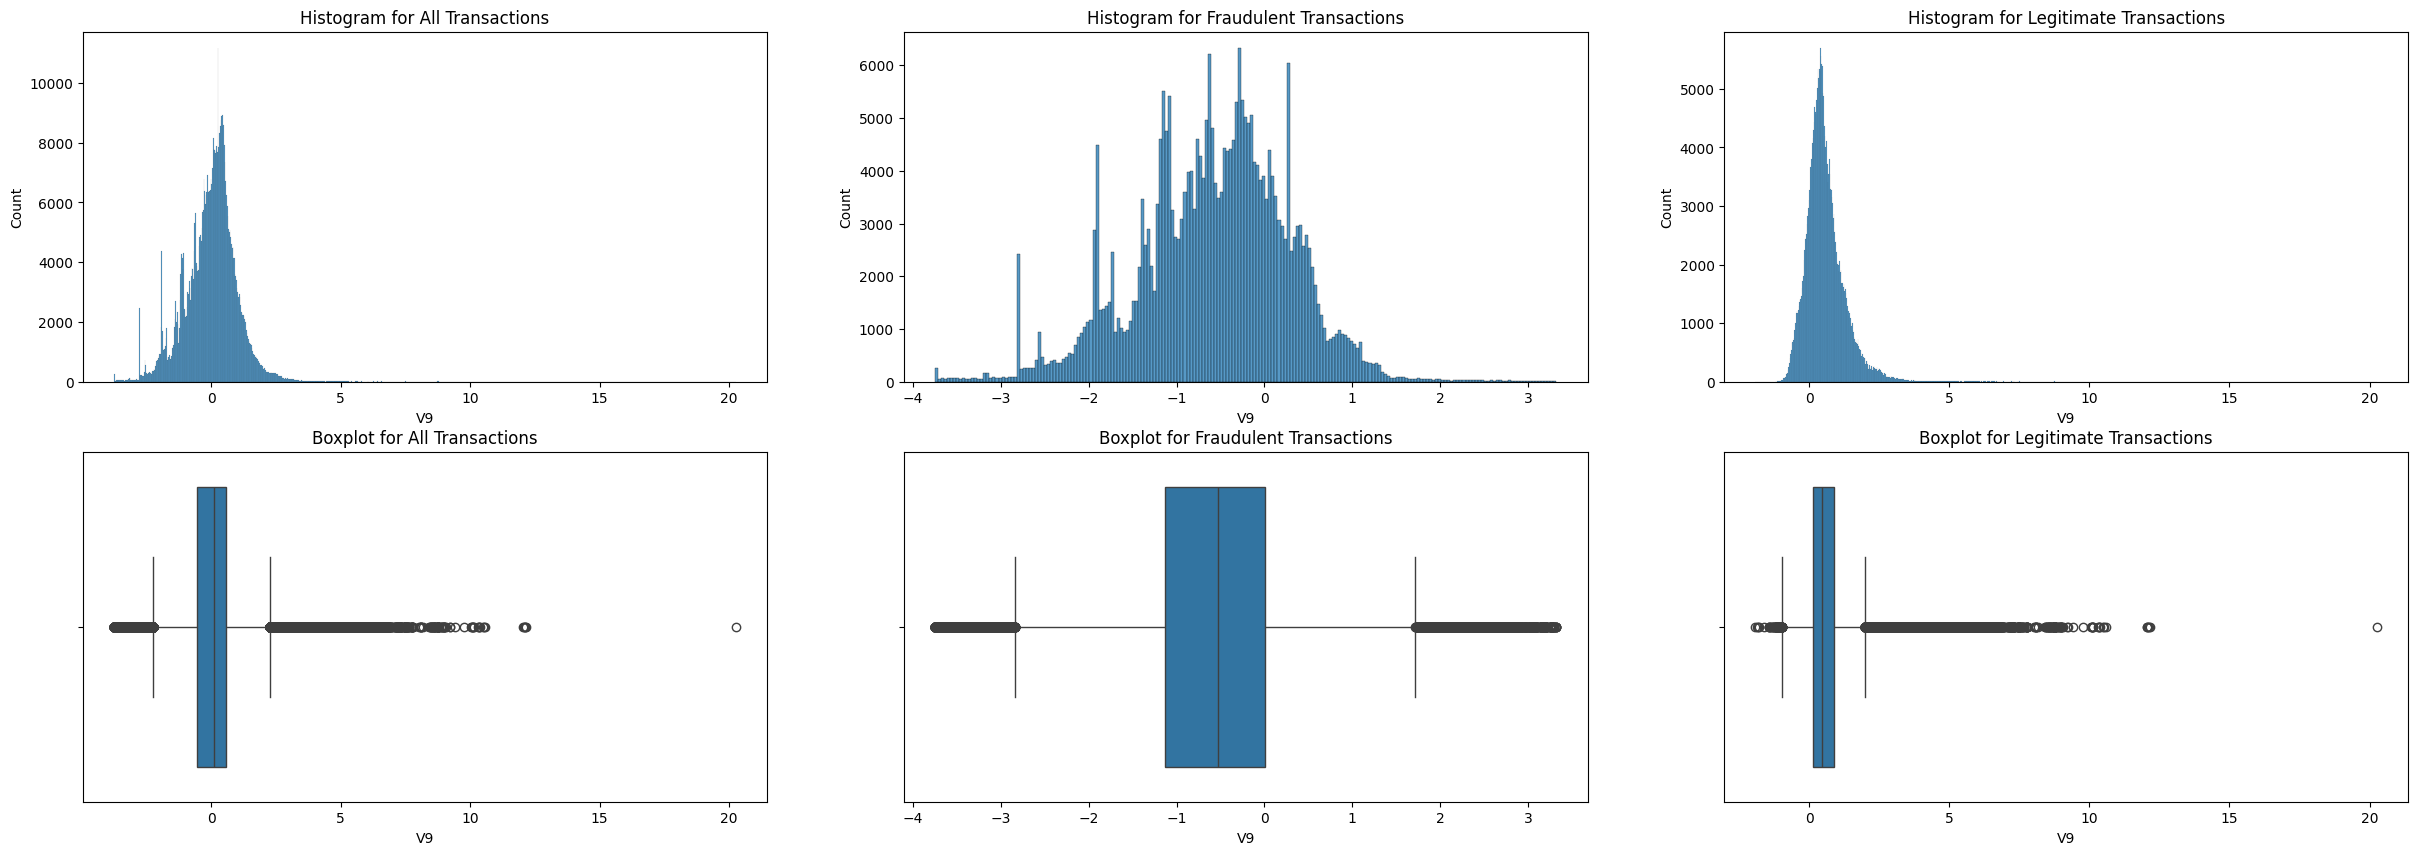

In [59]:
plot_hist_and_box(df,'V9')

### V10

Weird spikes near the edges of fraudulent transactions and an outlier at the edge of legitimate transactions

There are also interesting dips in the fraudulent transaction histogram, further consideration may be necessary

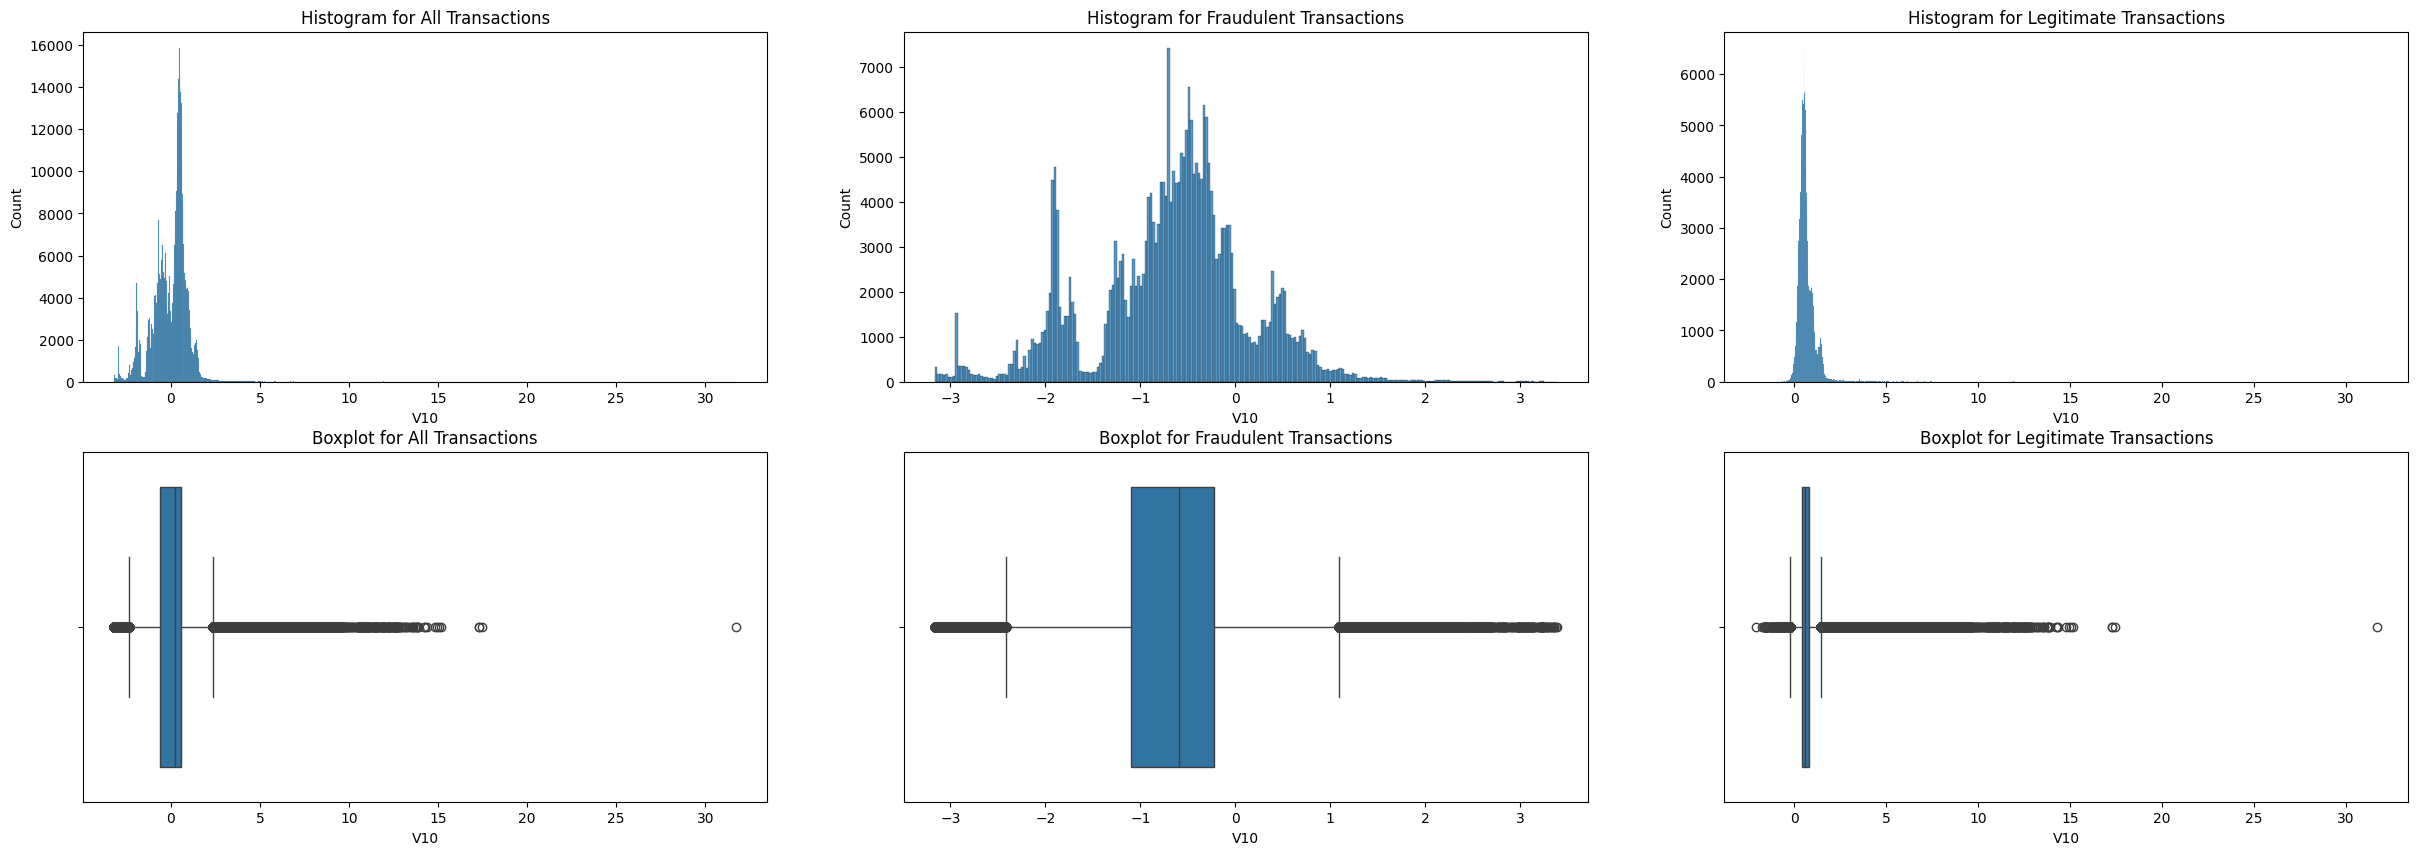

In [60]:
plot_hist_and_box(df,'V10')

### V11

The shape here is more interesting than usual since the curve is far less steep than the prior columns.

The spike present in fraudulent transactions should still be noted

One side of the legitimate transactions histogram is much steeper than the other

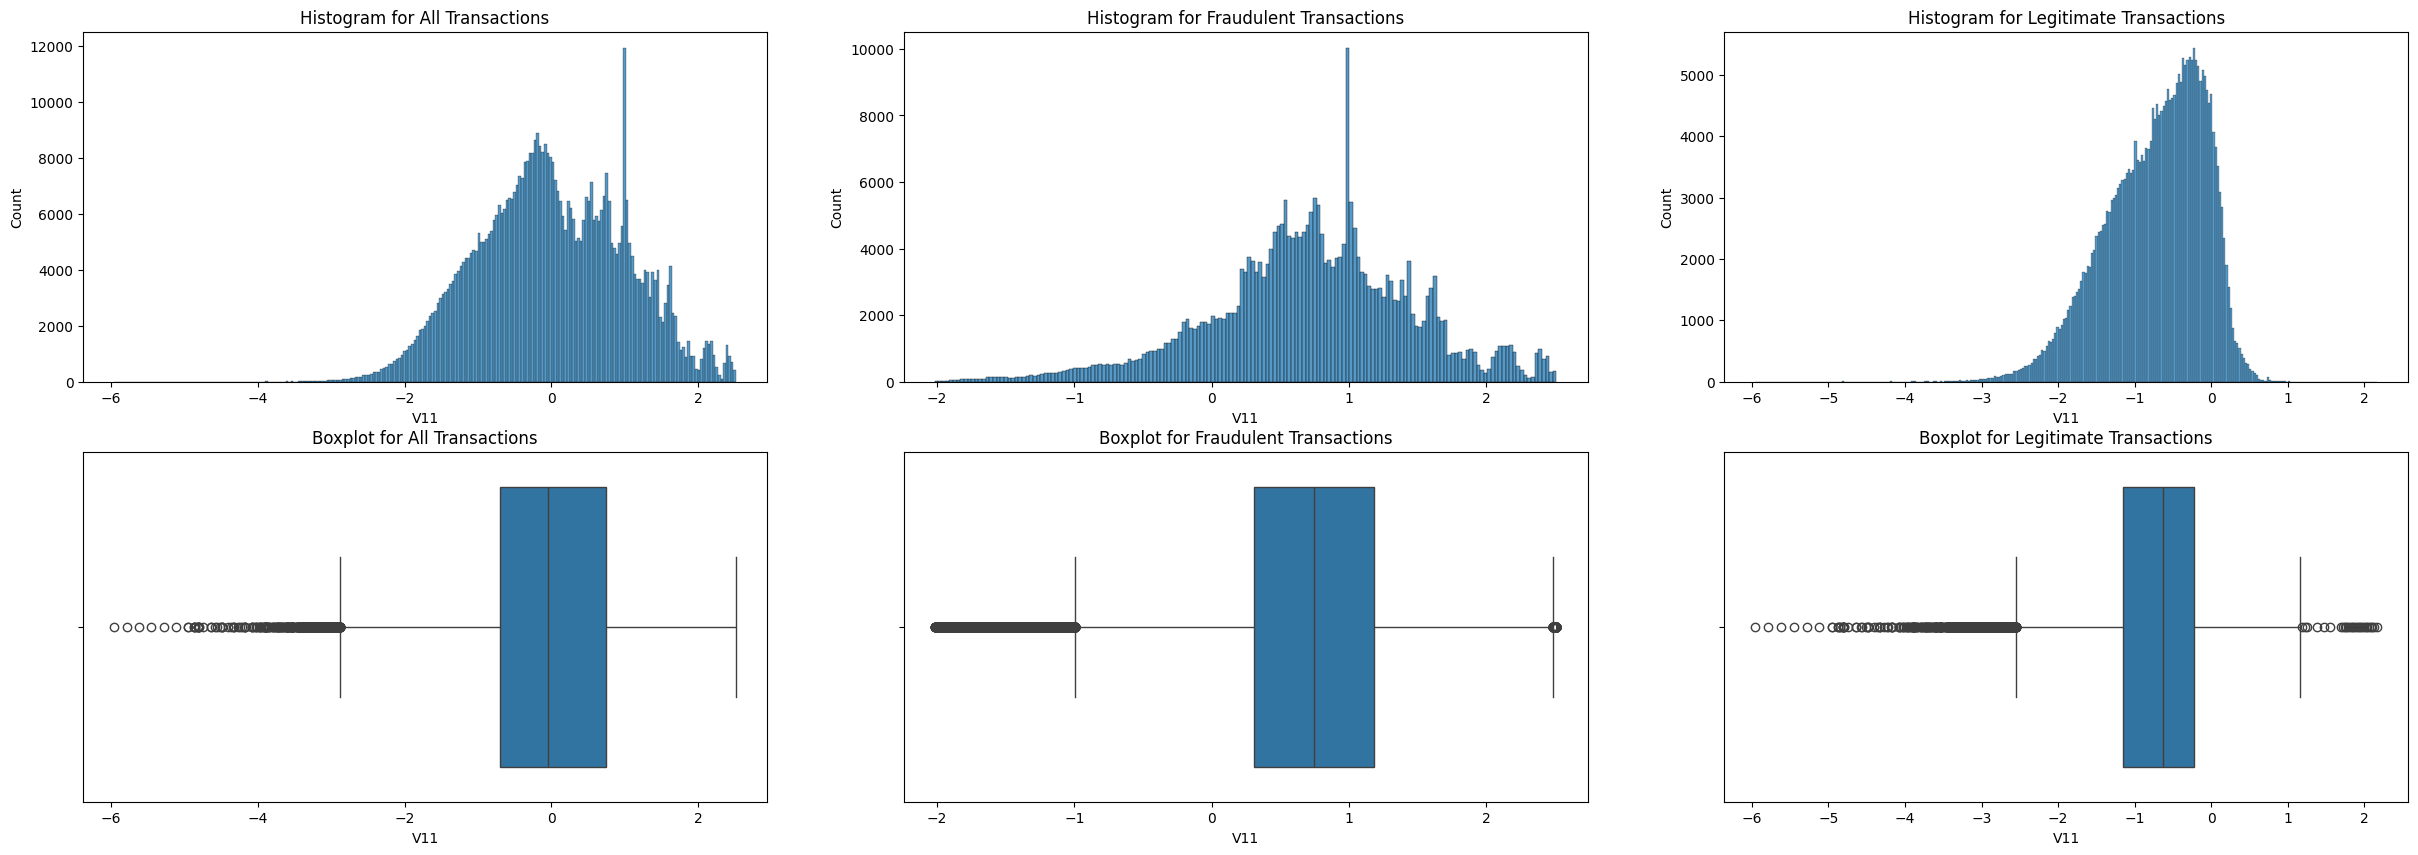

In [61]:
plot_hist_and_box(df,'V11')

### V12

The dips and spikes from fraudulent transactions prevent us from calling it Gaussian, and the effect extends to the overall column since there is a sharp dip in the middle that prevents us from calling it Gaussian

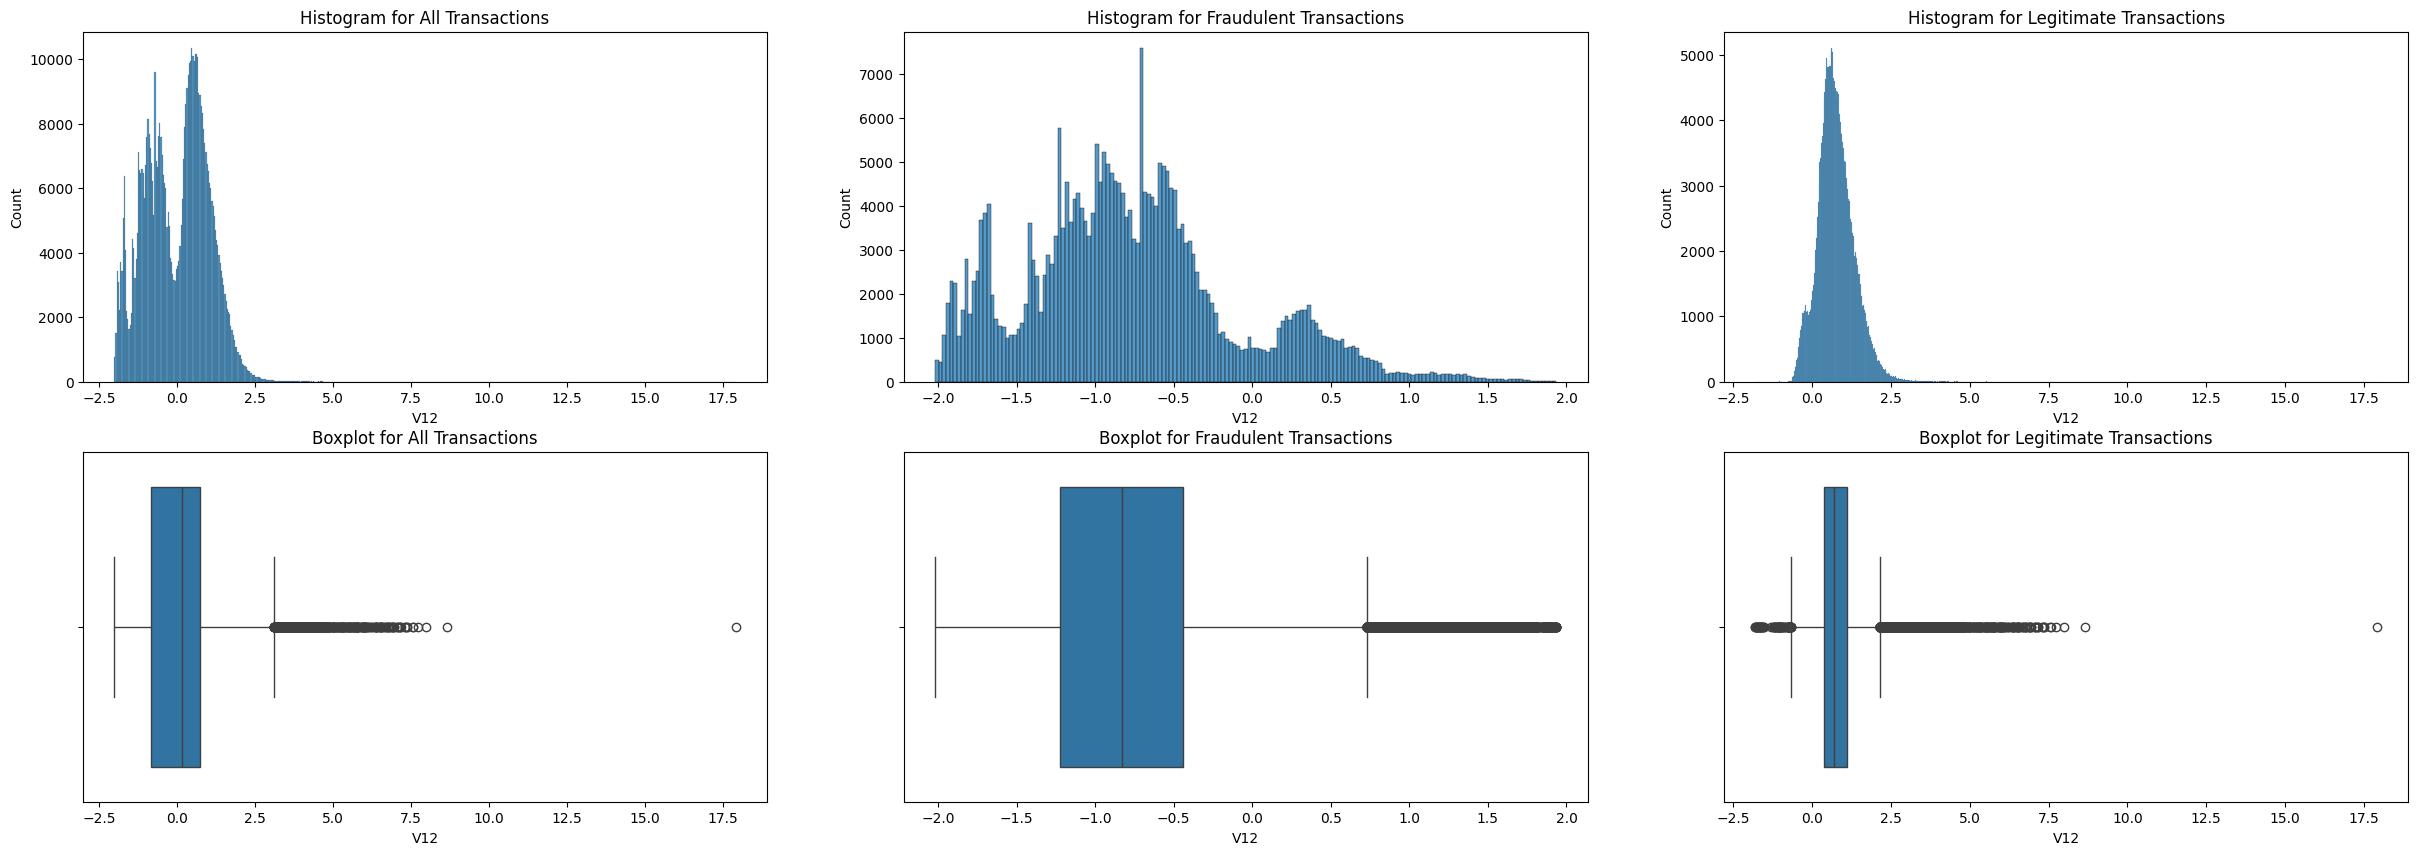

In [62]:
plot_hist_and_box(df,'V12')

### V13

Significantly better than before with almost everything being close to perfectly Gaussian

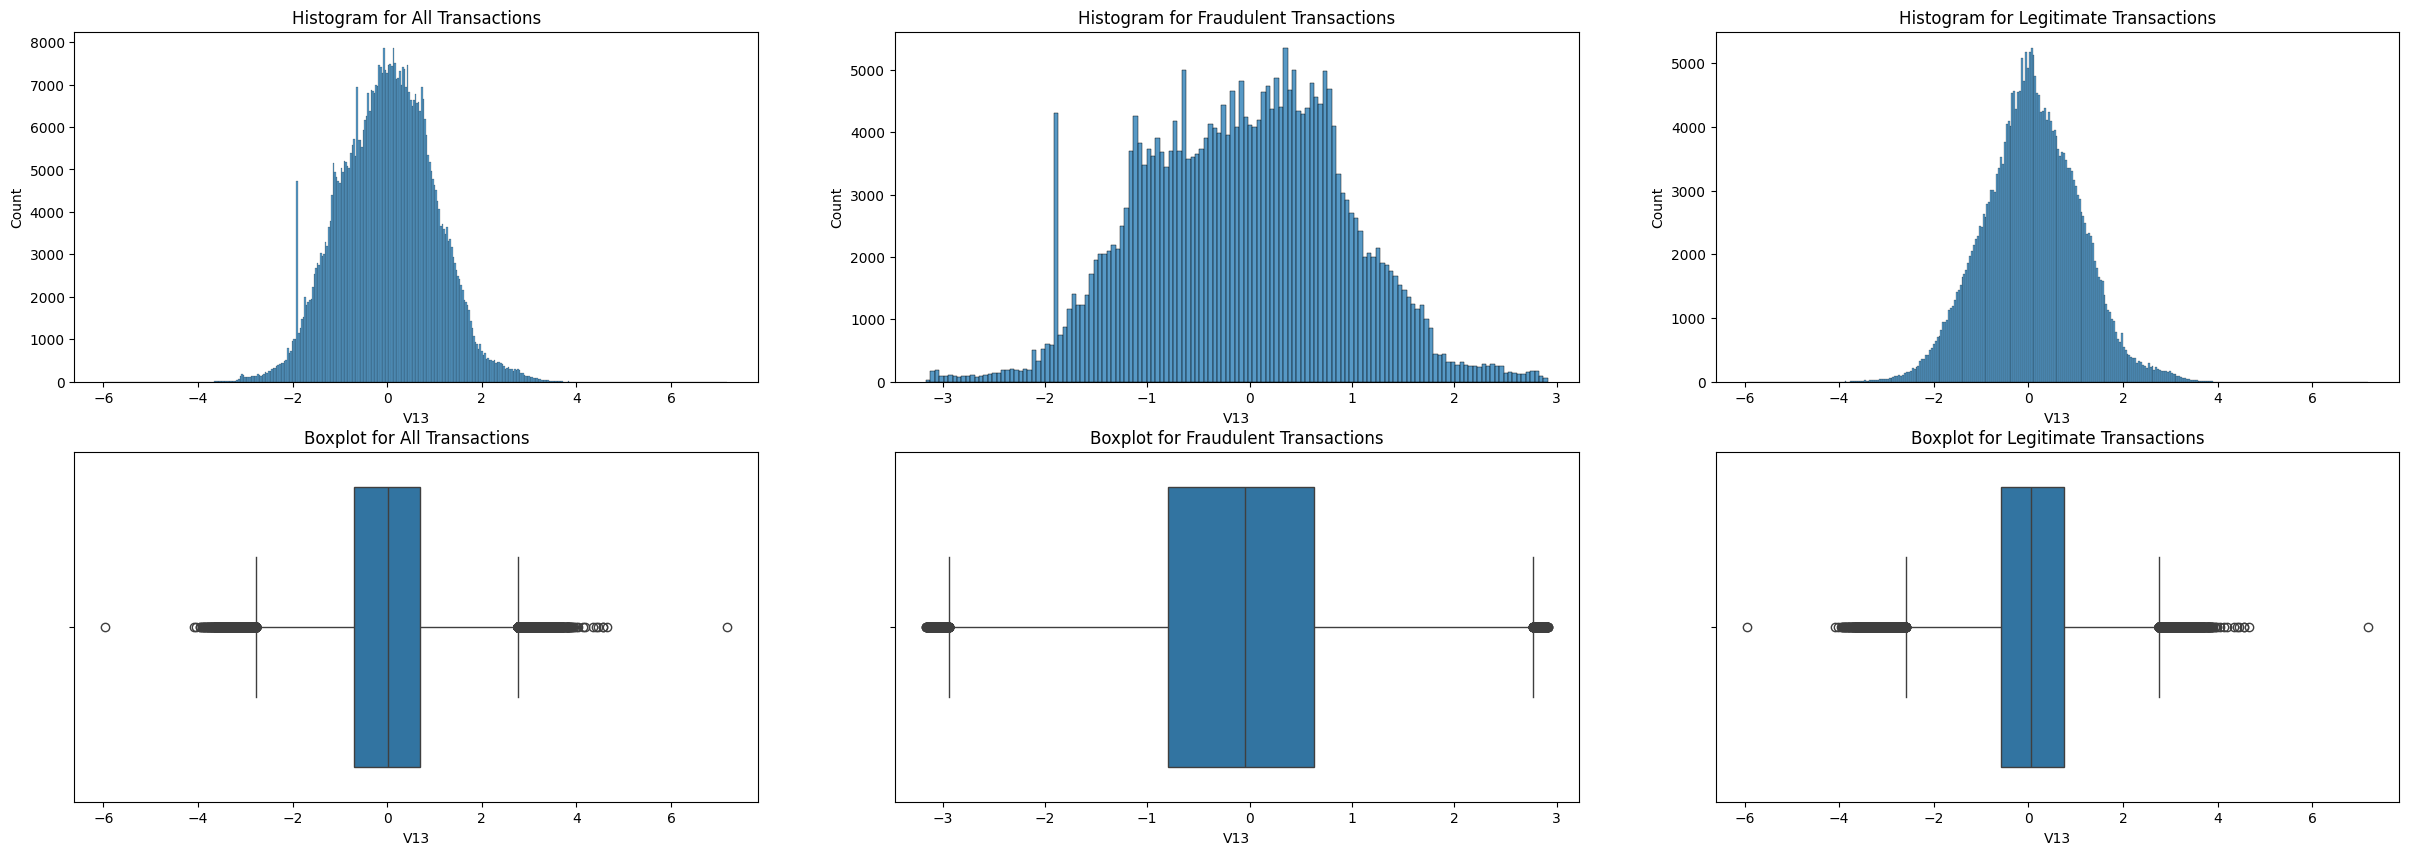

In [63]:
plot_hist_and_box(df,'V13')

### V14

The problem with the overall column is similar of that of V12 despite the fraudulent and legitimate transactions being almost Gaussian individually.

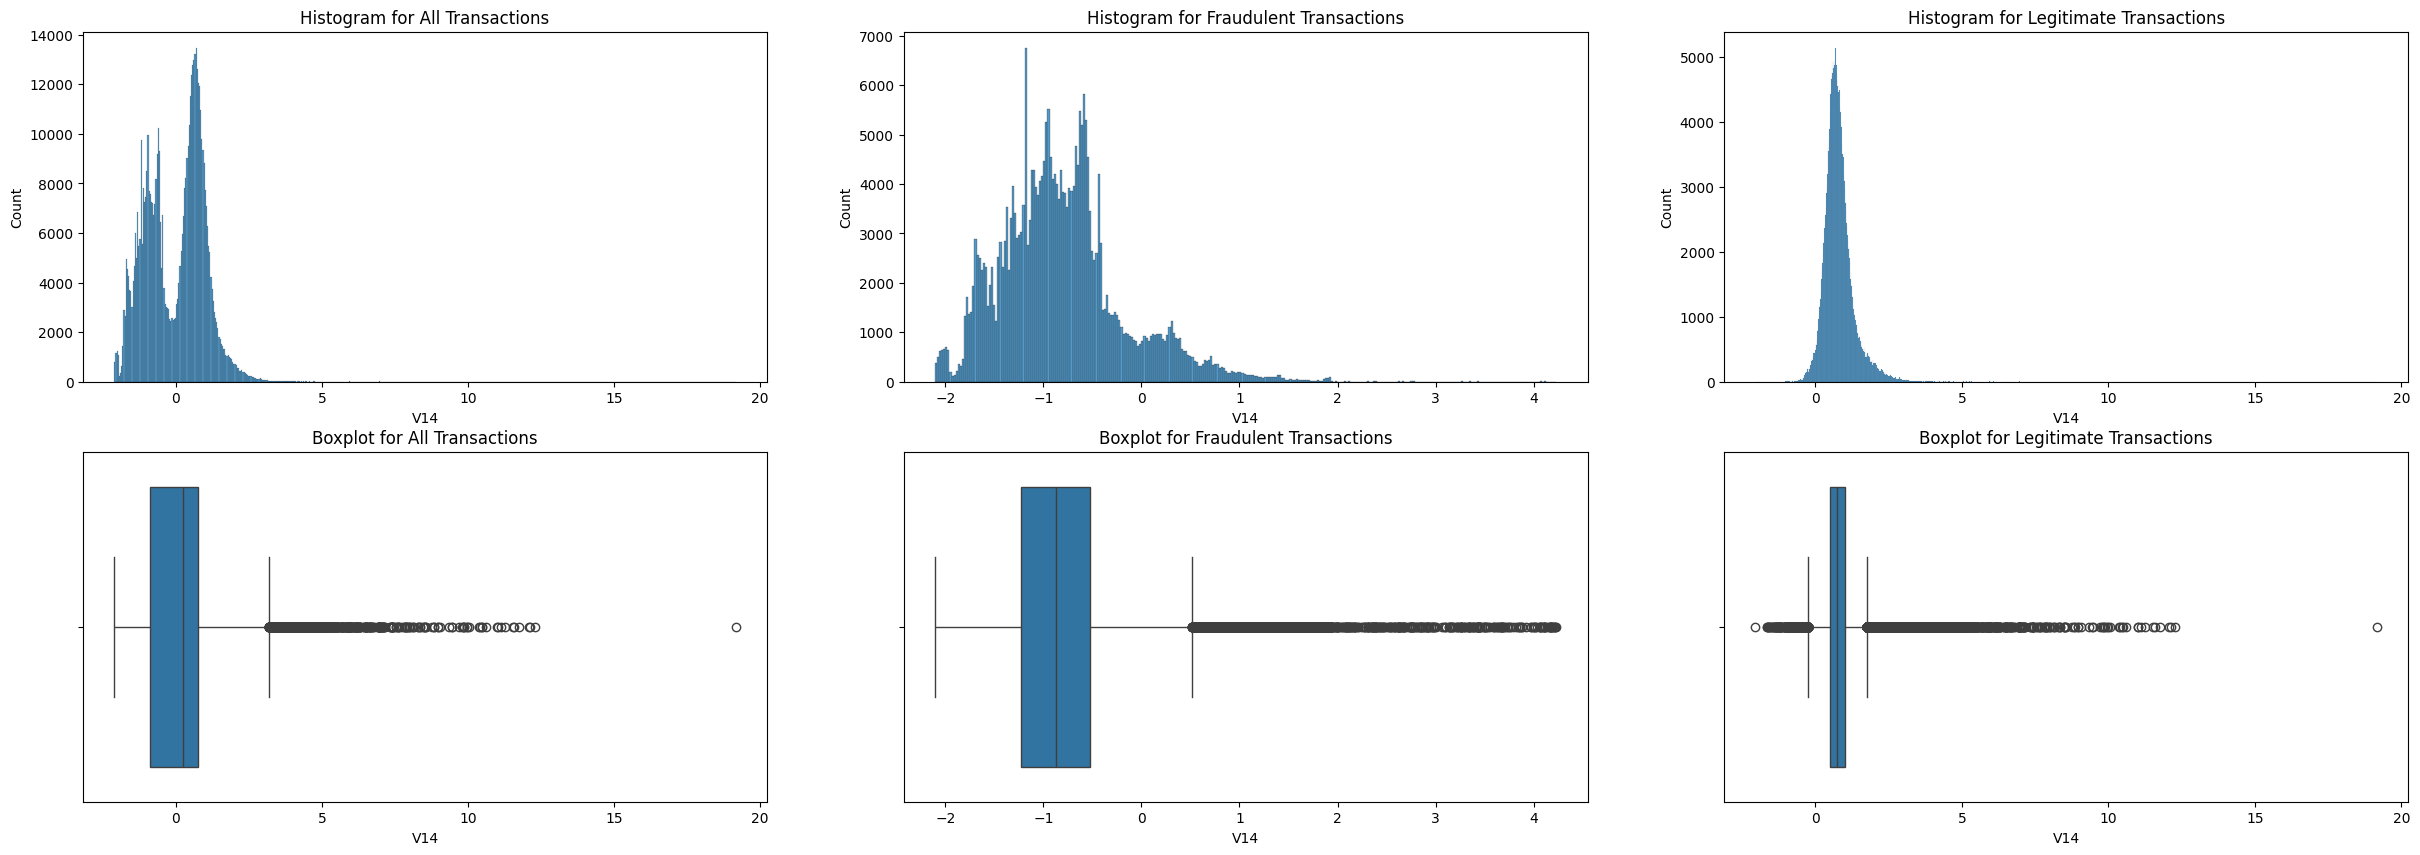

In [64]:
plot_hist_and_box(df,'V14')

### V15

Mostly Gaussian even when considering outliers

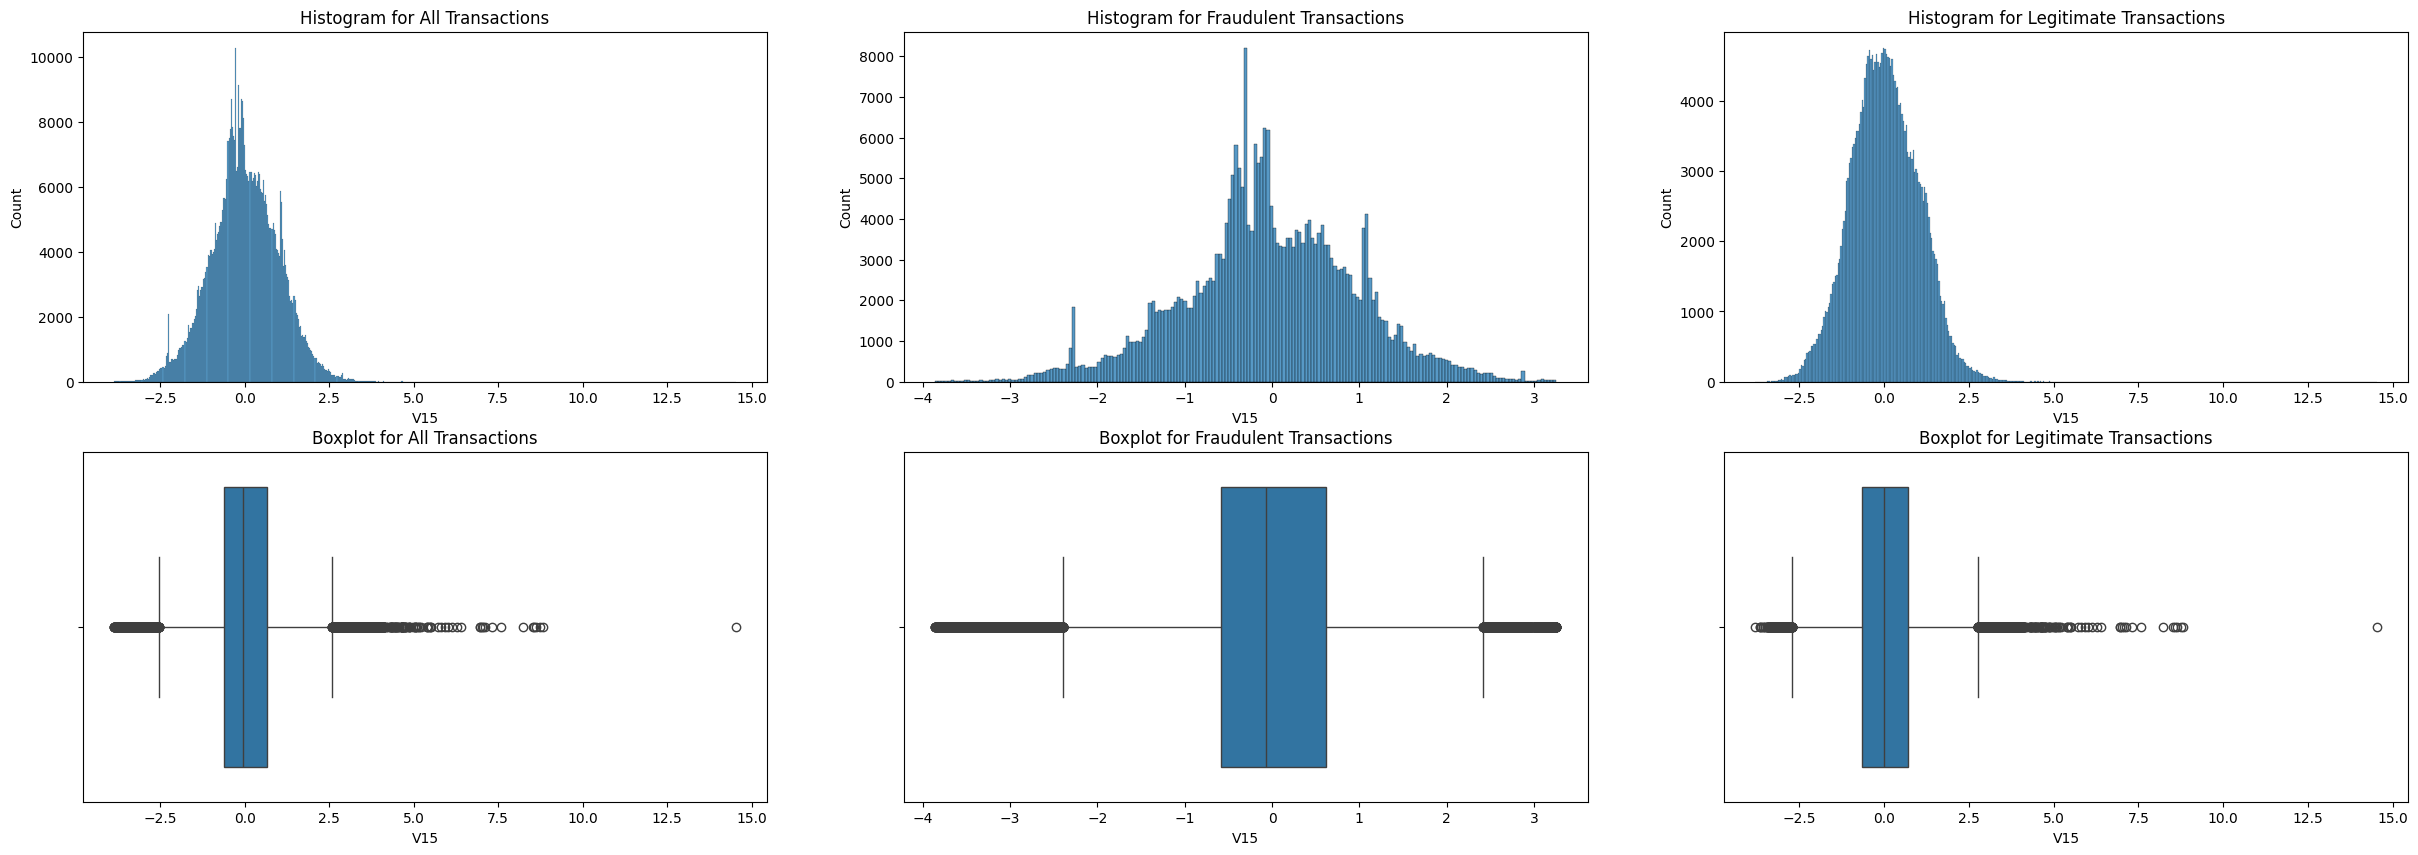

In [66]:
plot_hist_and_box(df,'V15')

### V16

The only non-Gaussian thing here is the fraudulent transactions (possibly due to high density and large number of outliers)

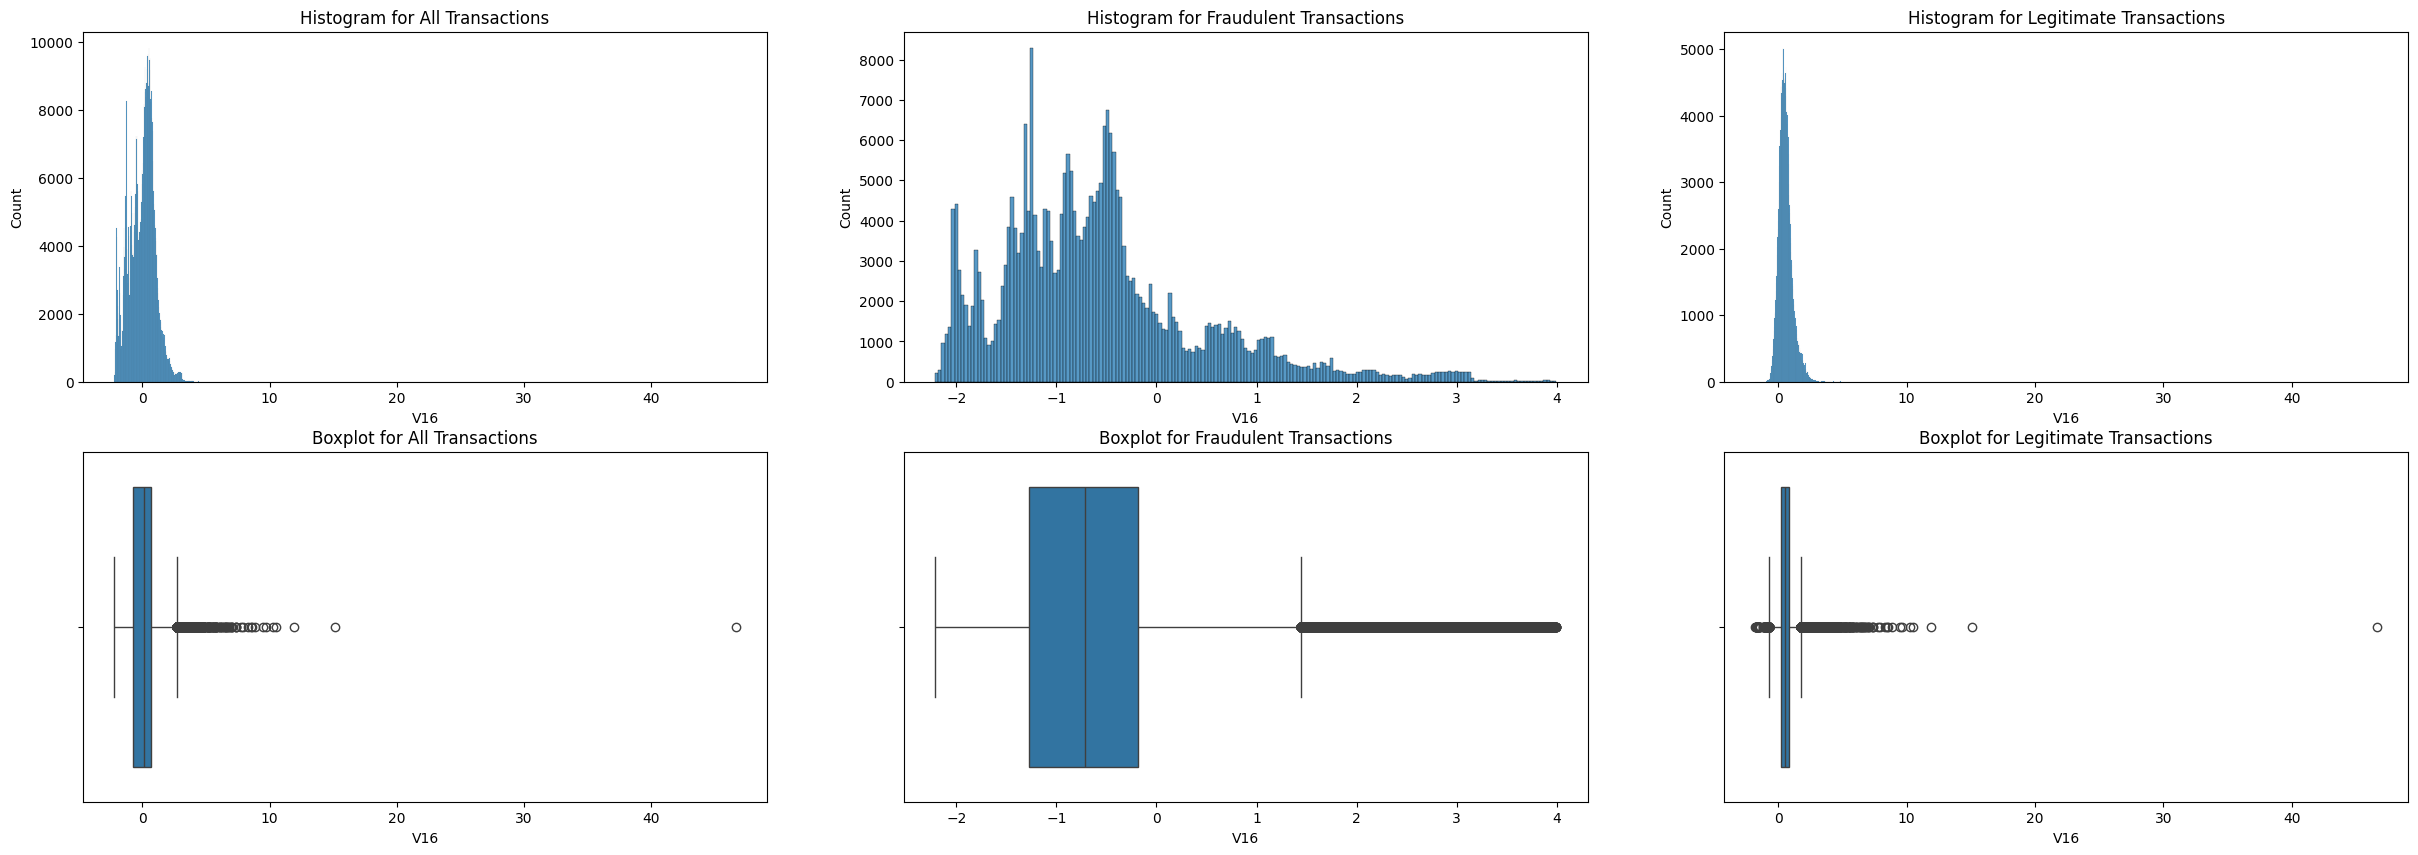

In [67]:
plot_hist_and_box(df,'V16')

### V17

Ok, now only the legitimate transactions are Gaussian

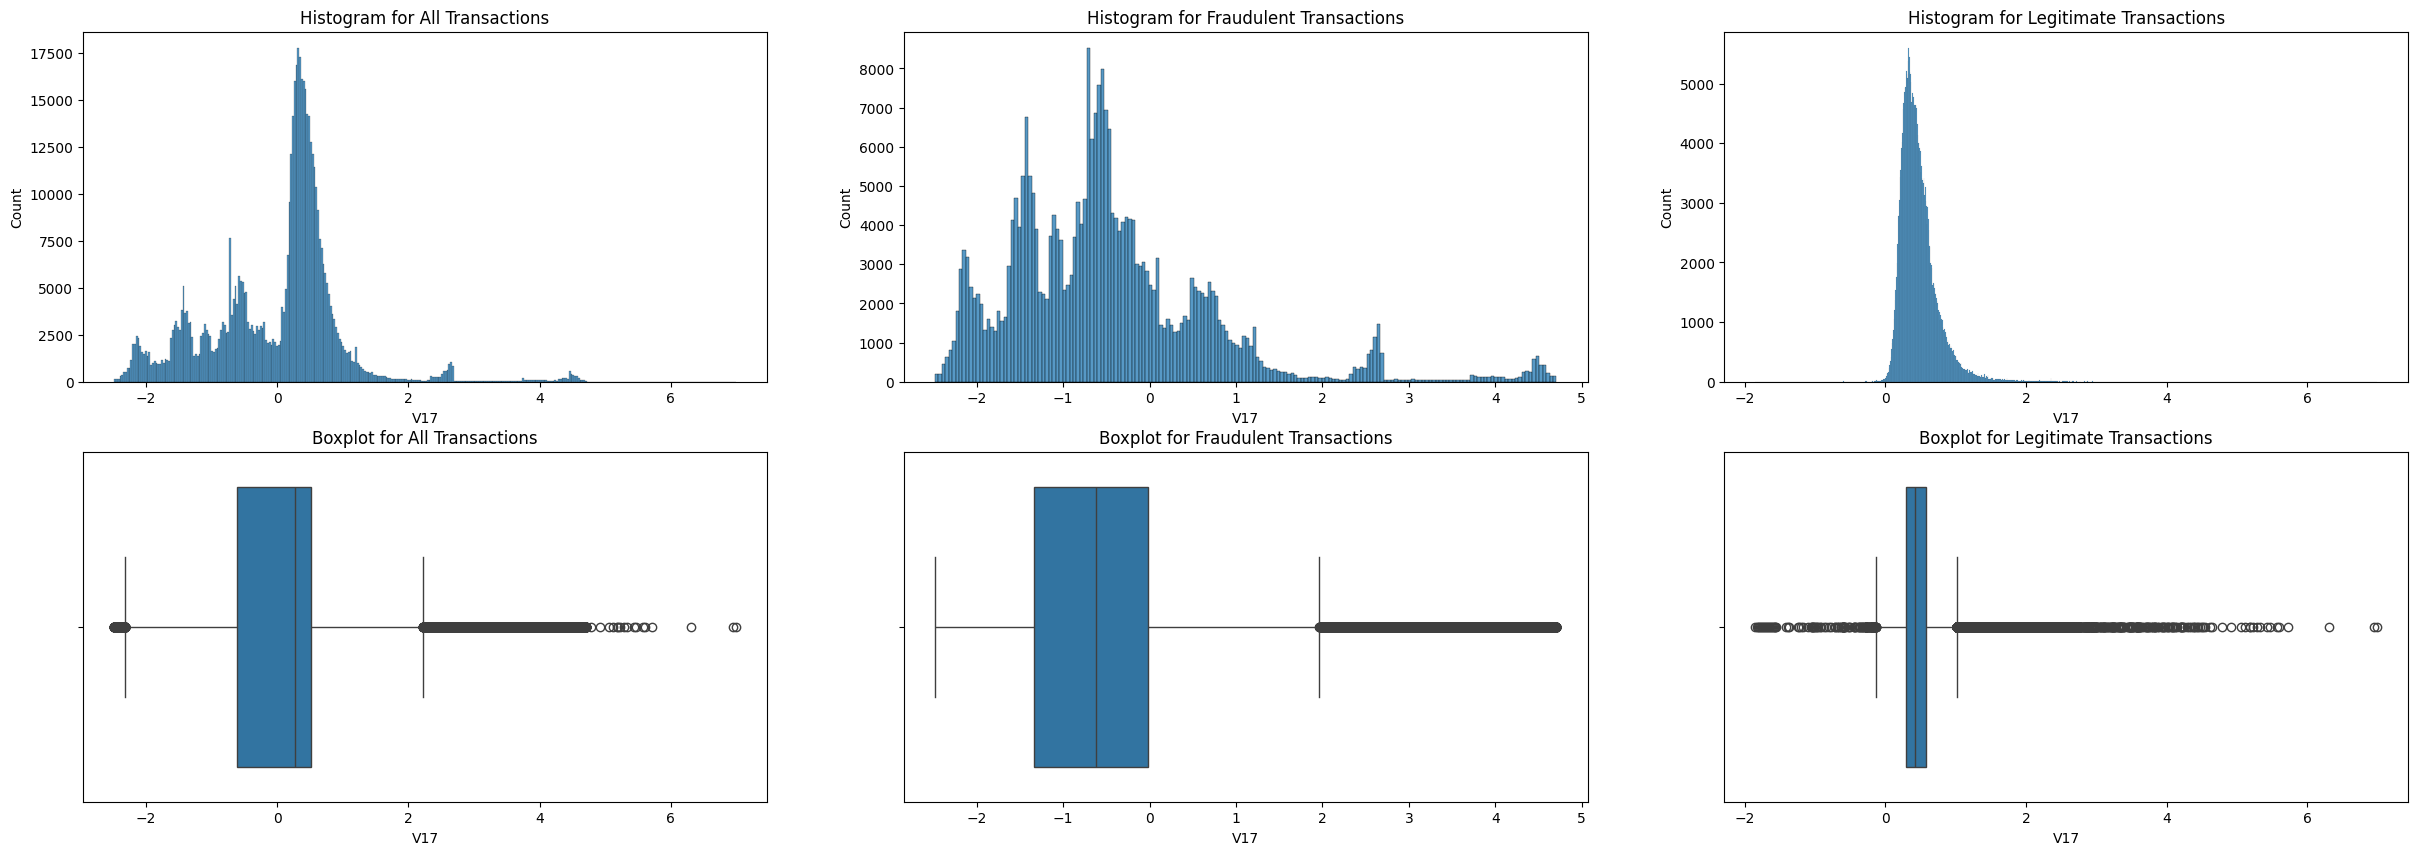

In [68]:
plot_hist_and_box(df,'V17')

### V18

Better than 17, but fraudulent transactions are not Gaussian

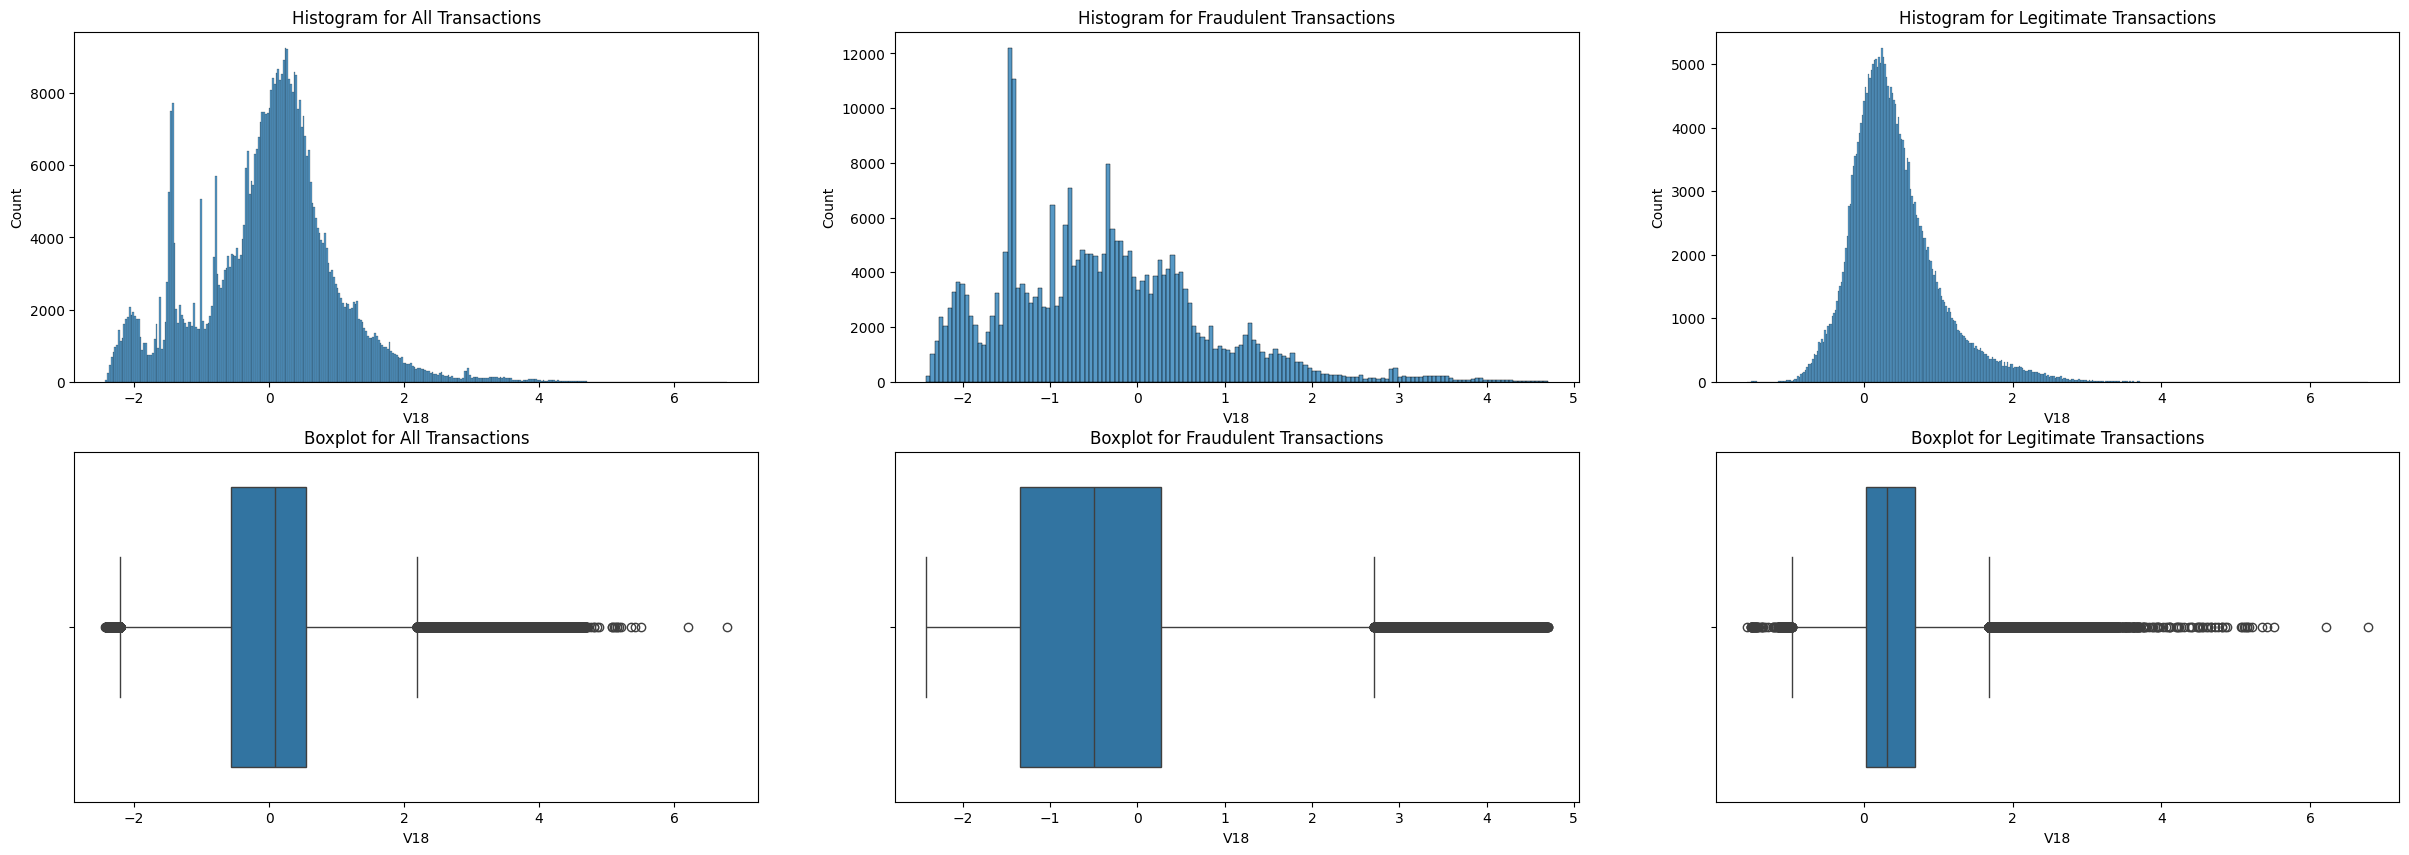

In [69]:
plot_hist_and_box(df,'V18')

### V19

Now we're more Gaussian

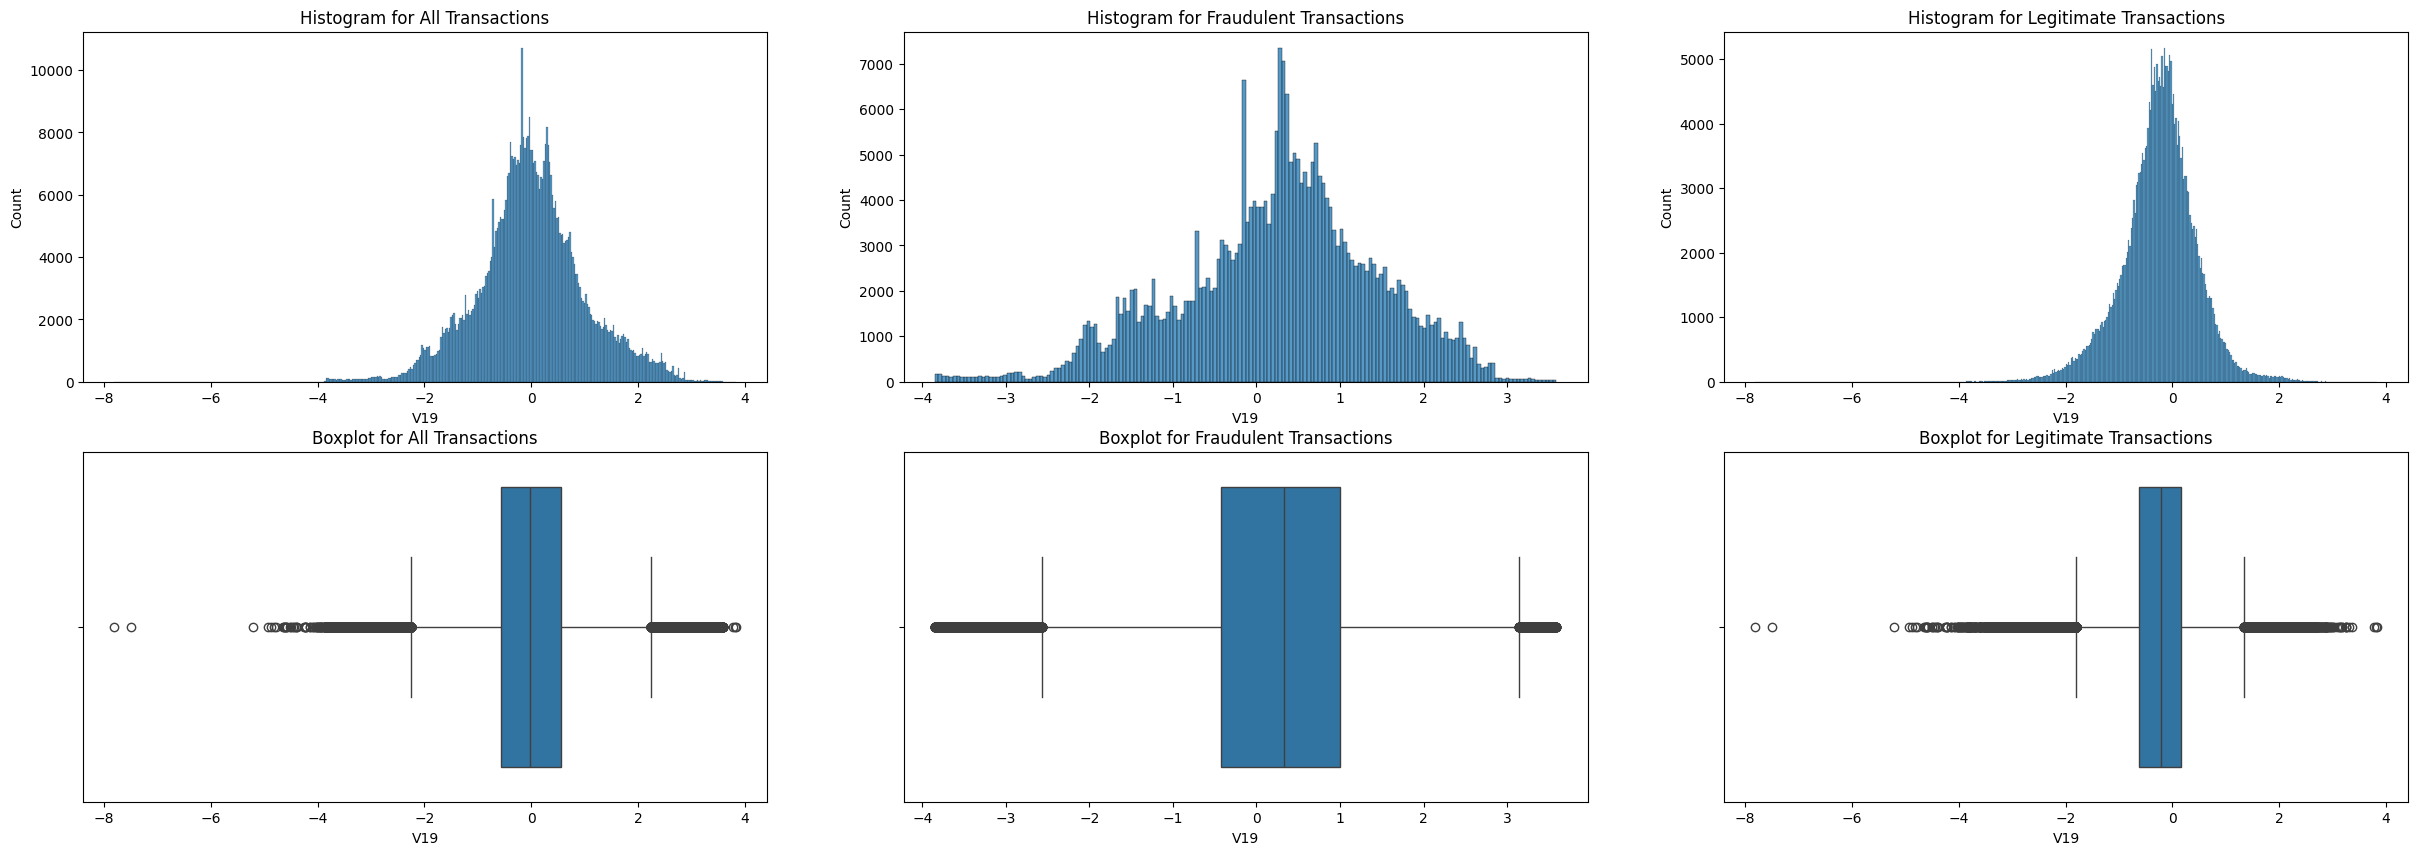

In [70]:
plot_hist_and_box(df,'V19')

### V20

Mostly Gaussian, but overall V20 and legitimate transactions have a very narrow distribution

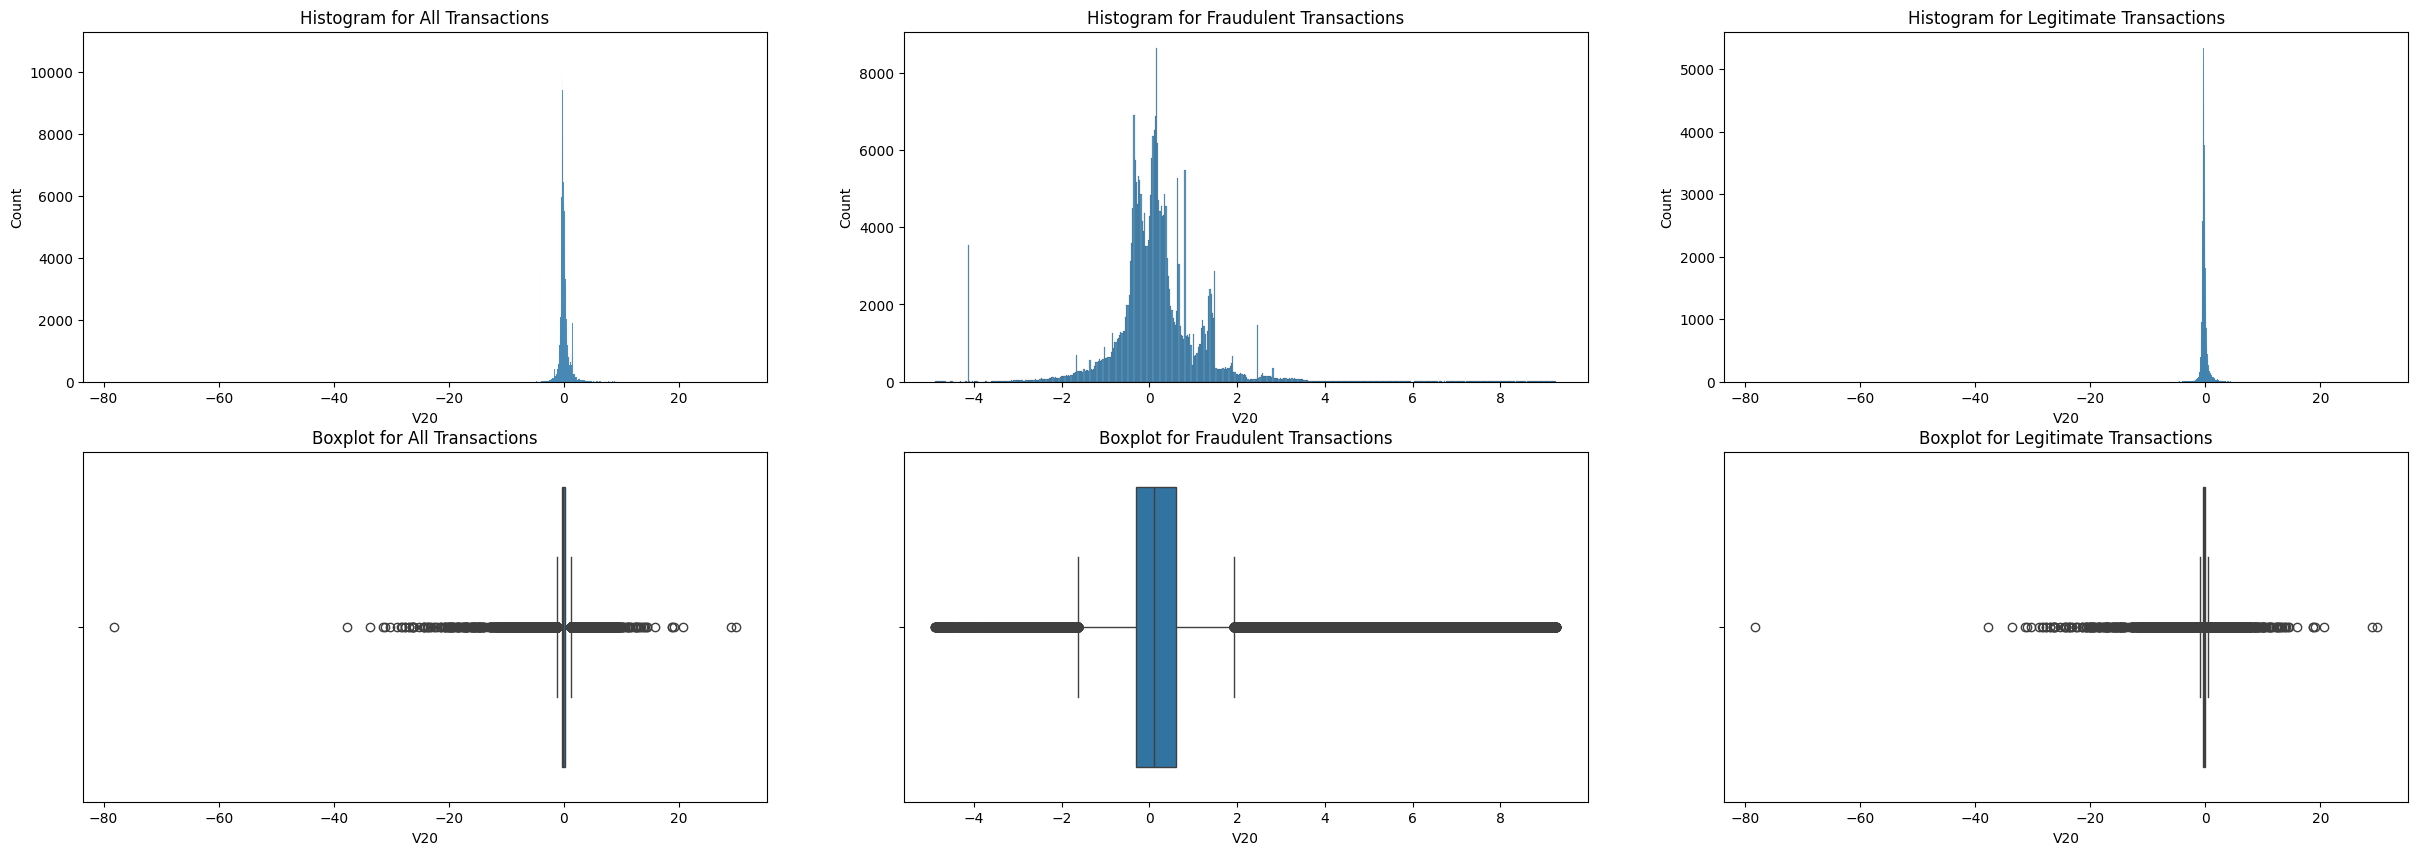

In [71]:
plot_hist_and_box(df,'V20')

### V21

Gaussian and narrow distribution across the board

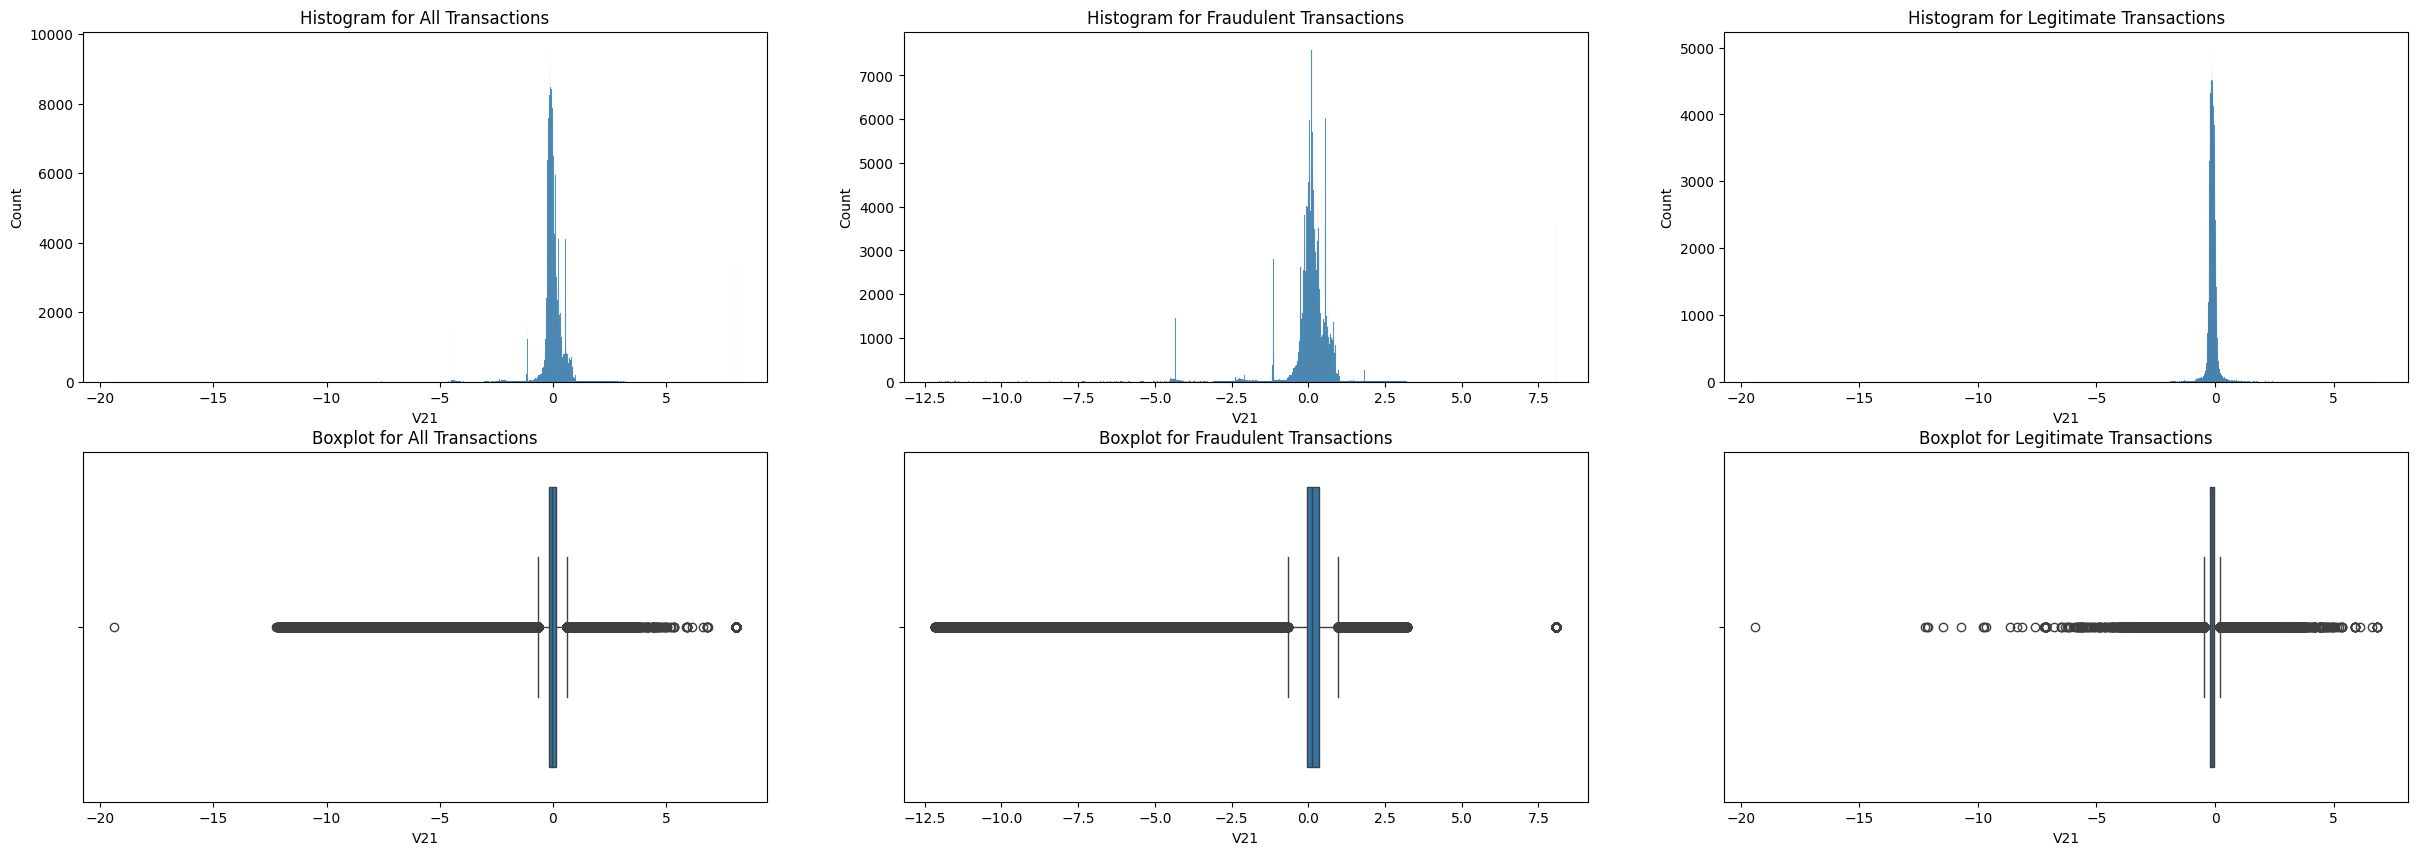

In [72]:
plot_hist_and_box(df,'V21')

### V22

Mostly Gaussian with some spikes

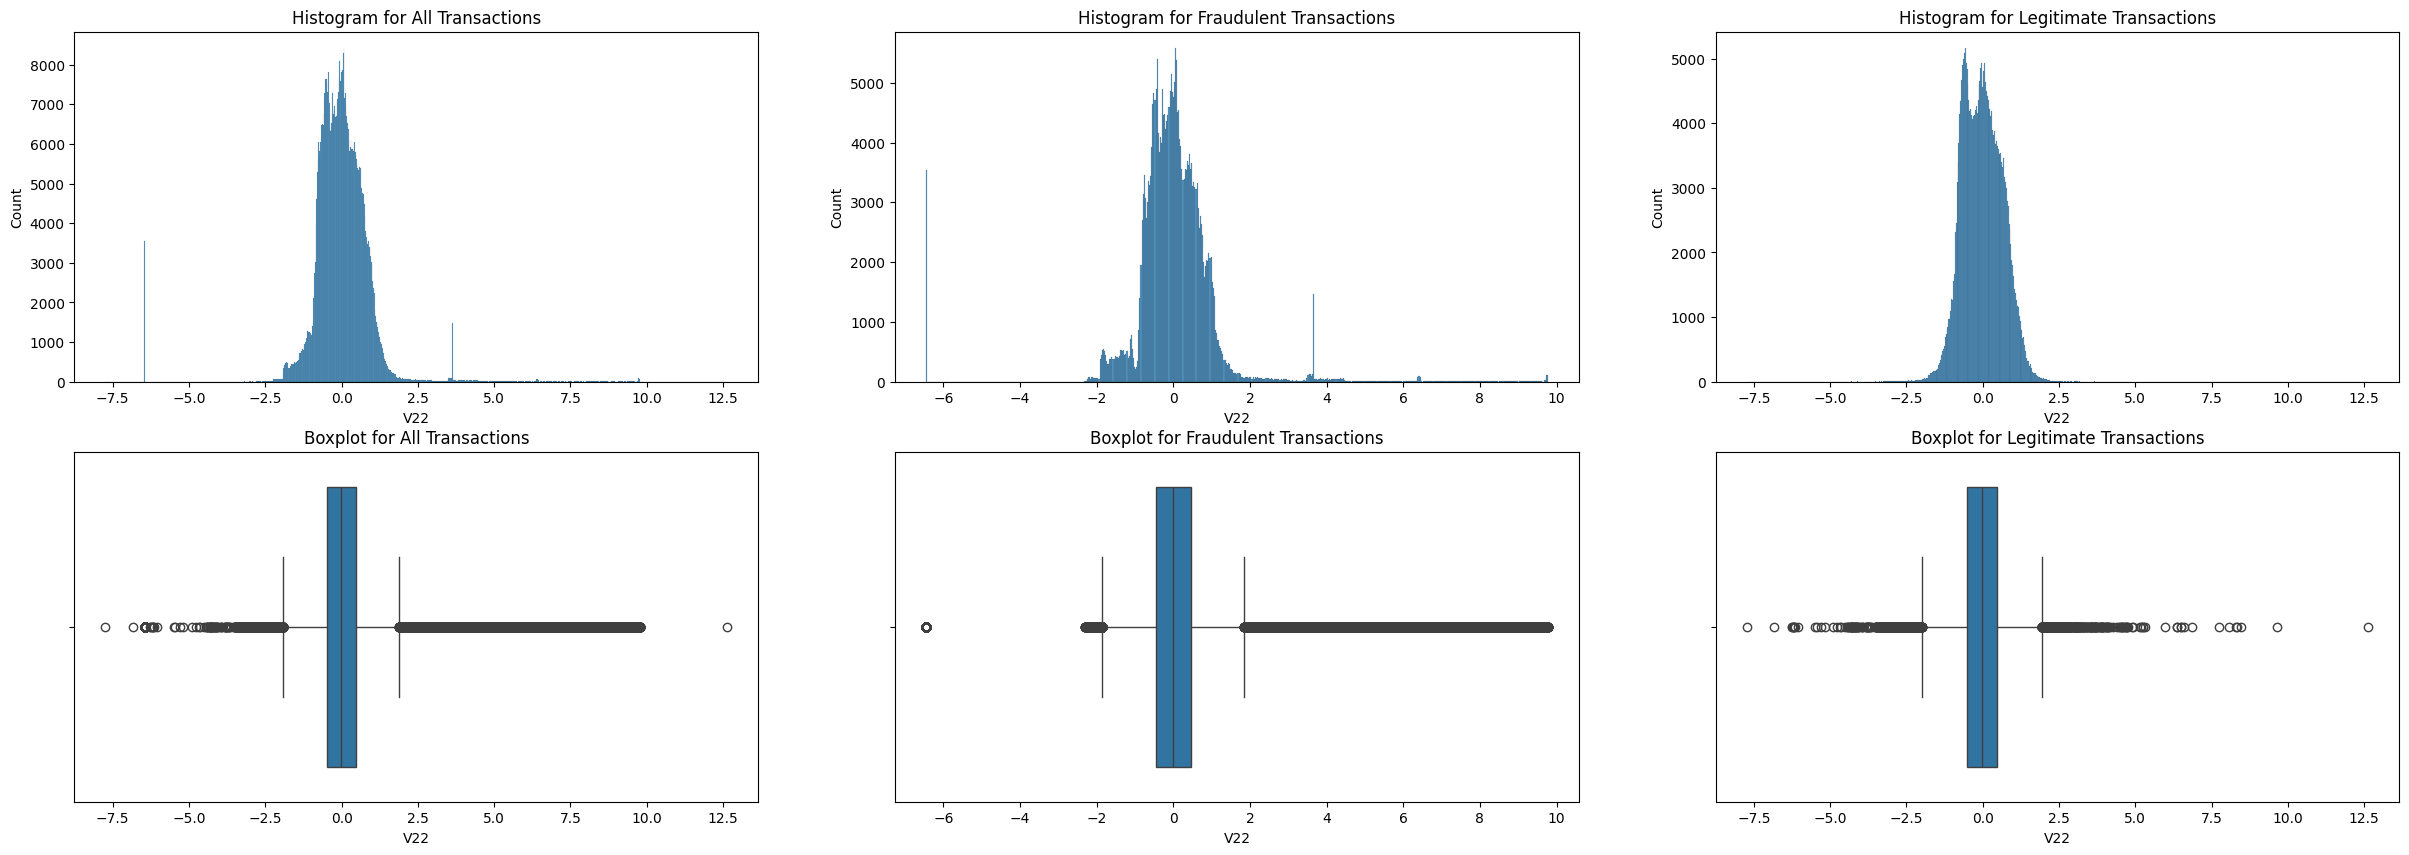

In [74]:
plot_hist_and_box(df,'V22')

### V23

Gaussian with narrow distribution

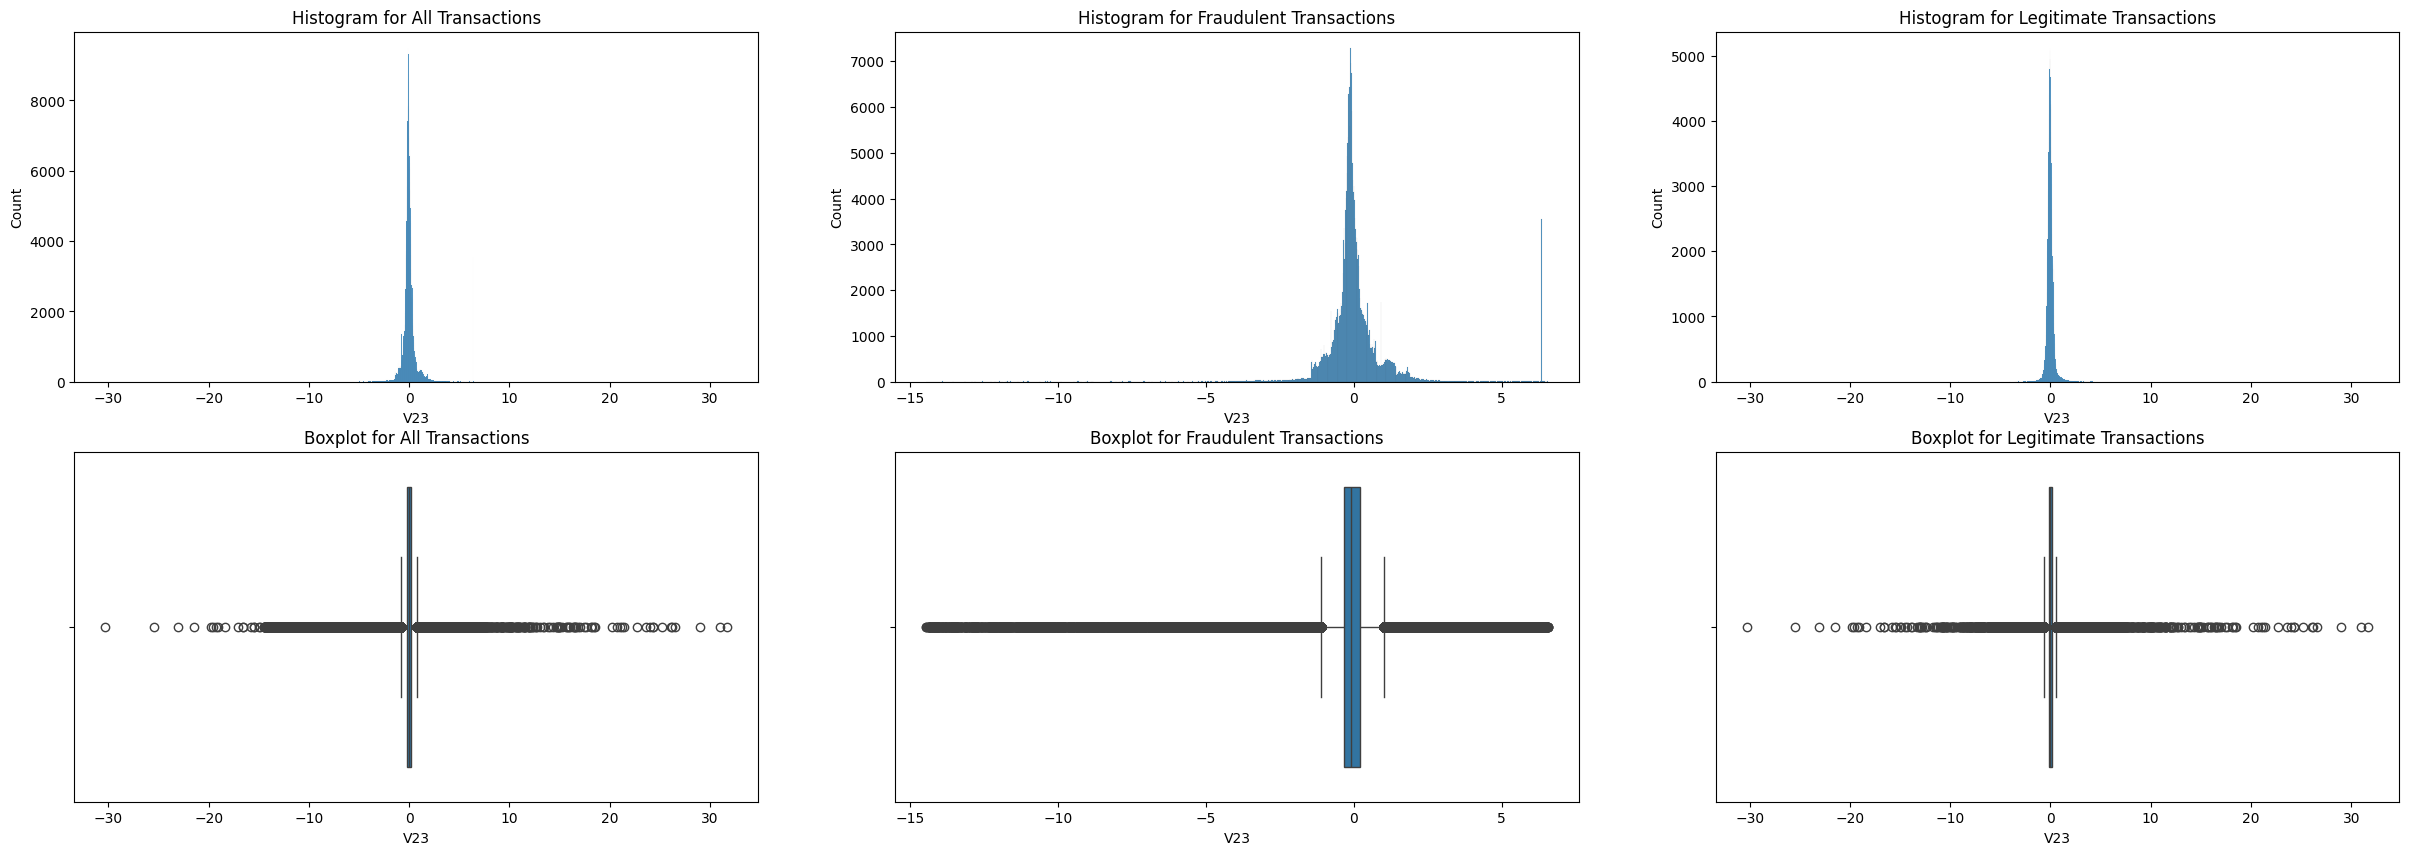

In [75]:
plot_hist_and_box(df,'V23')

### V24

Gauss is rolling in his grave right about now

There is a suspicous gap in data with the legitimate transactions

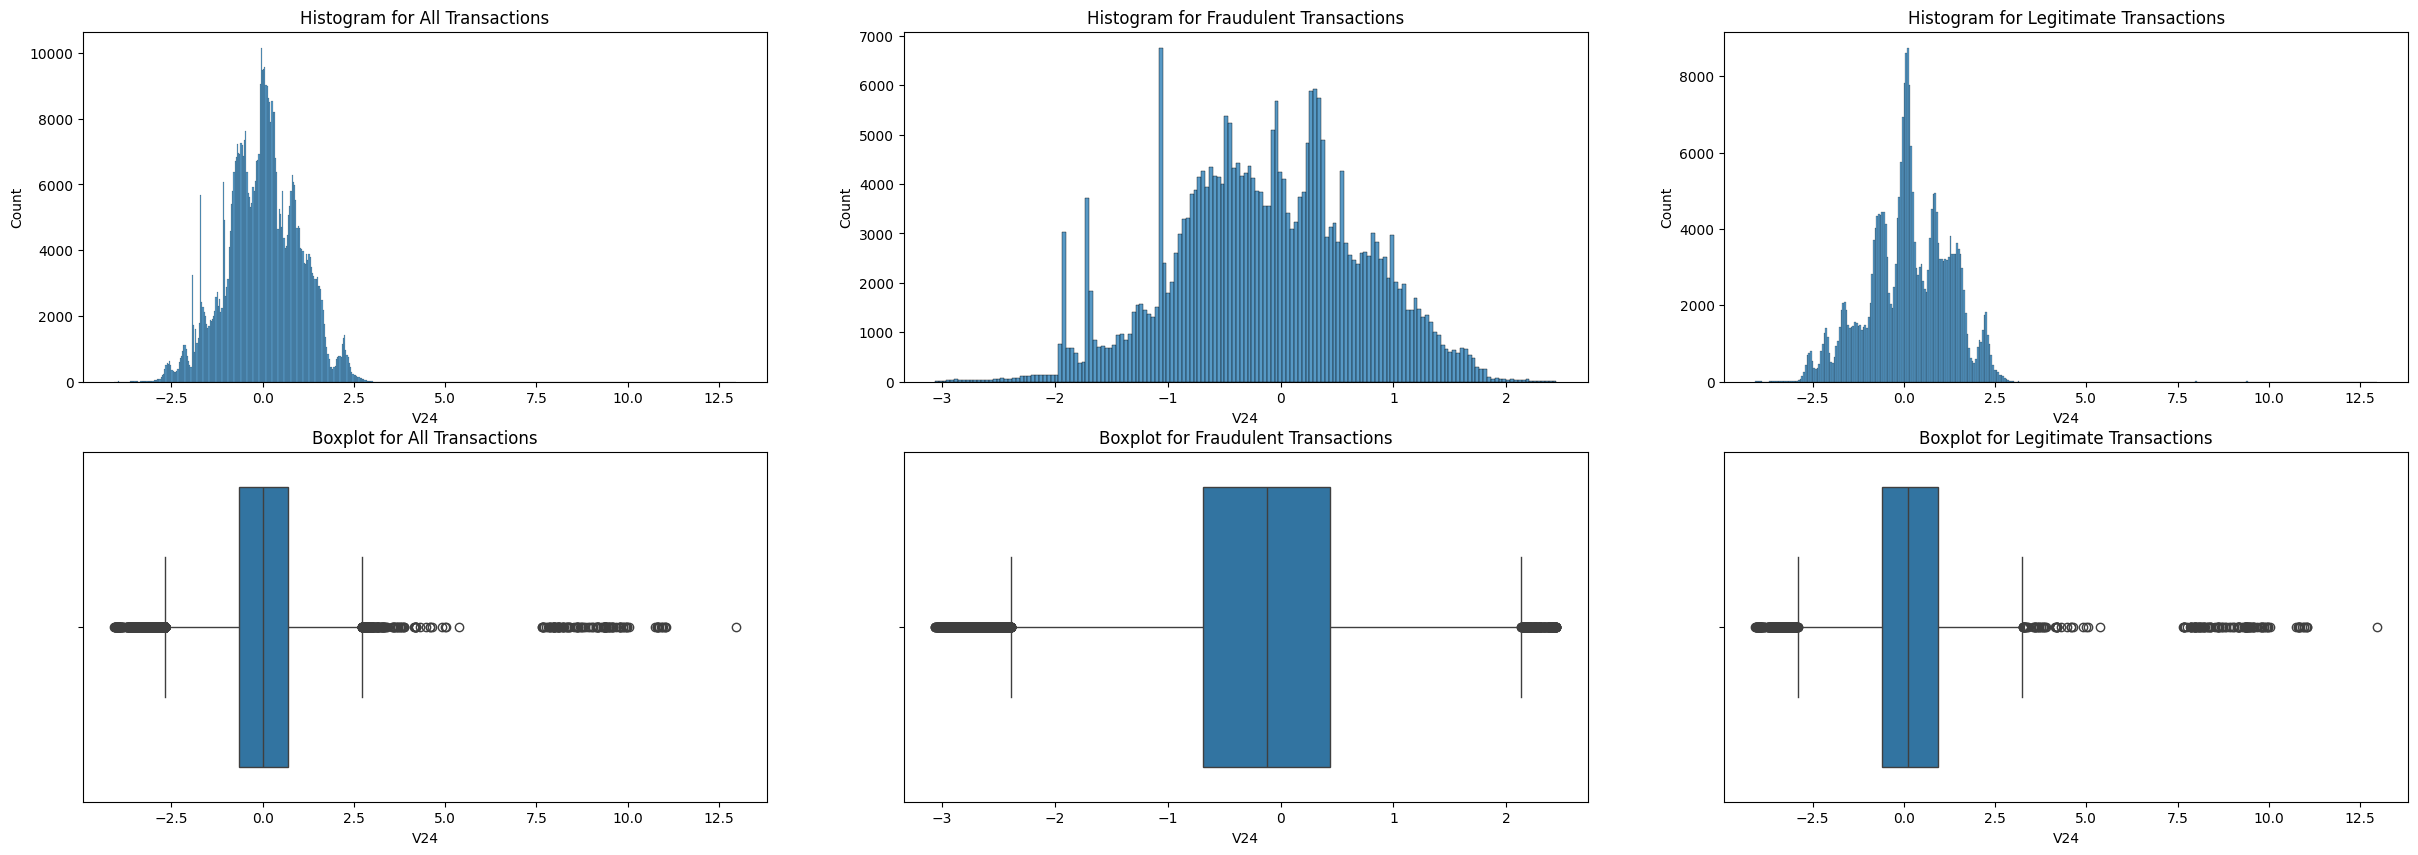

In [76]:
plot_hist_and_box(df,'V24')

### V25

Gaussian with narrow distribution and a few spikes

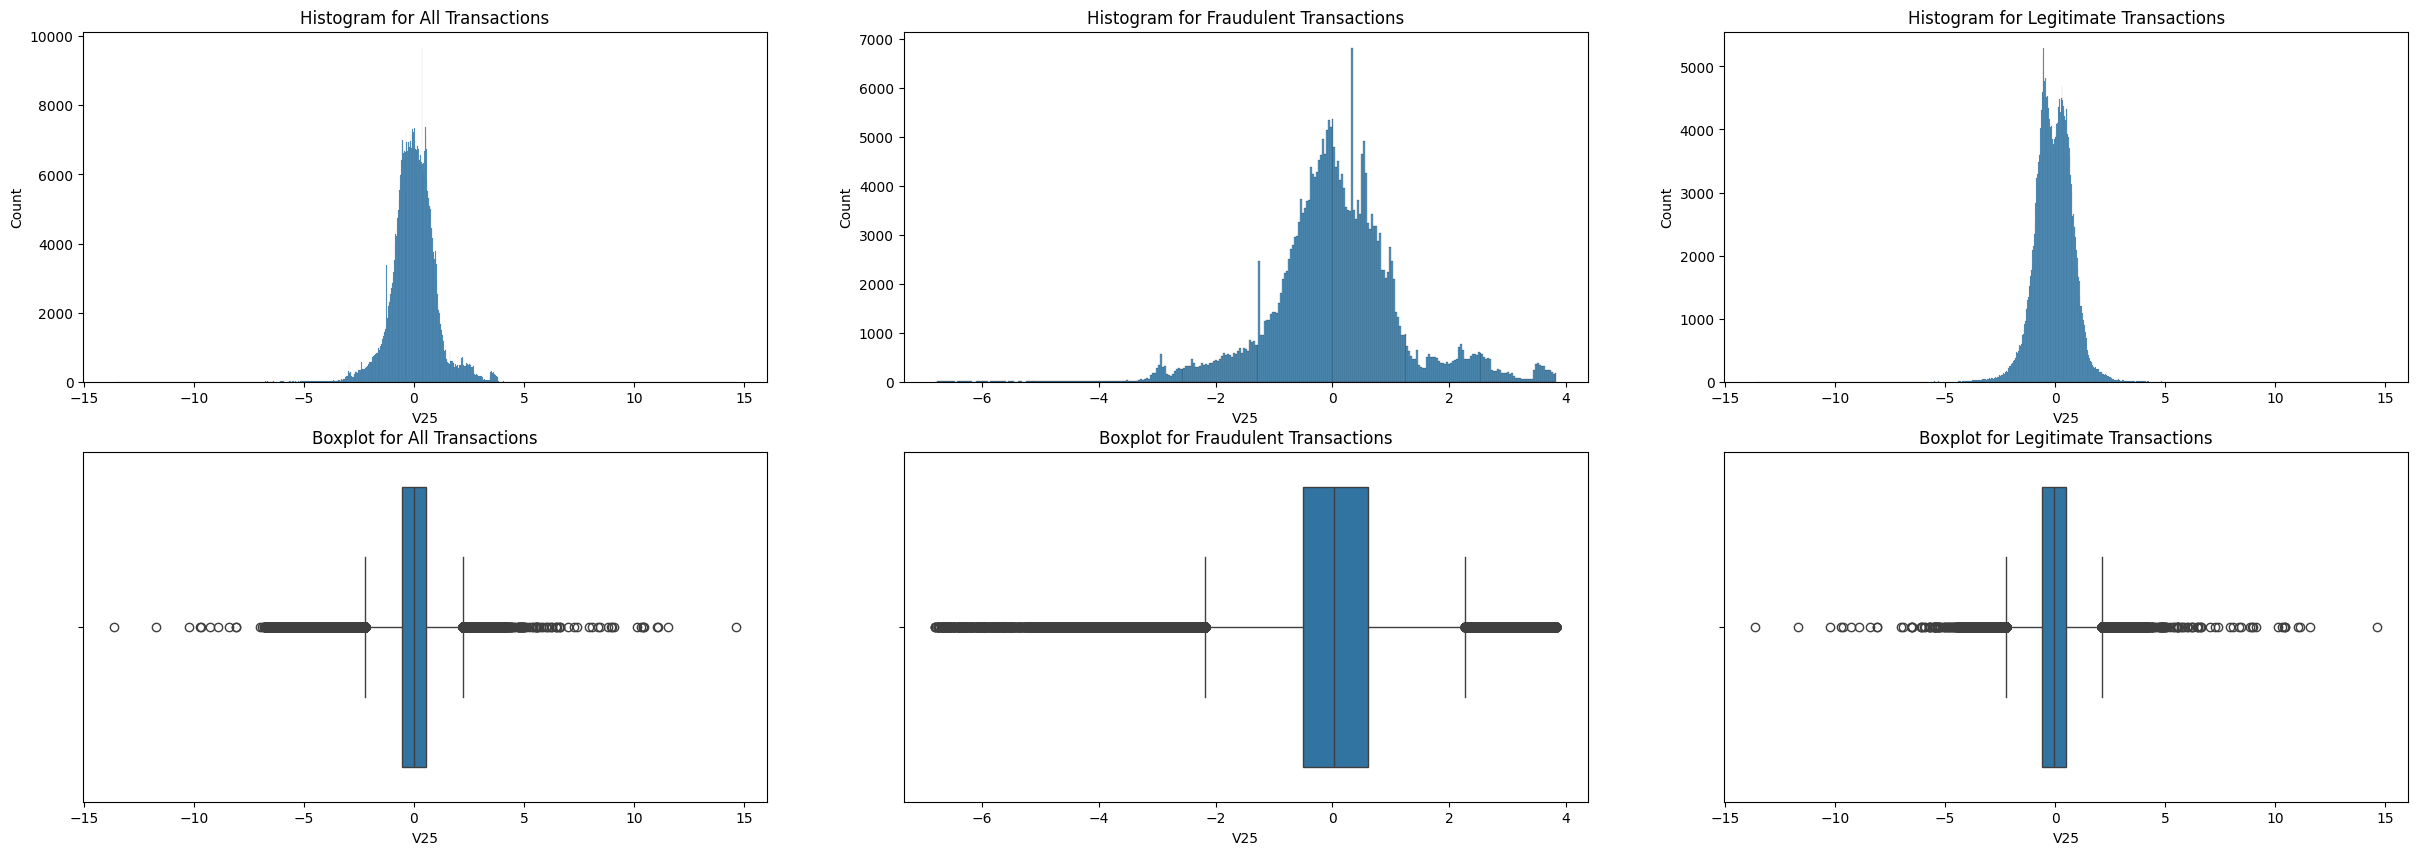

In [77]:
plot_hist_and_box(df,'V25')

### V26

It looks Gaussian if you squint

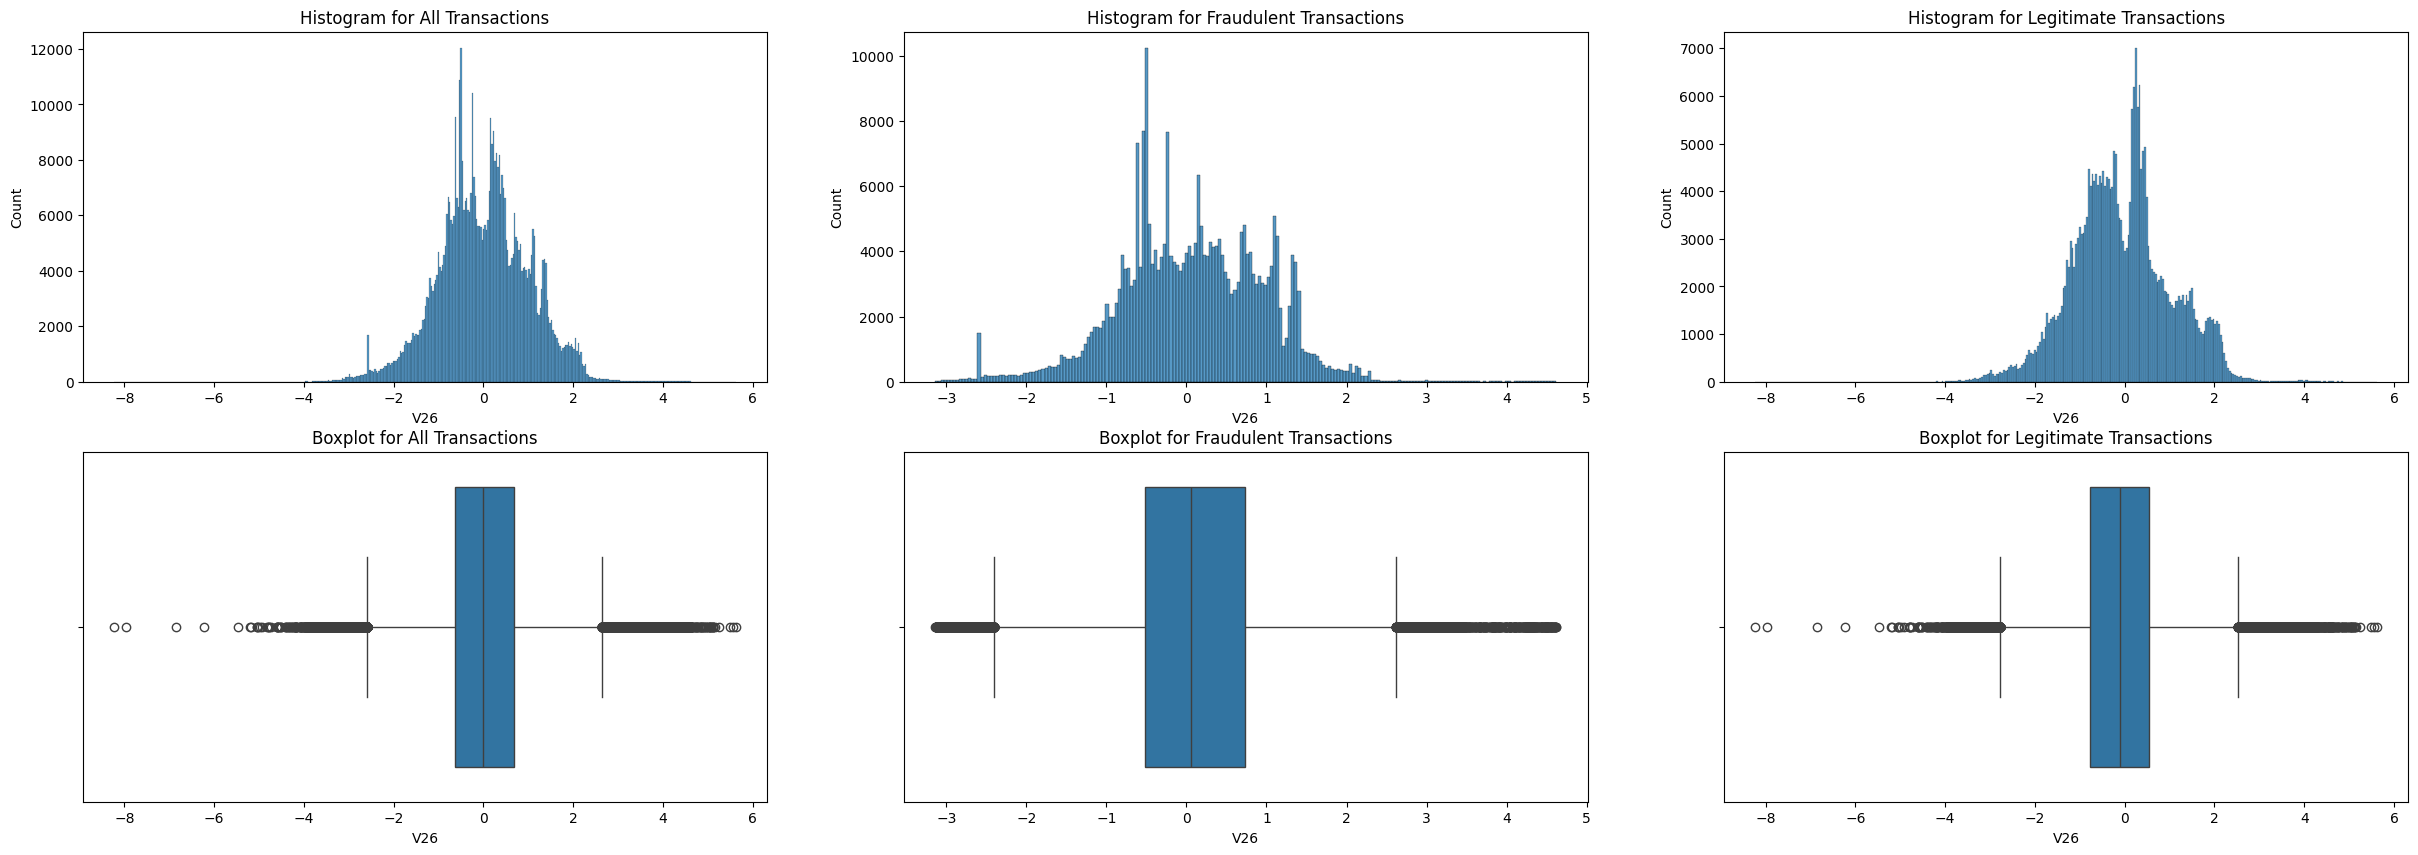

In [78]:
plot_hist_and_box(df,'V26')

### V27

The gap between most of the data and that one outlier is ridiculous

Also fraudulent data is very much not Gaussian

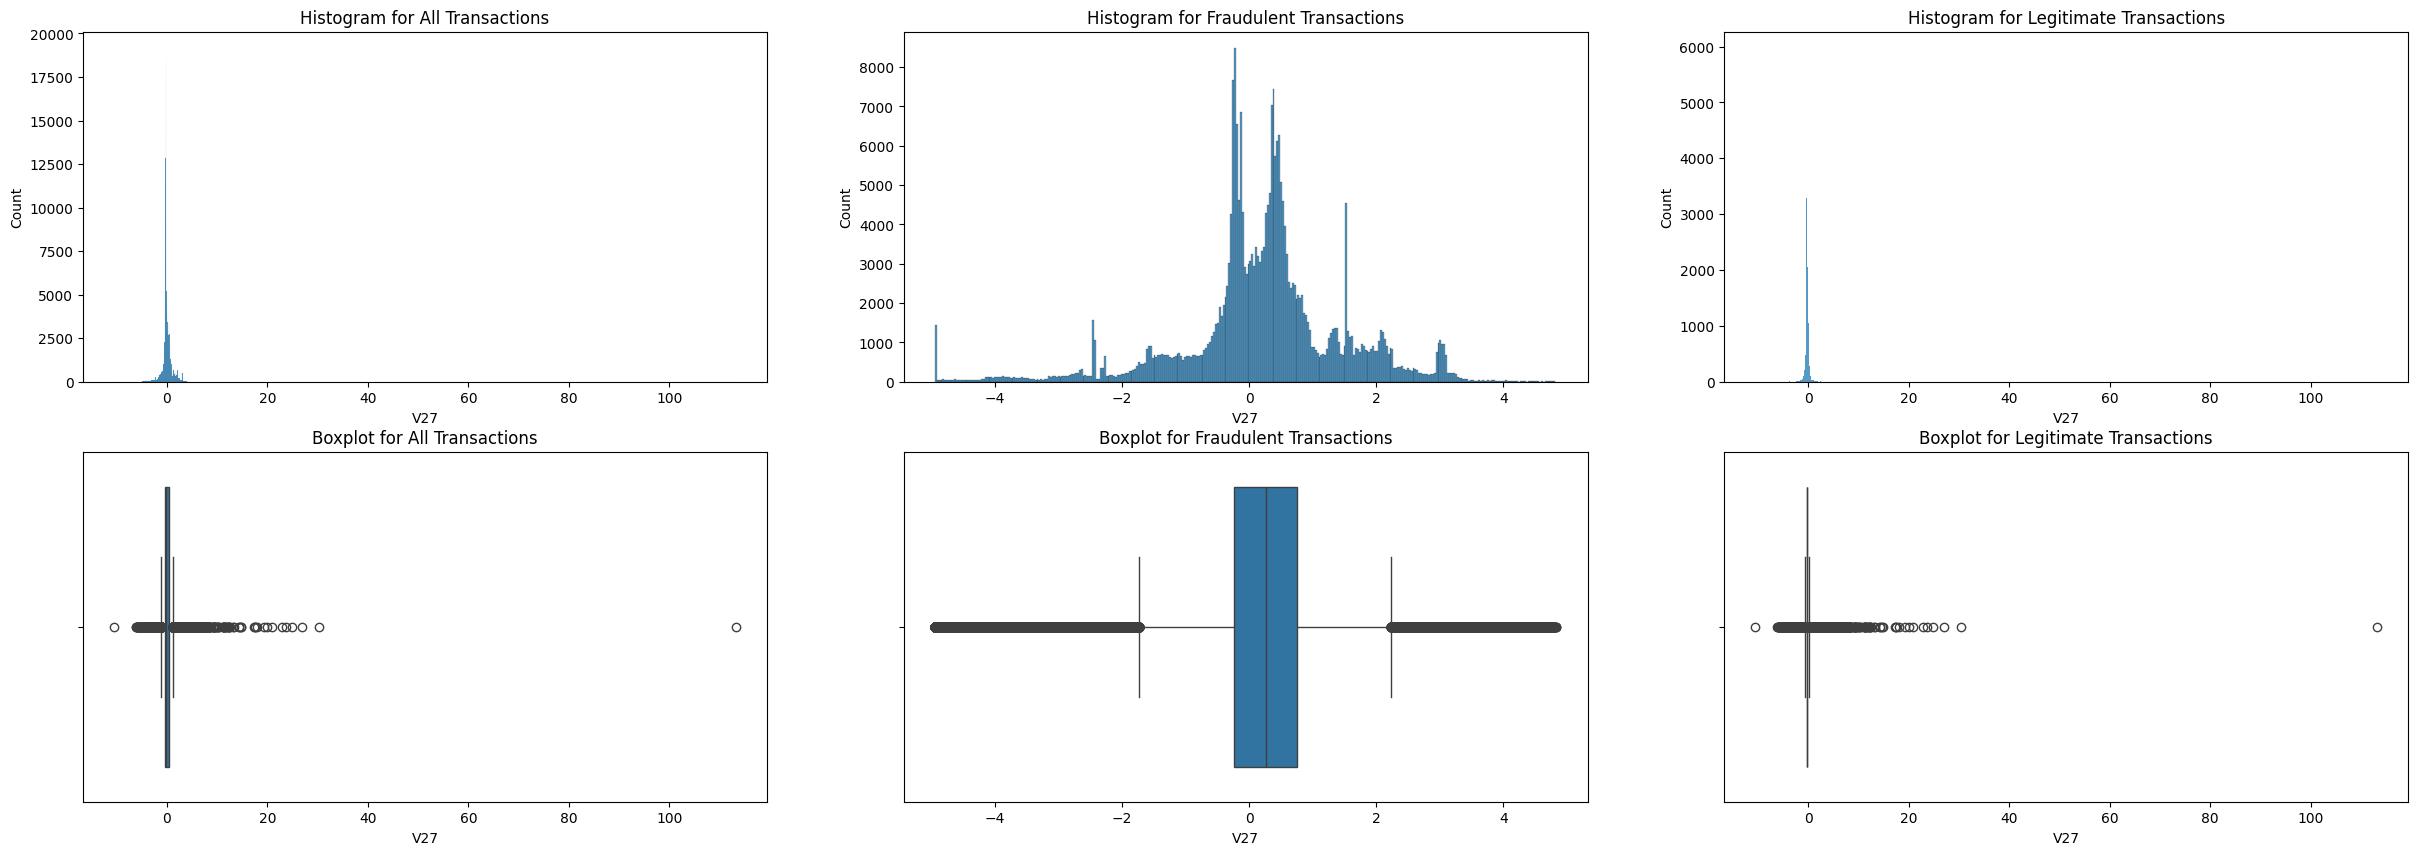

In [79]:
plot_hist_and_box(df,'V27')

### V28

Gaussian with narrow distribution except for fraudulent transactions

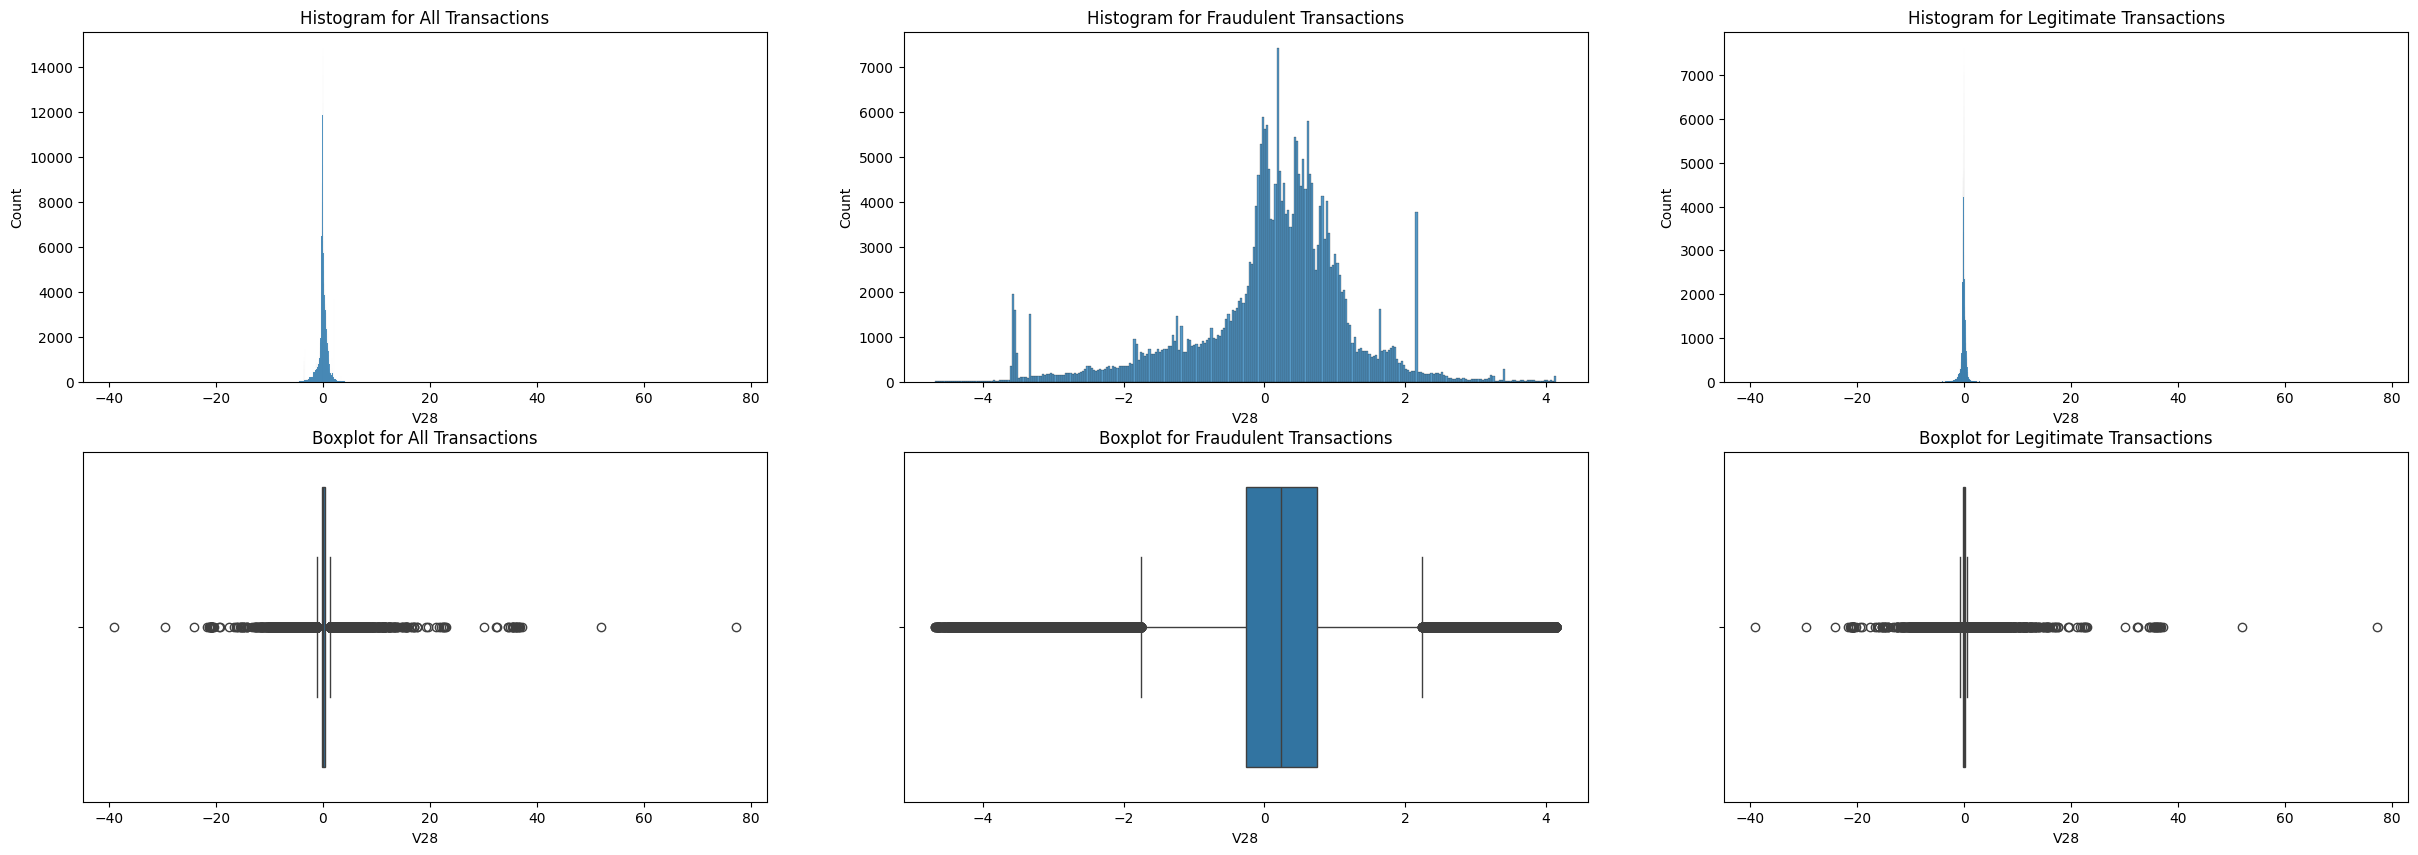

In [80]:
plot_hist_and_box(df,'V28')

### Amount

Pretty much uniform distribution

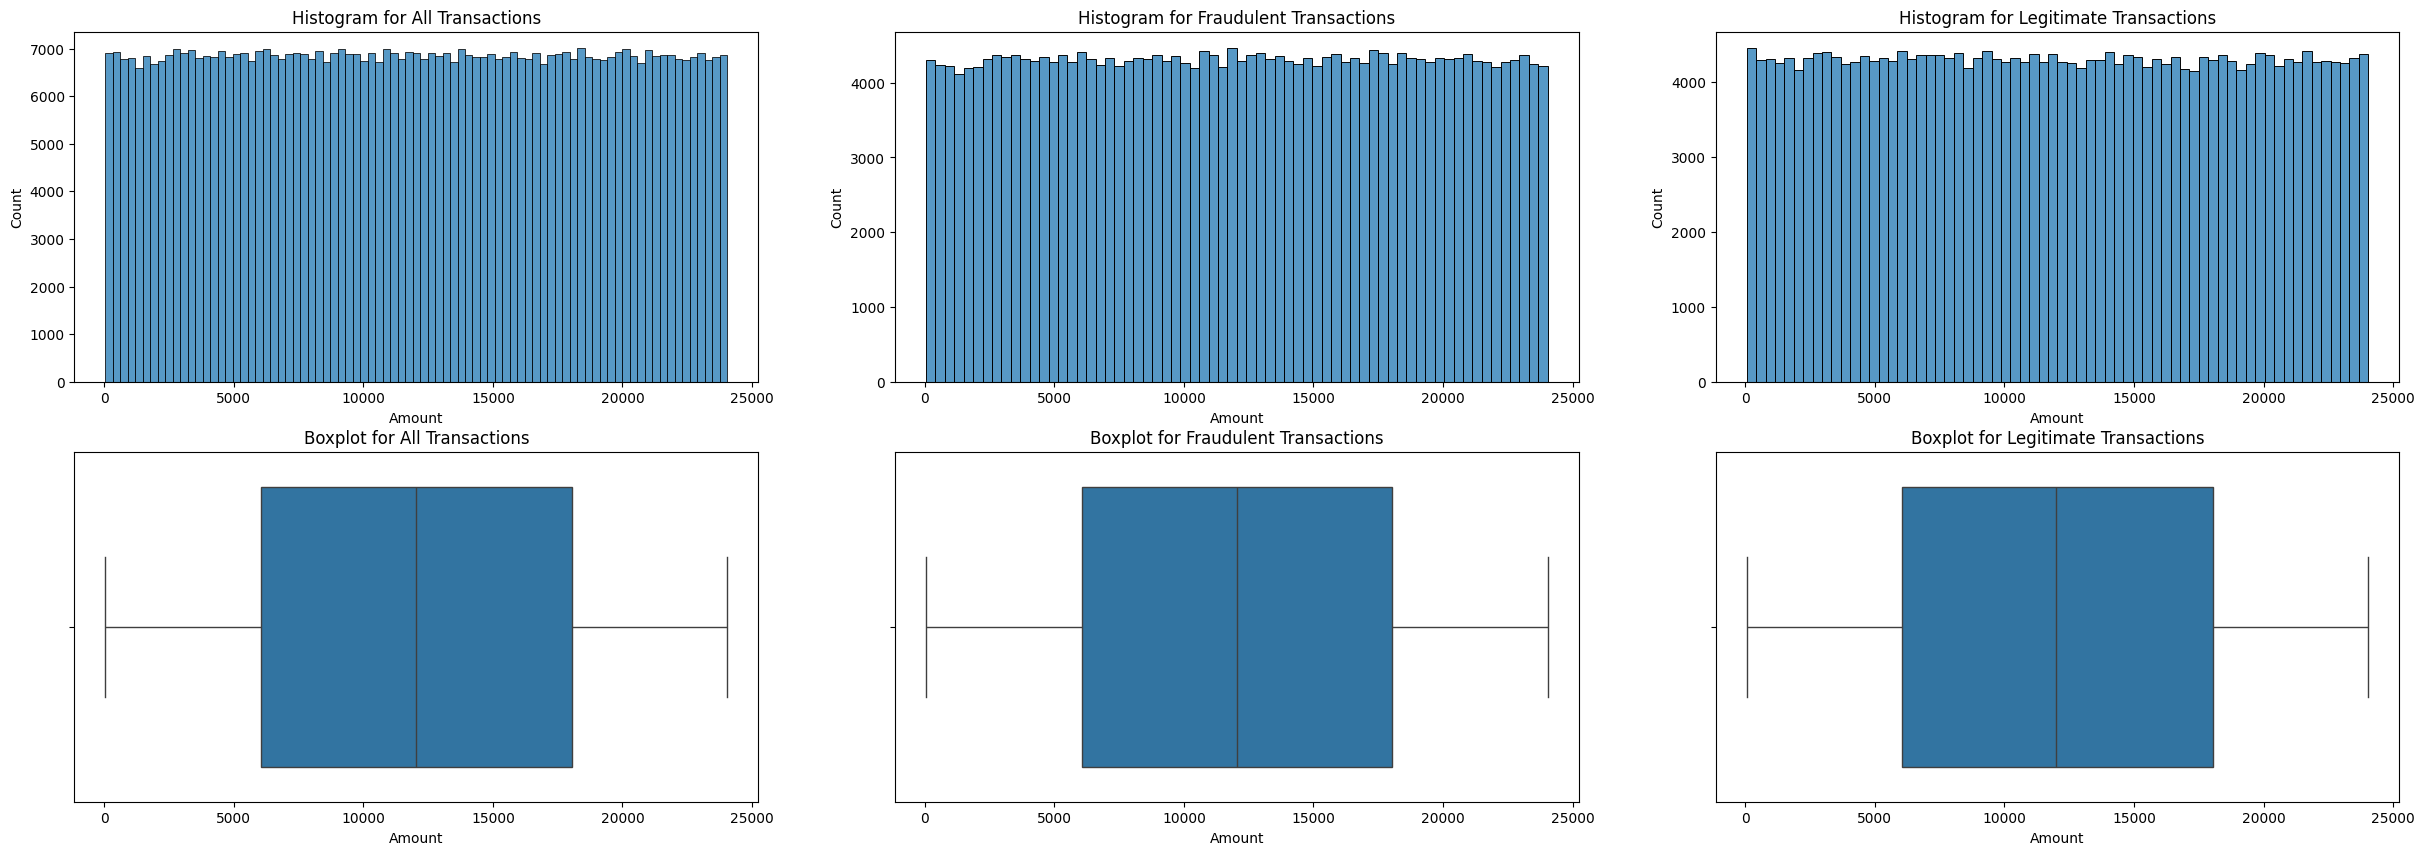

In [92]:
plot_hist_and_box(df,'Amount')

### Heatmap

We use this to take a glance at how certain columns correlate to Class

id has a suspicious correlation with class. Possibly because the front half of the data is legitimate transactions while the back half is fraudulent transactions 

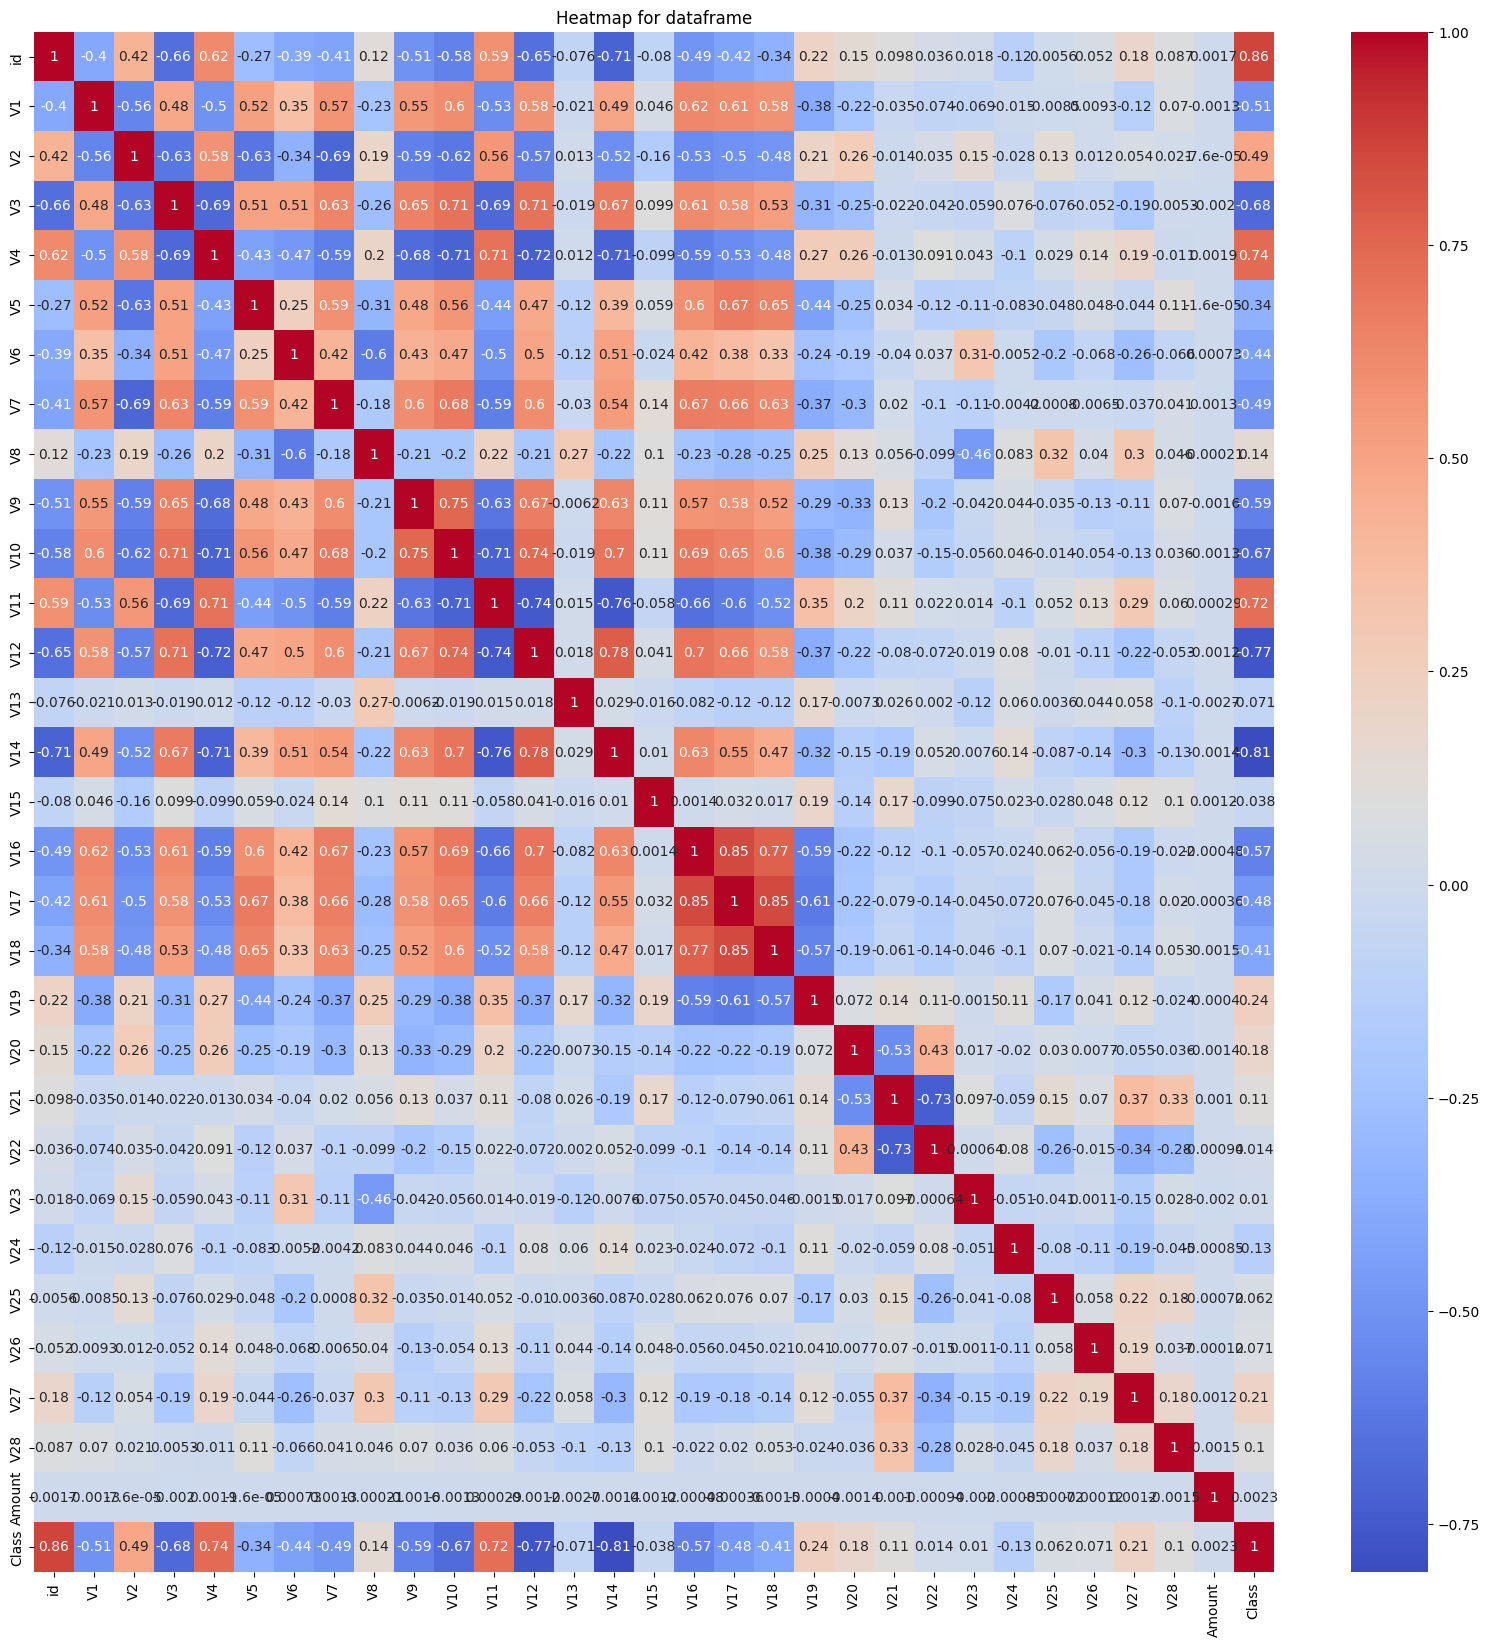

In [91]:
draw_heat_graph(df)

### Means and Standard Deviation

The data is standardized already and can hypothetically be used immediately for neural networks and random forests

In [19]:
column_stats = df.mean().to_frame(name='Mean').join(df.std().to_frame(name='Standard Deviation'))
column_stats

Mean  Standard Deviation
id      2.843145e+05       164149.486122
V1     -5.638058e-17            1.000001
V2     -1.319545e-16            1.000001
V3     -3.518788e-17            1.000001
V4     -2.879008e-17            1.000001
V5      7.997245e-18            1.000001
V6     -3.958636e-17            1.000001
V7     -3.198898e-17            1.000001
V8      2.109273e-17            1.000001
V9      3.998623e-17            1.000001
V10     1.991314e-16            1.000001
V11    -1.183592e-16            1.000001
V12    -5.758017e-17            1.000001
V13    -5.698037e-18            1.000001
V14    -4.078595e-17            1.000001
V15     2.649087e-17            1.000001
V16    -1.719408e-17            1.000001
V17    -3.398829e-17            1.000001
V18    -5.837989e-17            1.000001
V19     2.479146e-17            1.000001
V20    -1.579456e-17            1.000001
V21     4.758361e-17            1.000001
V22     3.948640e-18            1.000001
V23     6.194741e-18            1.000001
V24    -2.799036e-18            1.000001
V25    -3.178905e-17            1.000001
V26    -7.497417e-18            1.000001
V27    -3.598760e-17            1.000001
V28     2.609101e-17            1.000001
Amount  1.204196e+04         6919.644449
Class   5.000000e-01            0.500000

## With Changing Data

So we noticed there are a lot of outliers here. We will experiment with some modifications to make things work better.

We'll start by removing the extreme outlier found in most of our data

Turns out it isn't just one data point with extreme data, so simply removing a singular point will not do the trick

In [8]:
#df2 = df.drop(df['V3'].idxmax())

Now we'll try using the RobustScaler

RobustScaling didn't give results that differed notably from the original

Further research is in order

In [ ]:
# df2 = df.copy()
# for col in df2.columns:
#     if col != 'Class' and col != 'id':
#         df2[col] = RobustScaler().fit_transform(df2[col].values.reshape(-1, 1))
#         plot_hist_and_box(df2, col)

Consulting online resources led to us finding about different transformations we can use

### Quartile Transformation

Ok, this is good, but we are not sure if this is best for our data. Testing with and without the modification is in order.

C:\Users\focka\AppData\Local\Temp\ipykernel_28440\473388025.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2, 3, figsize=(30, 10))


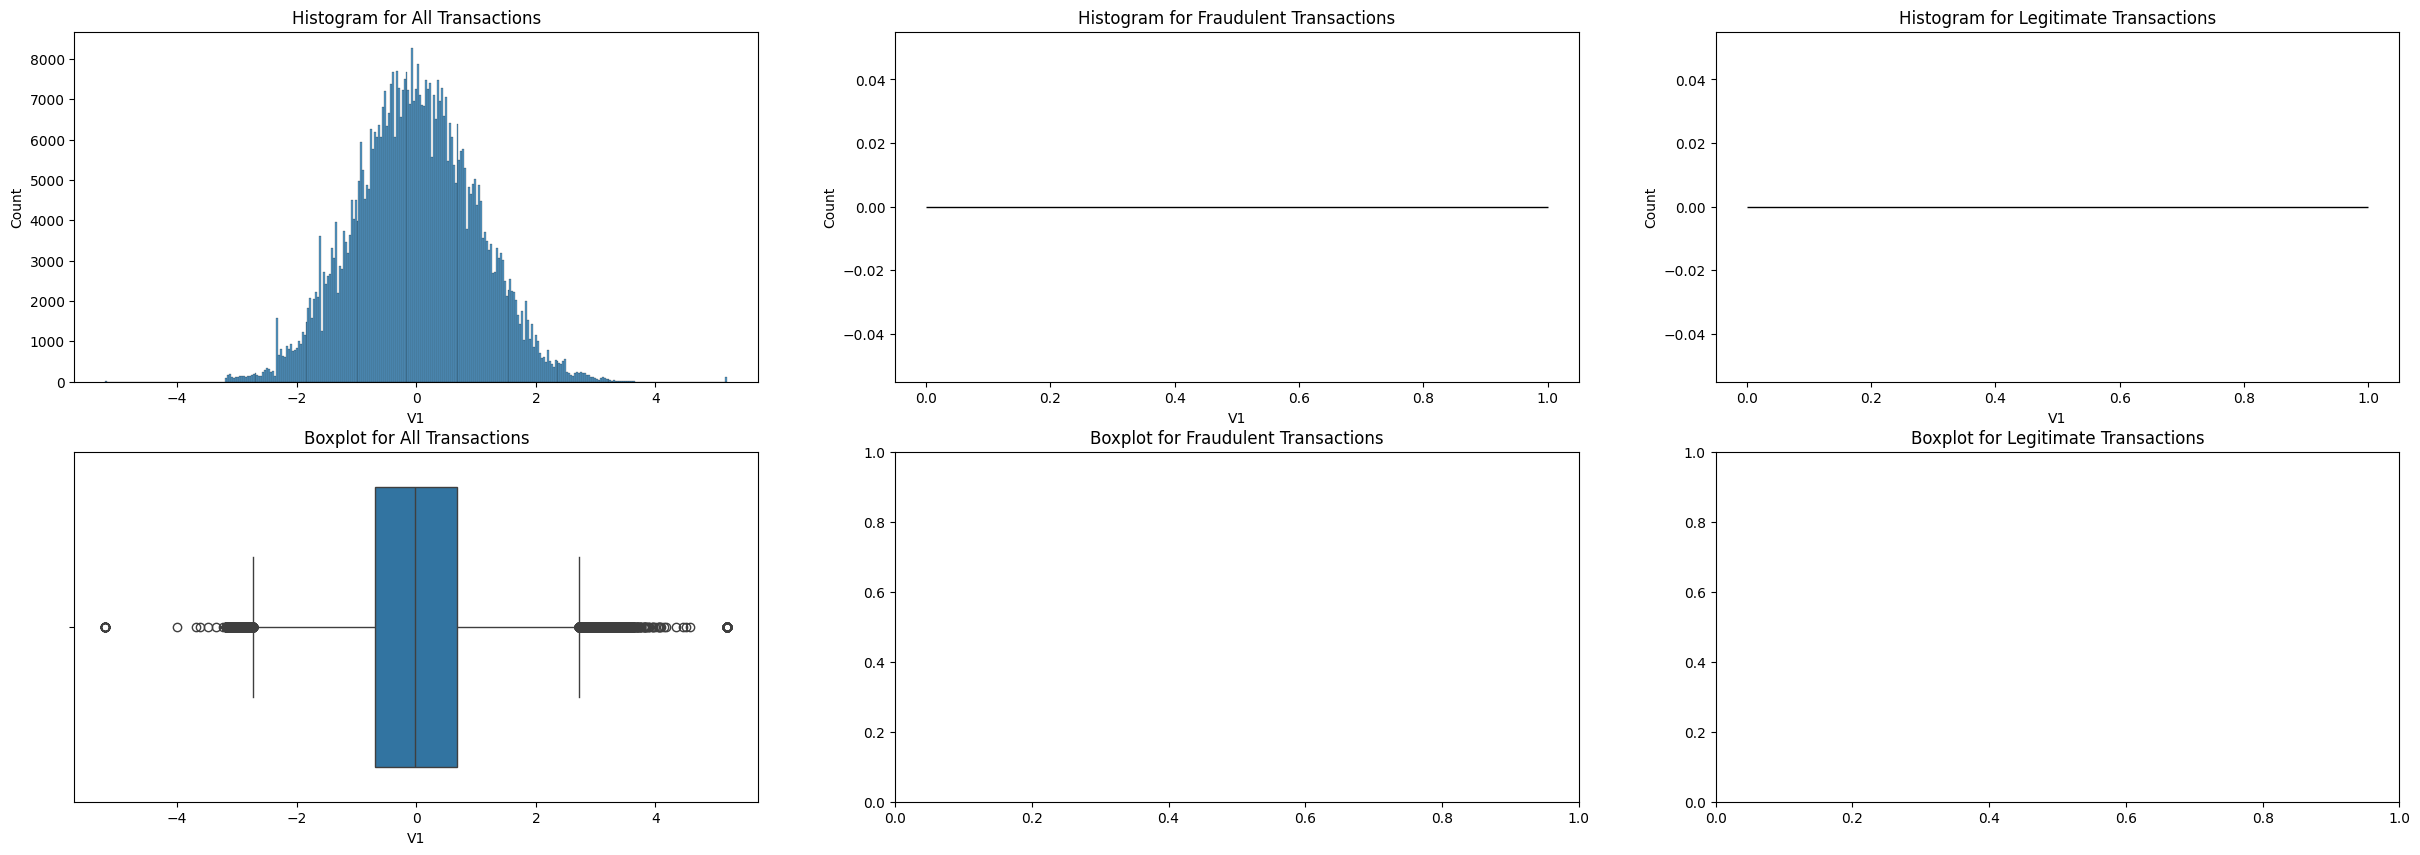

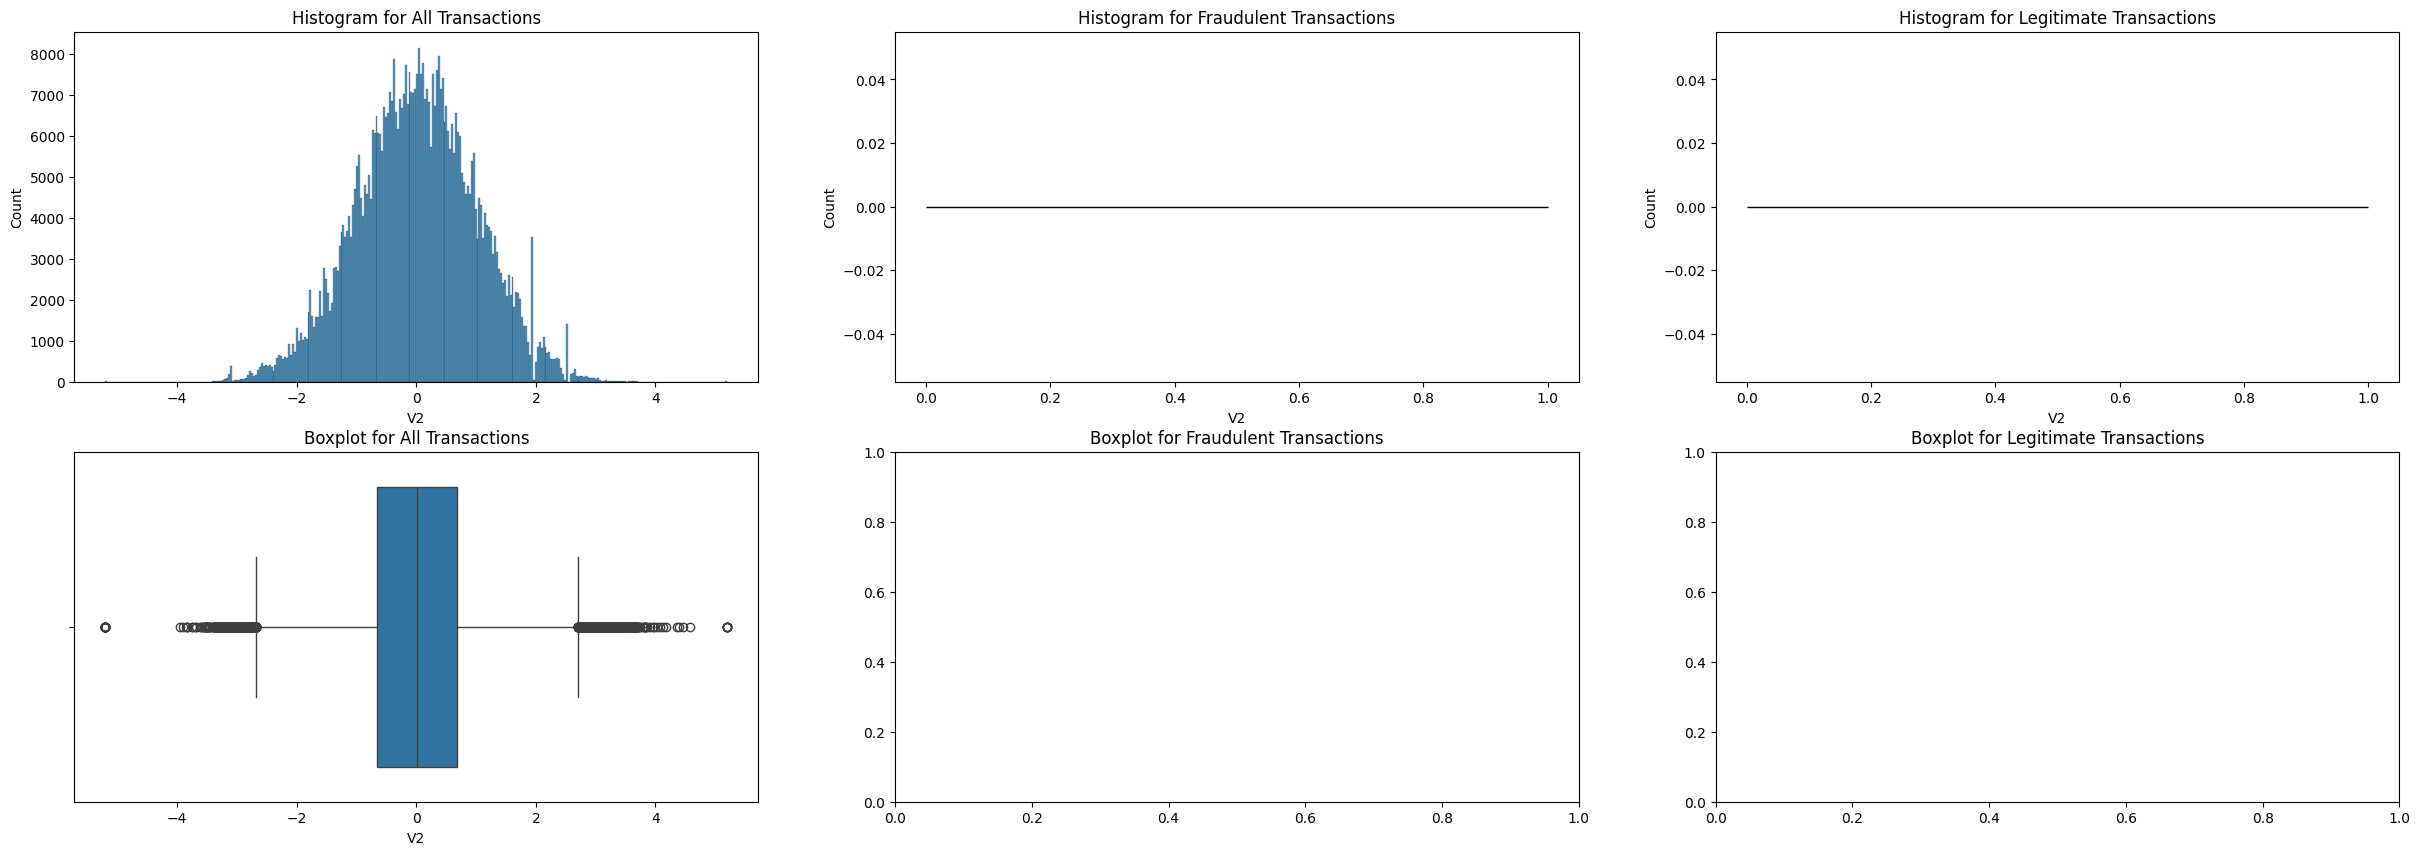

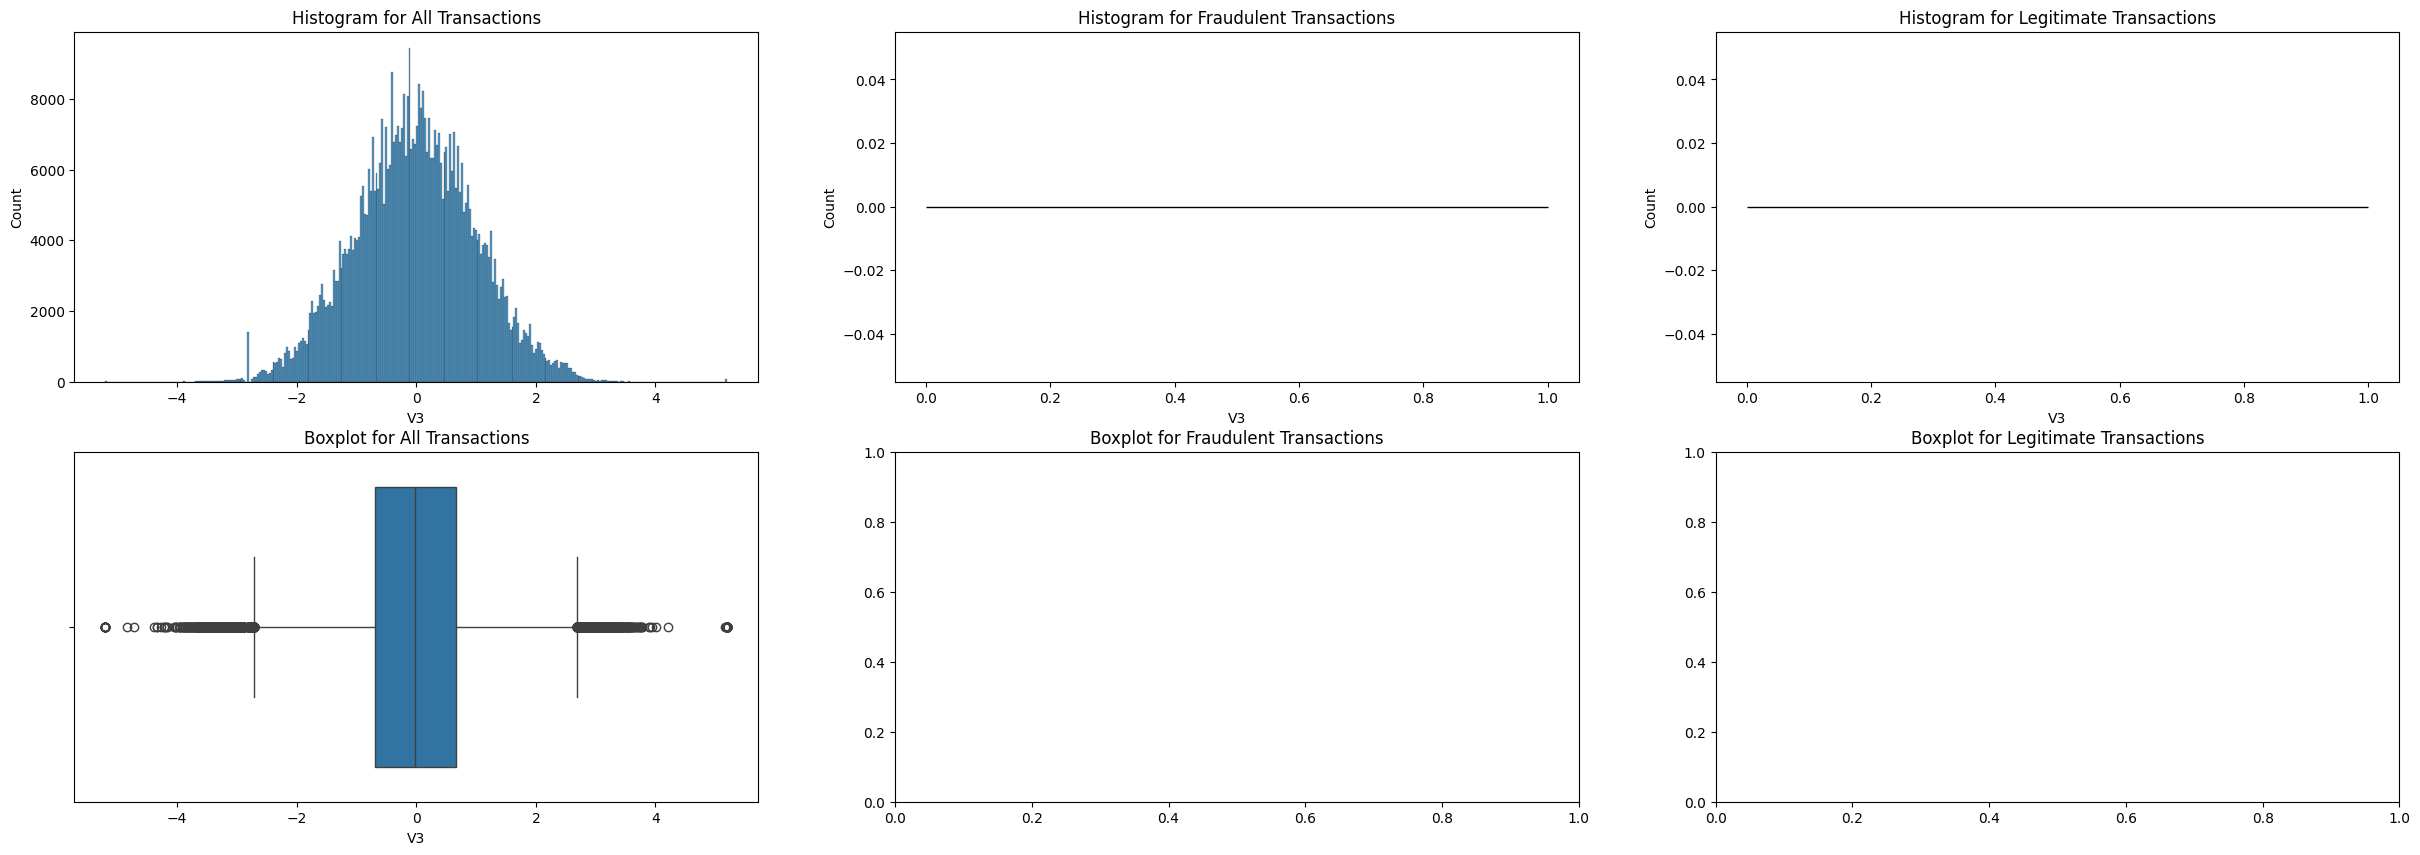

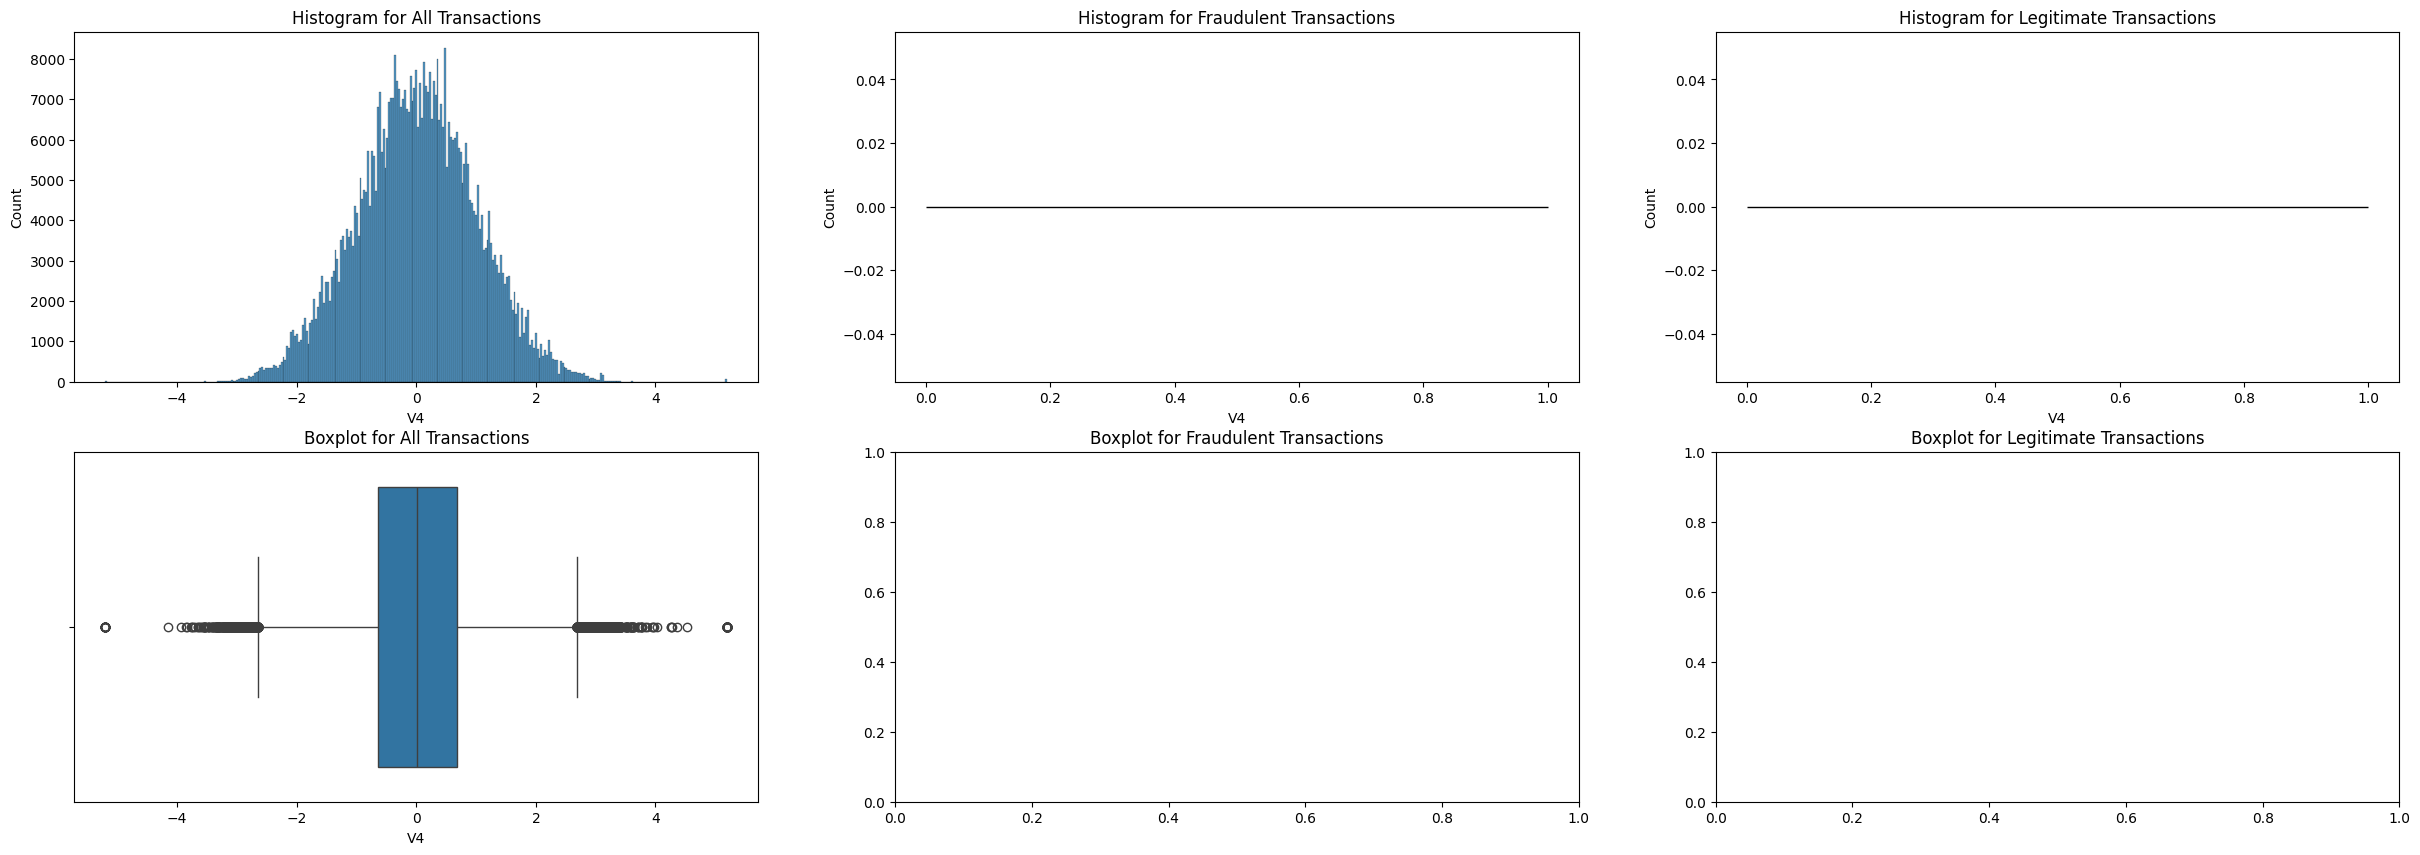

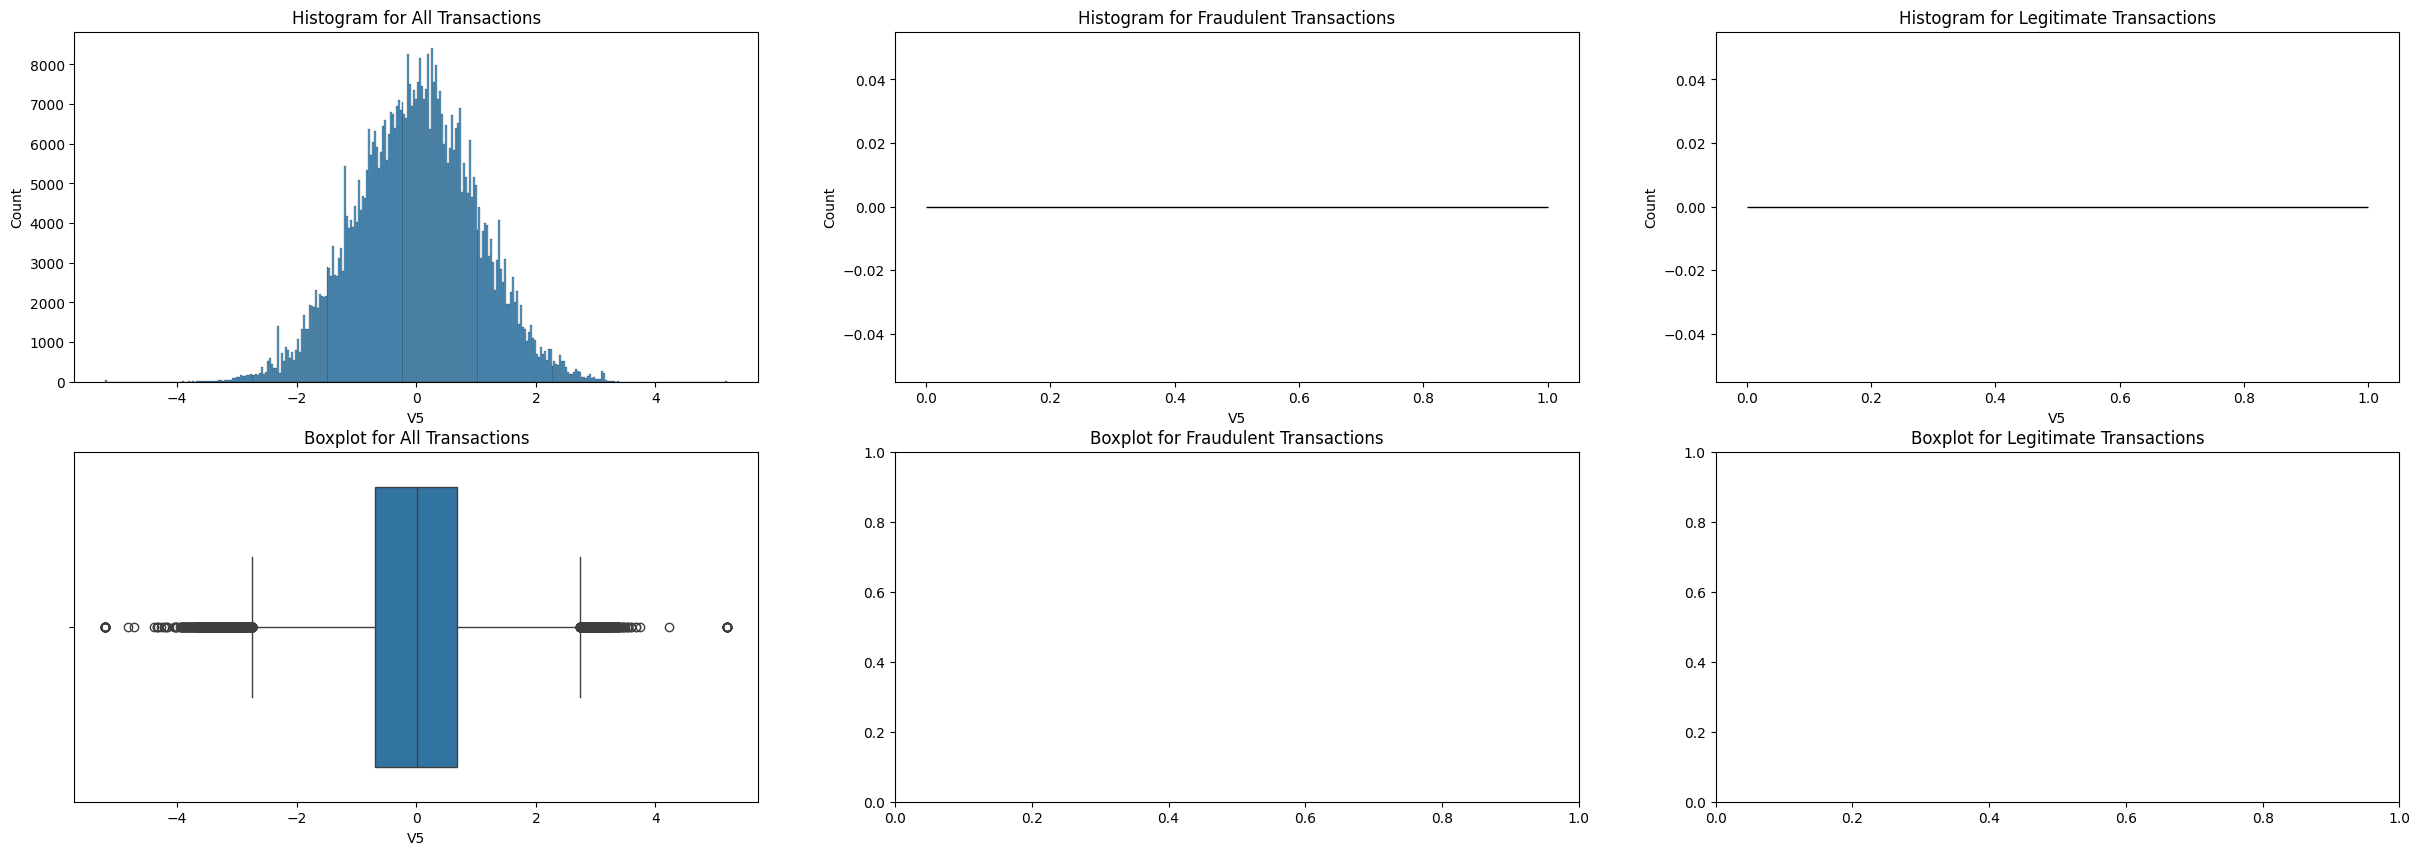

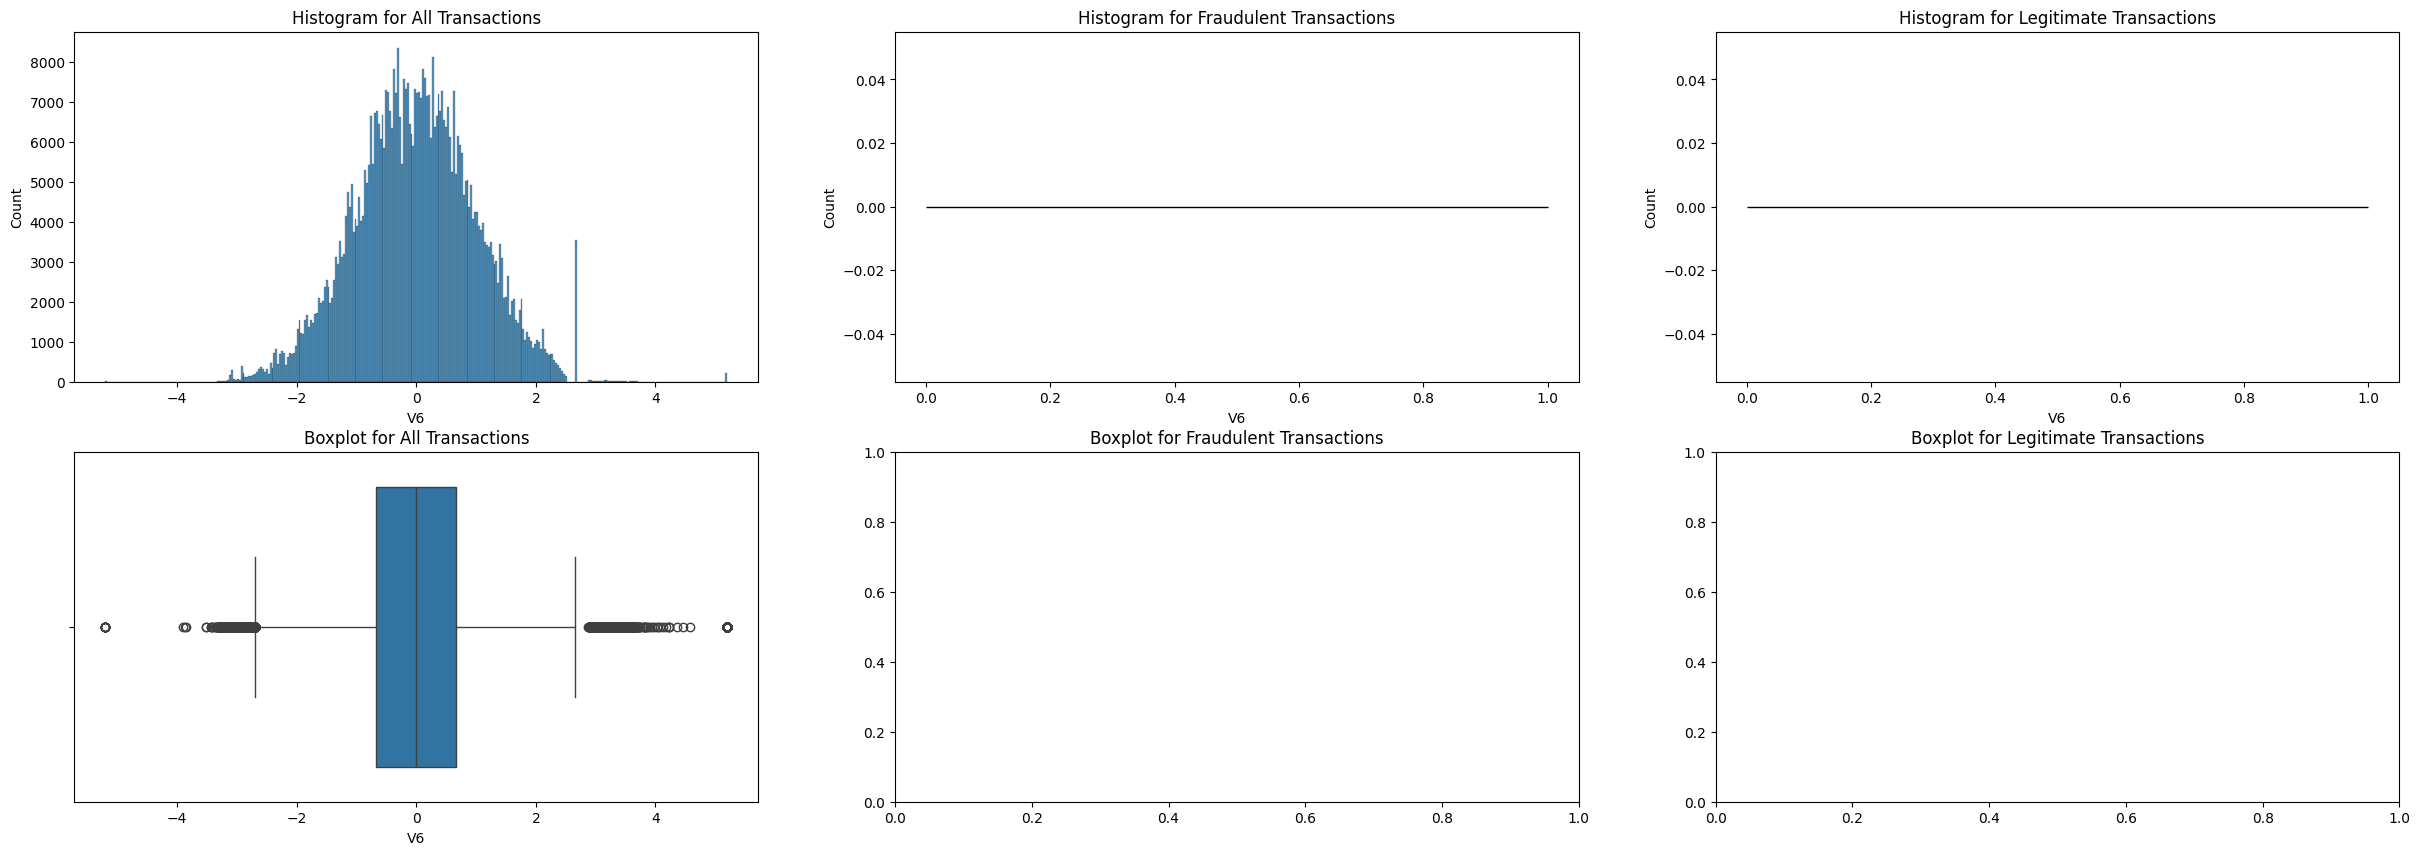

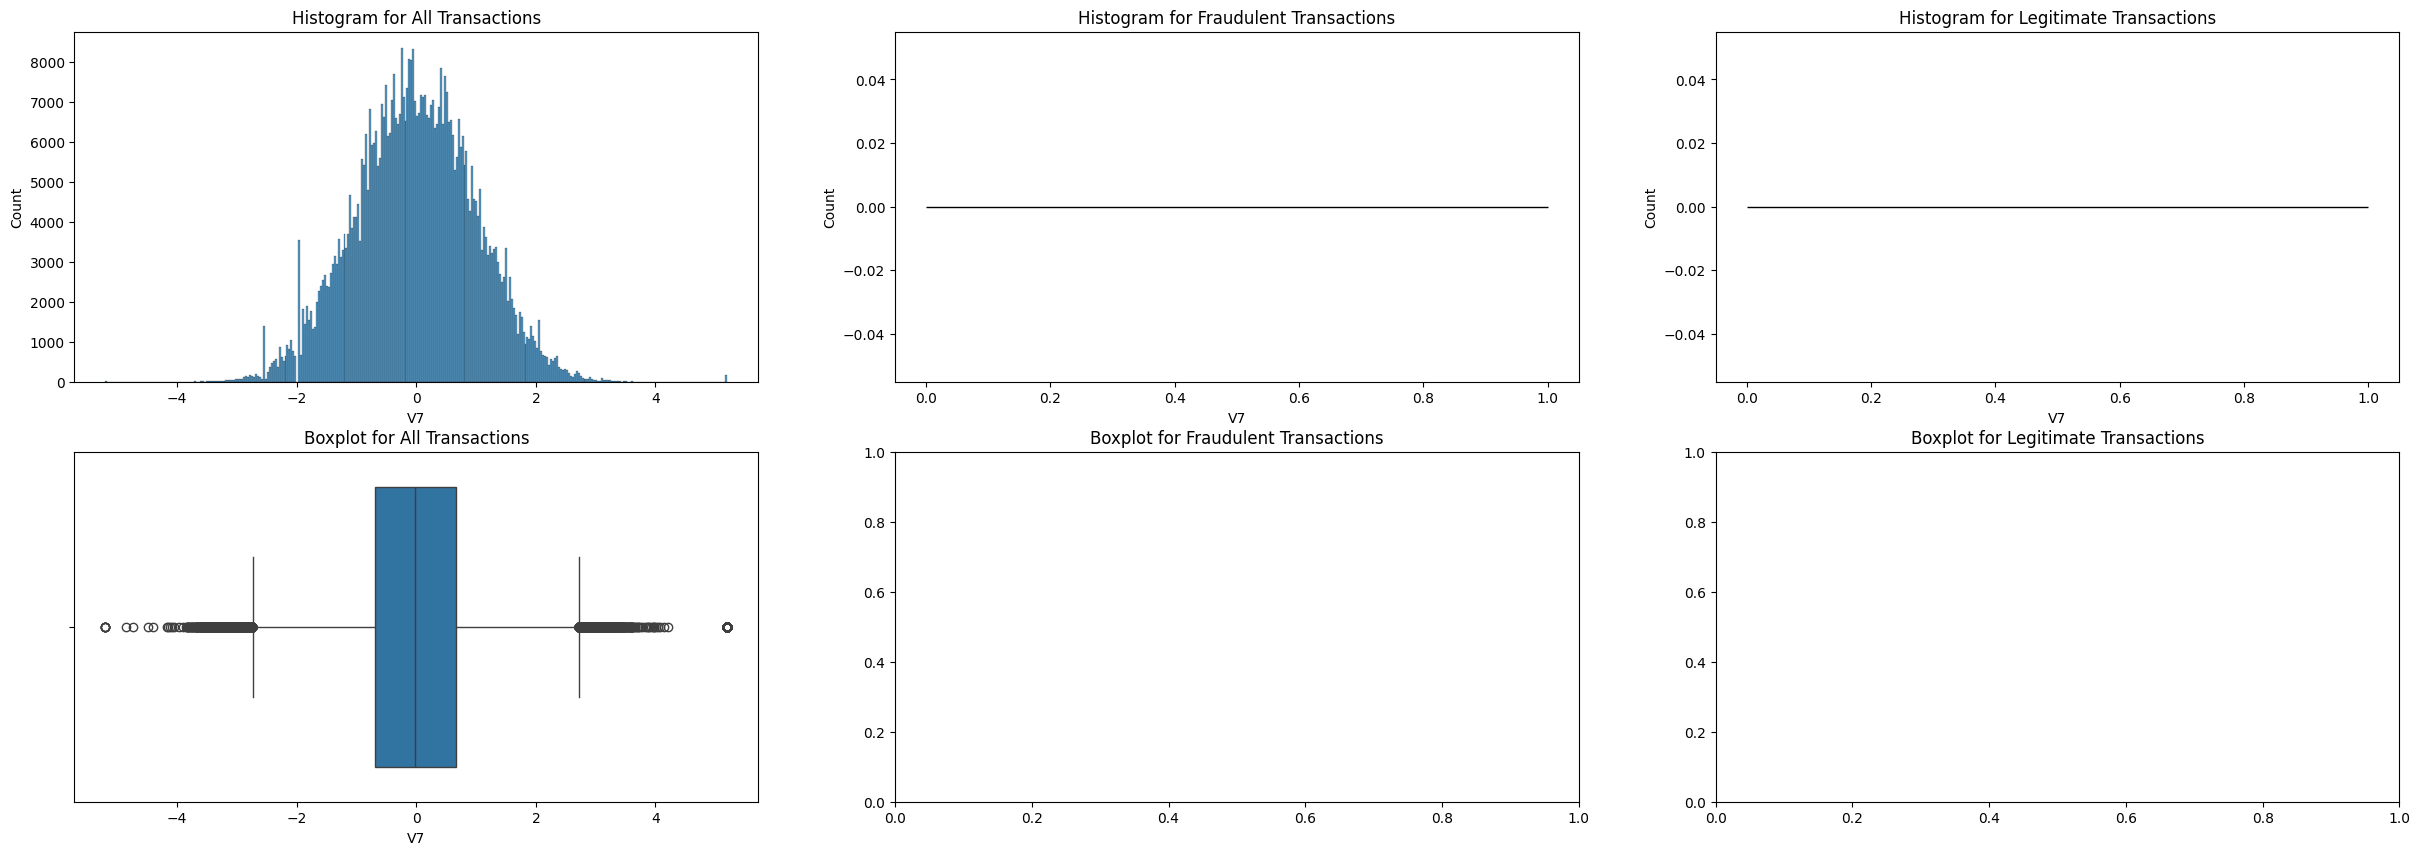

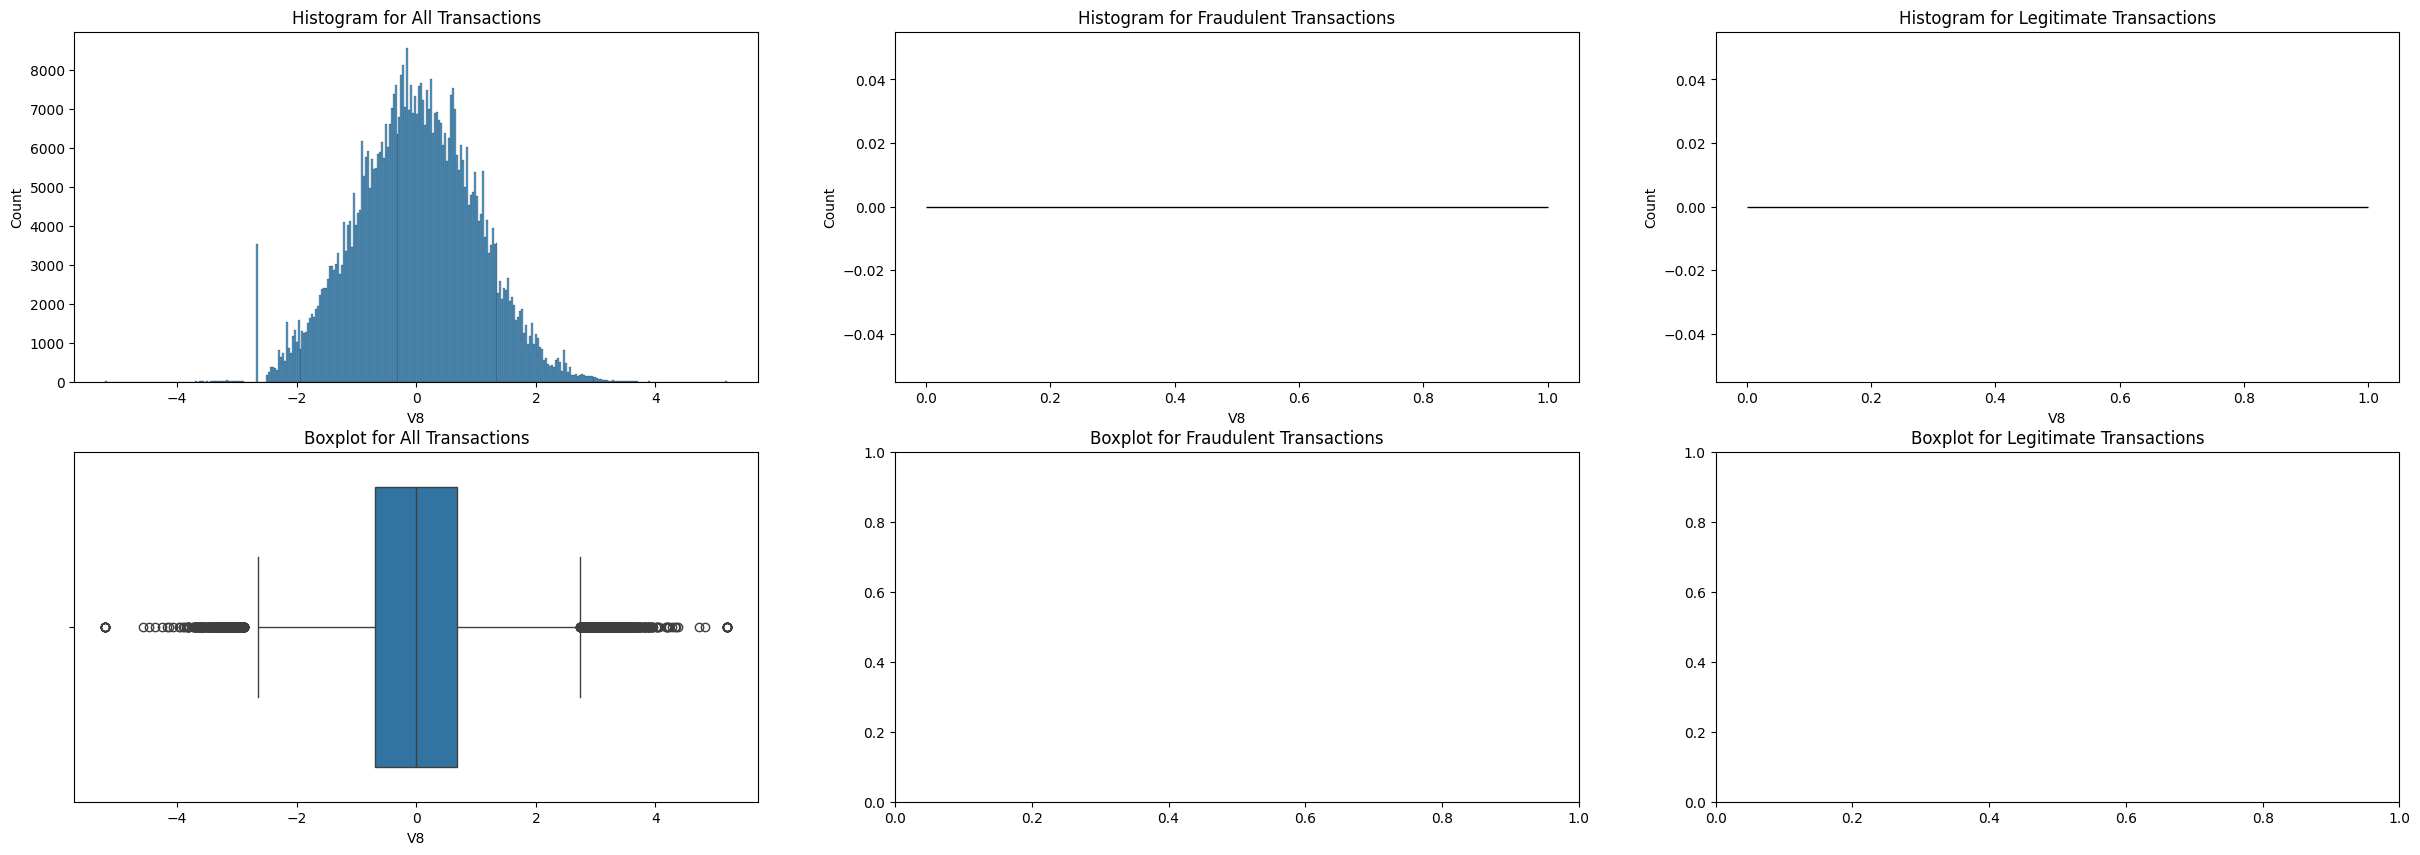

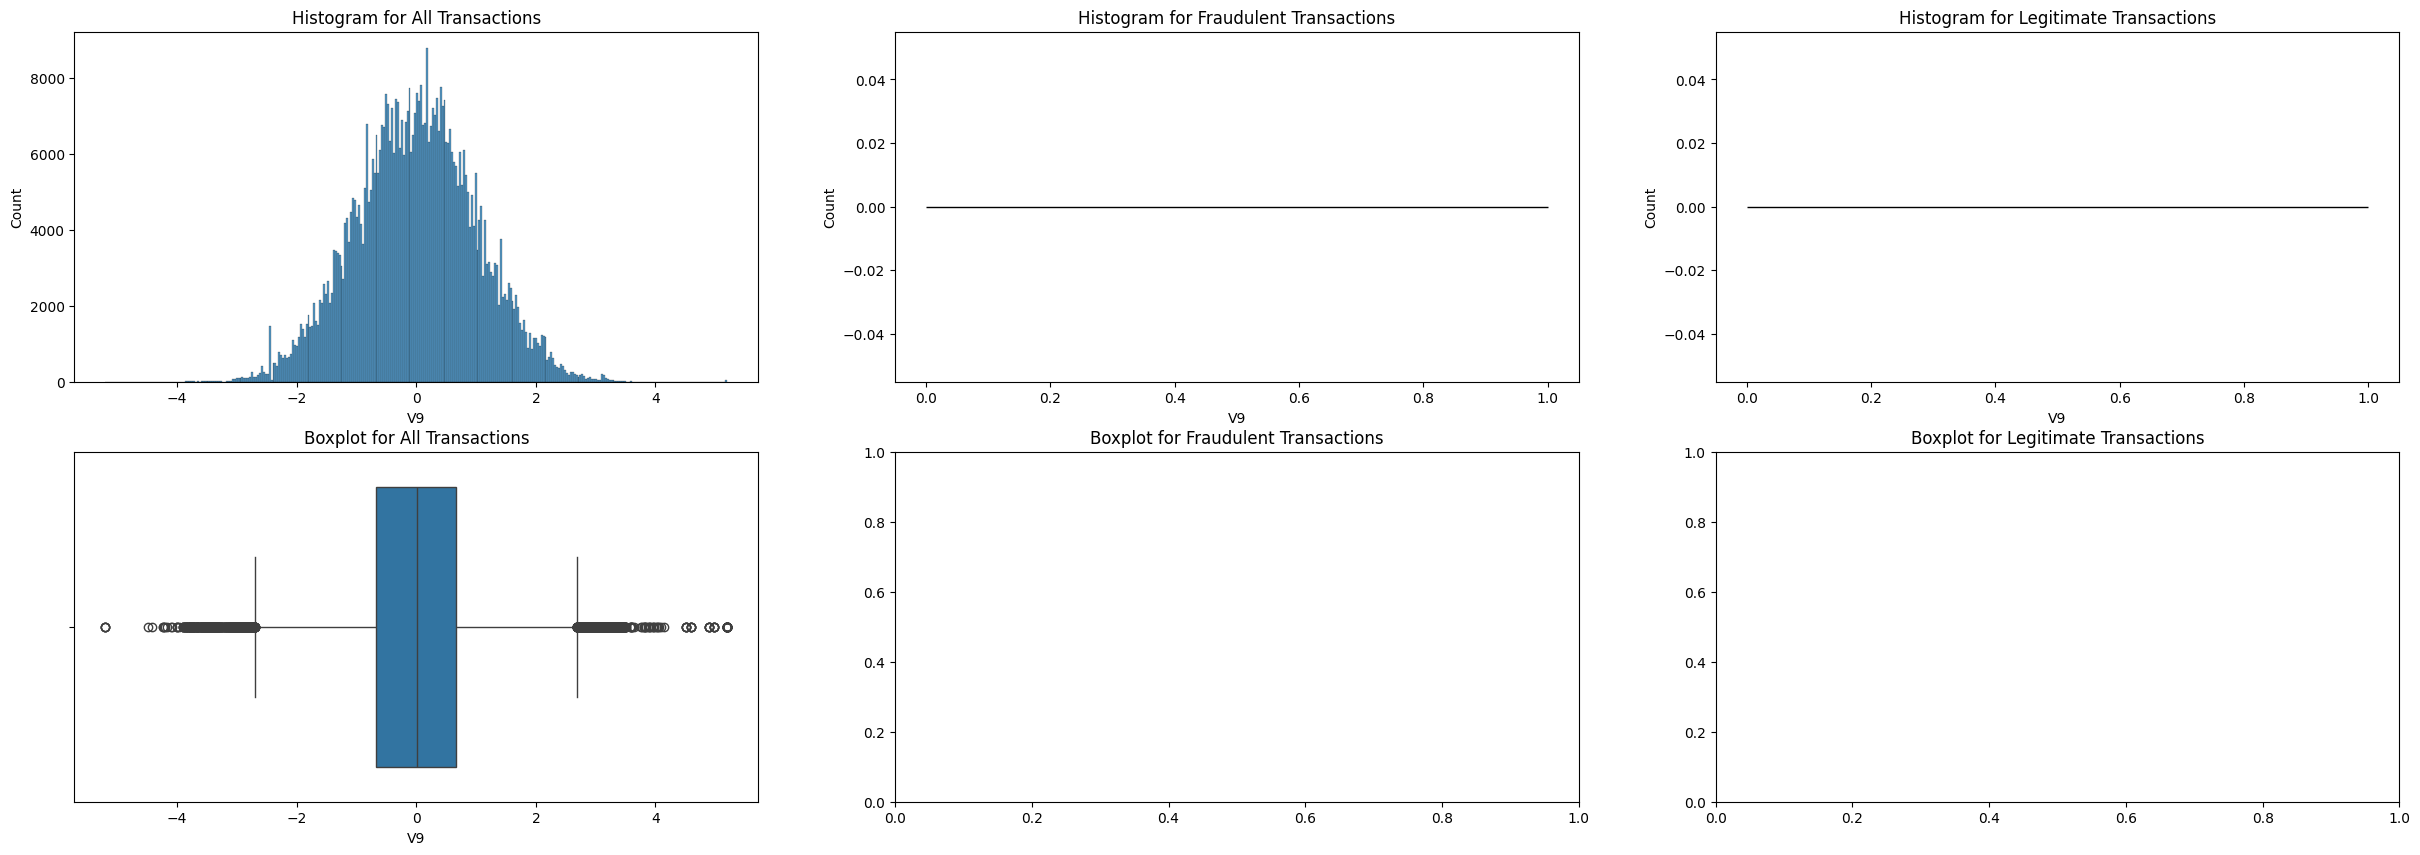

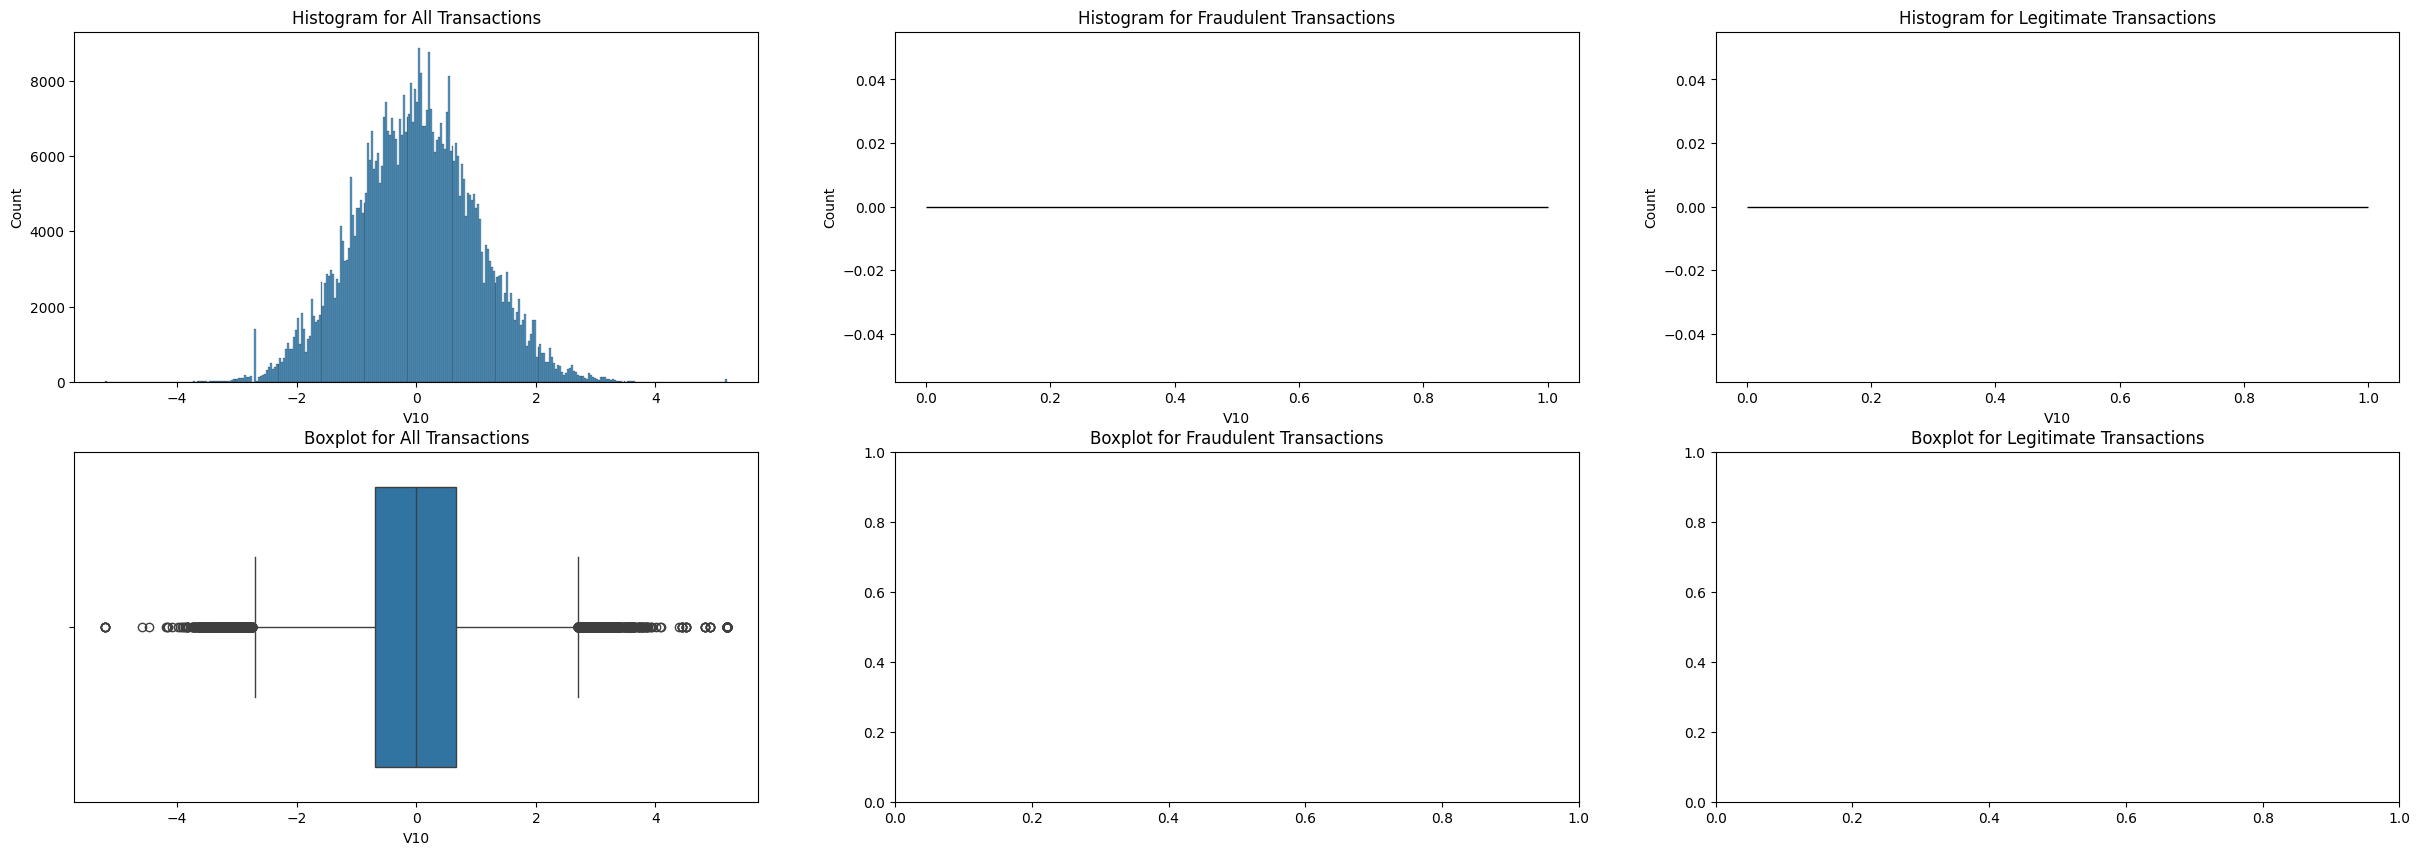

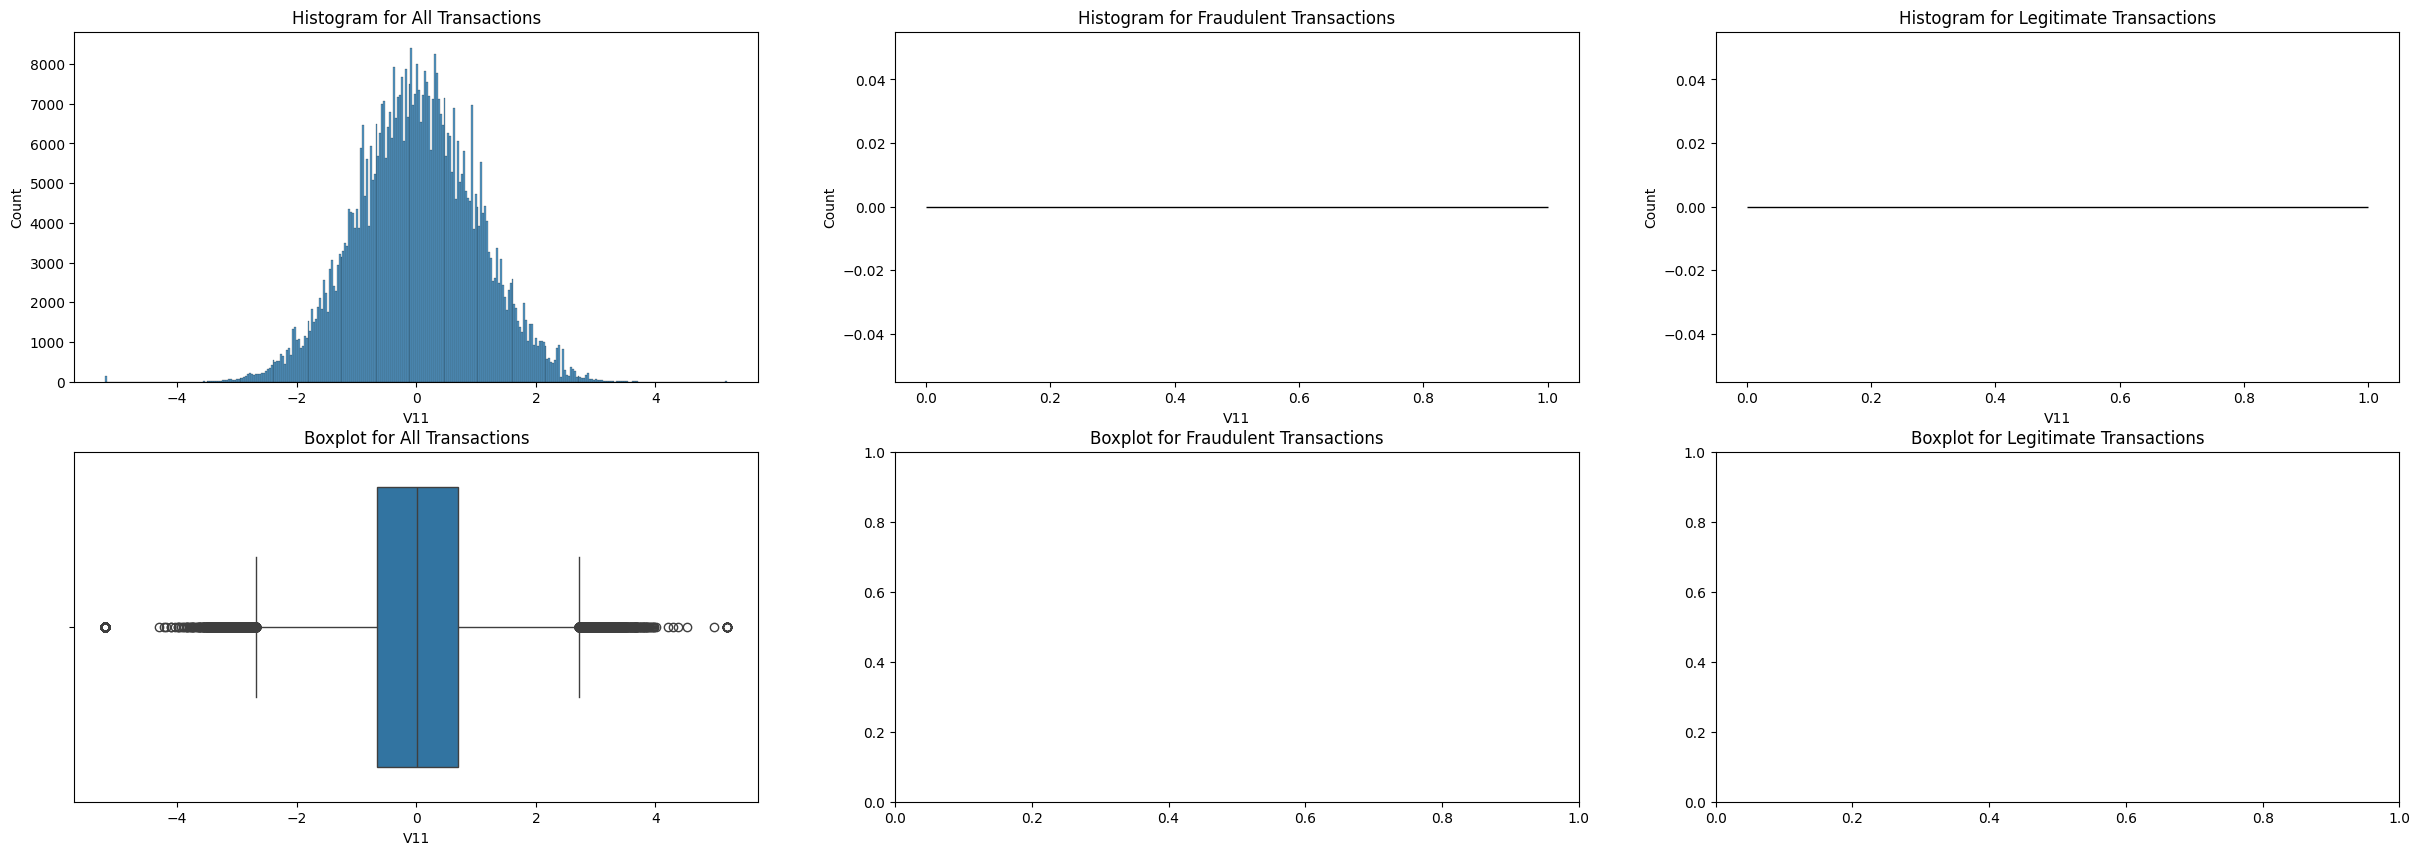

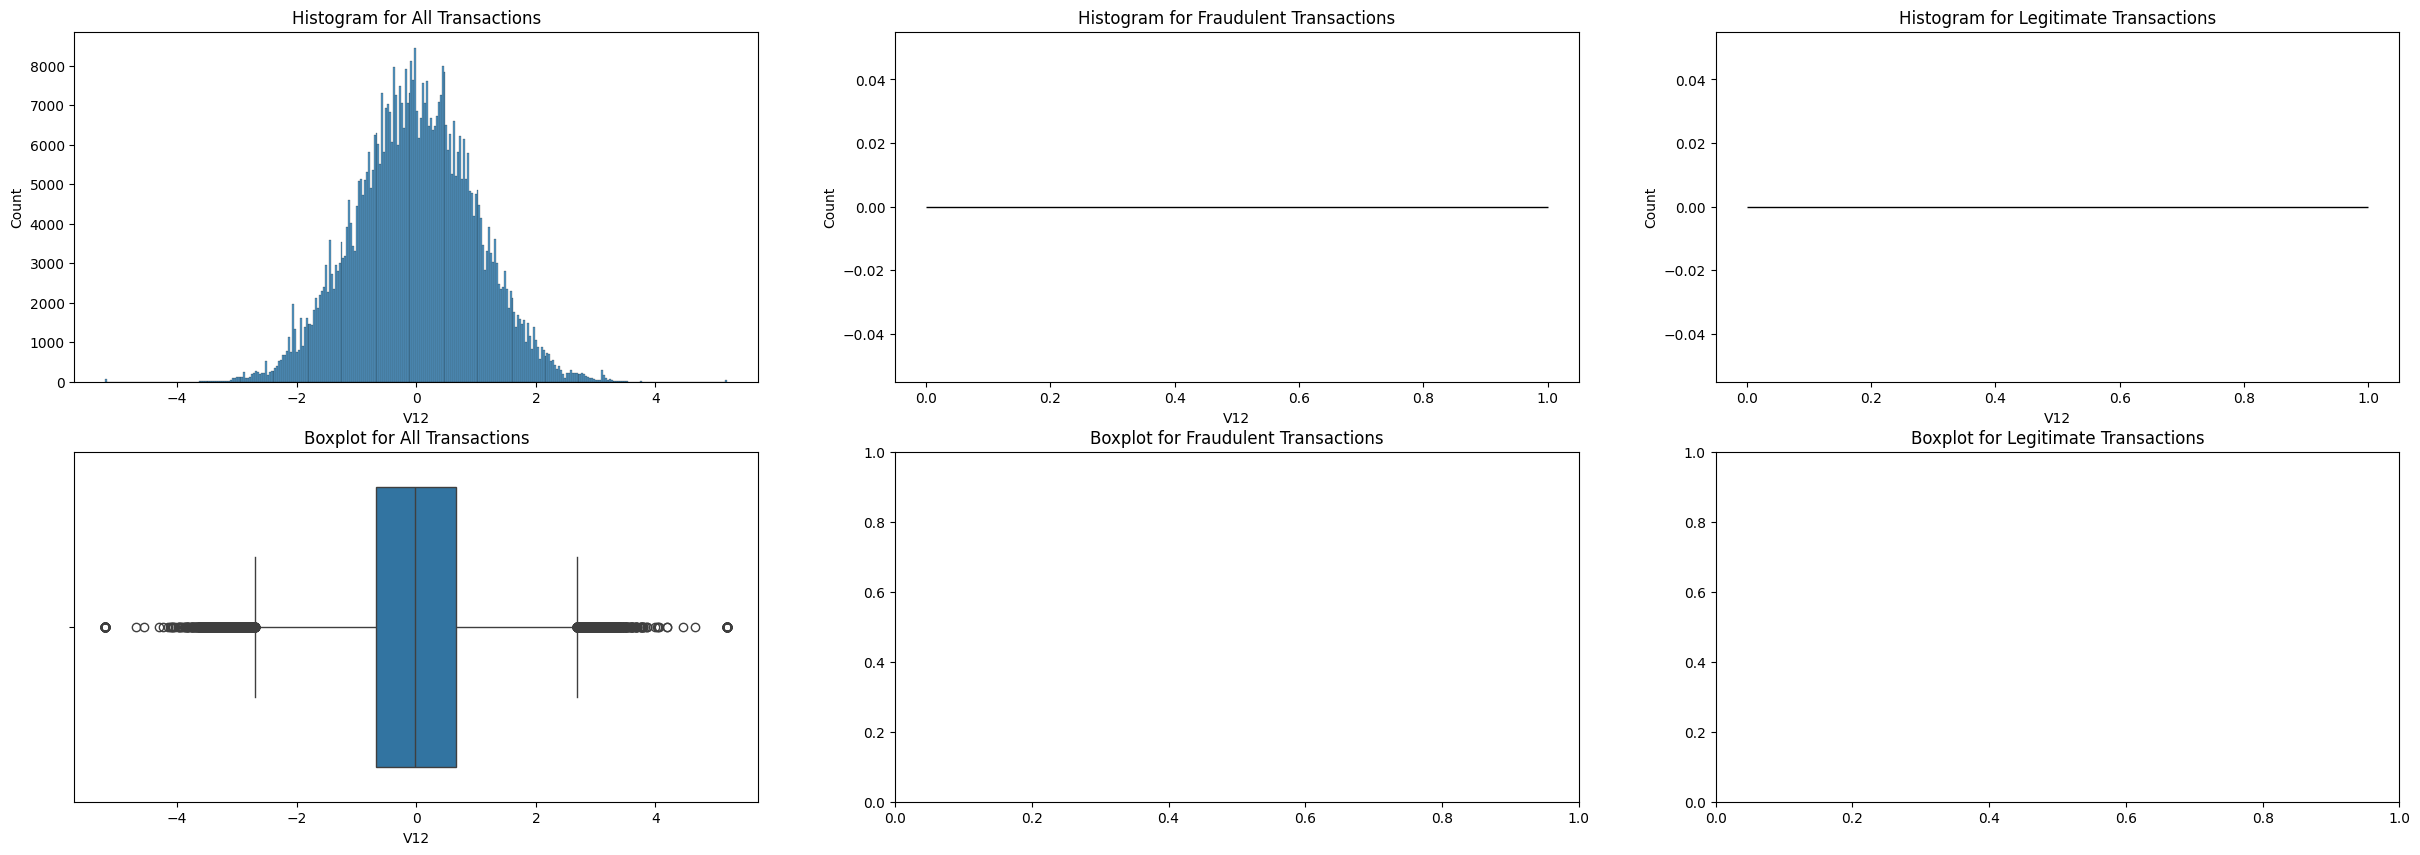

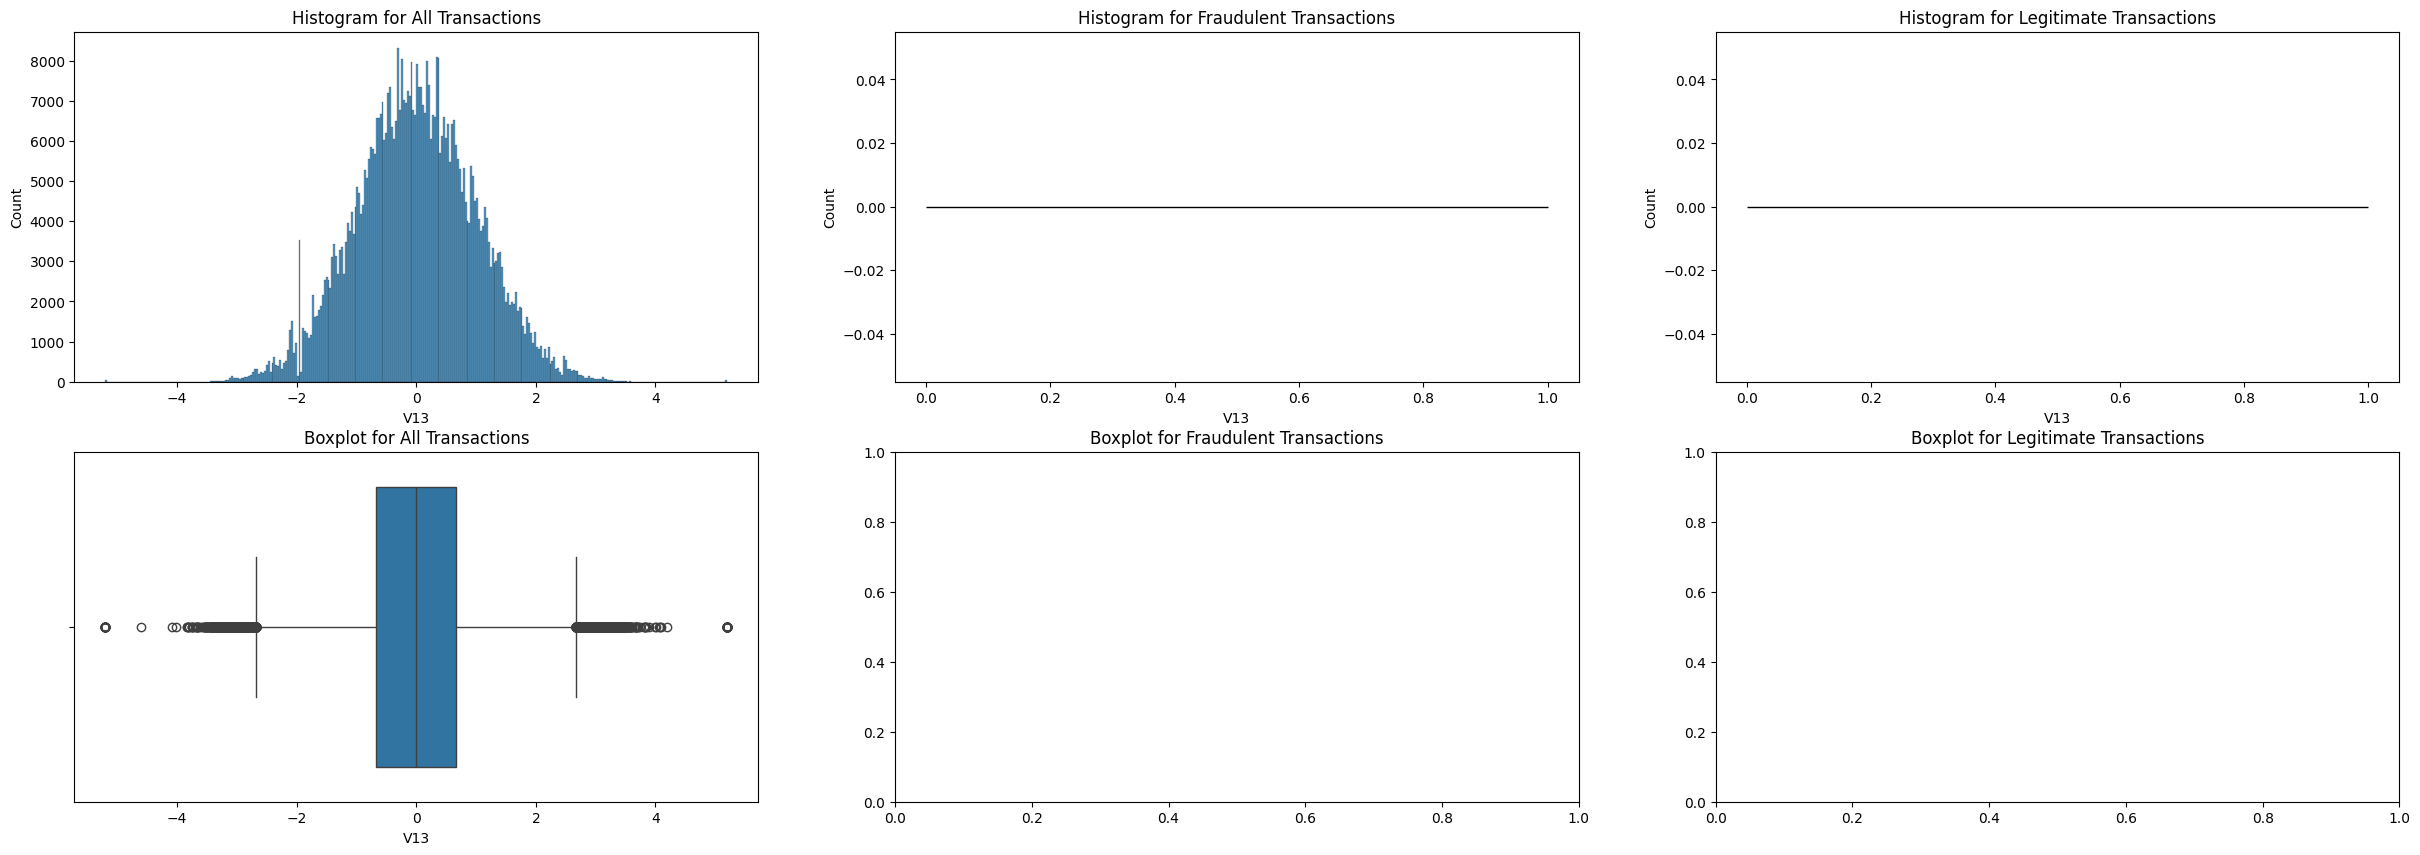

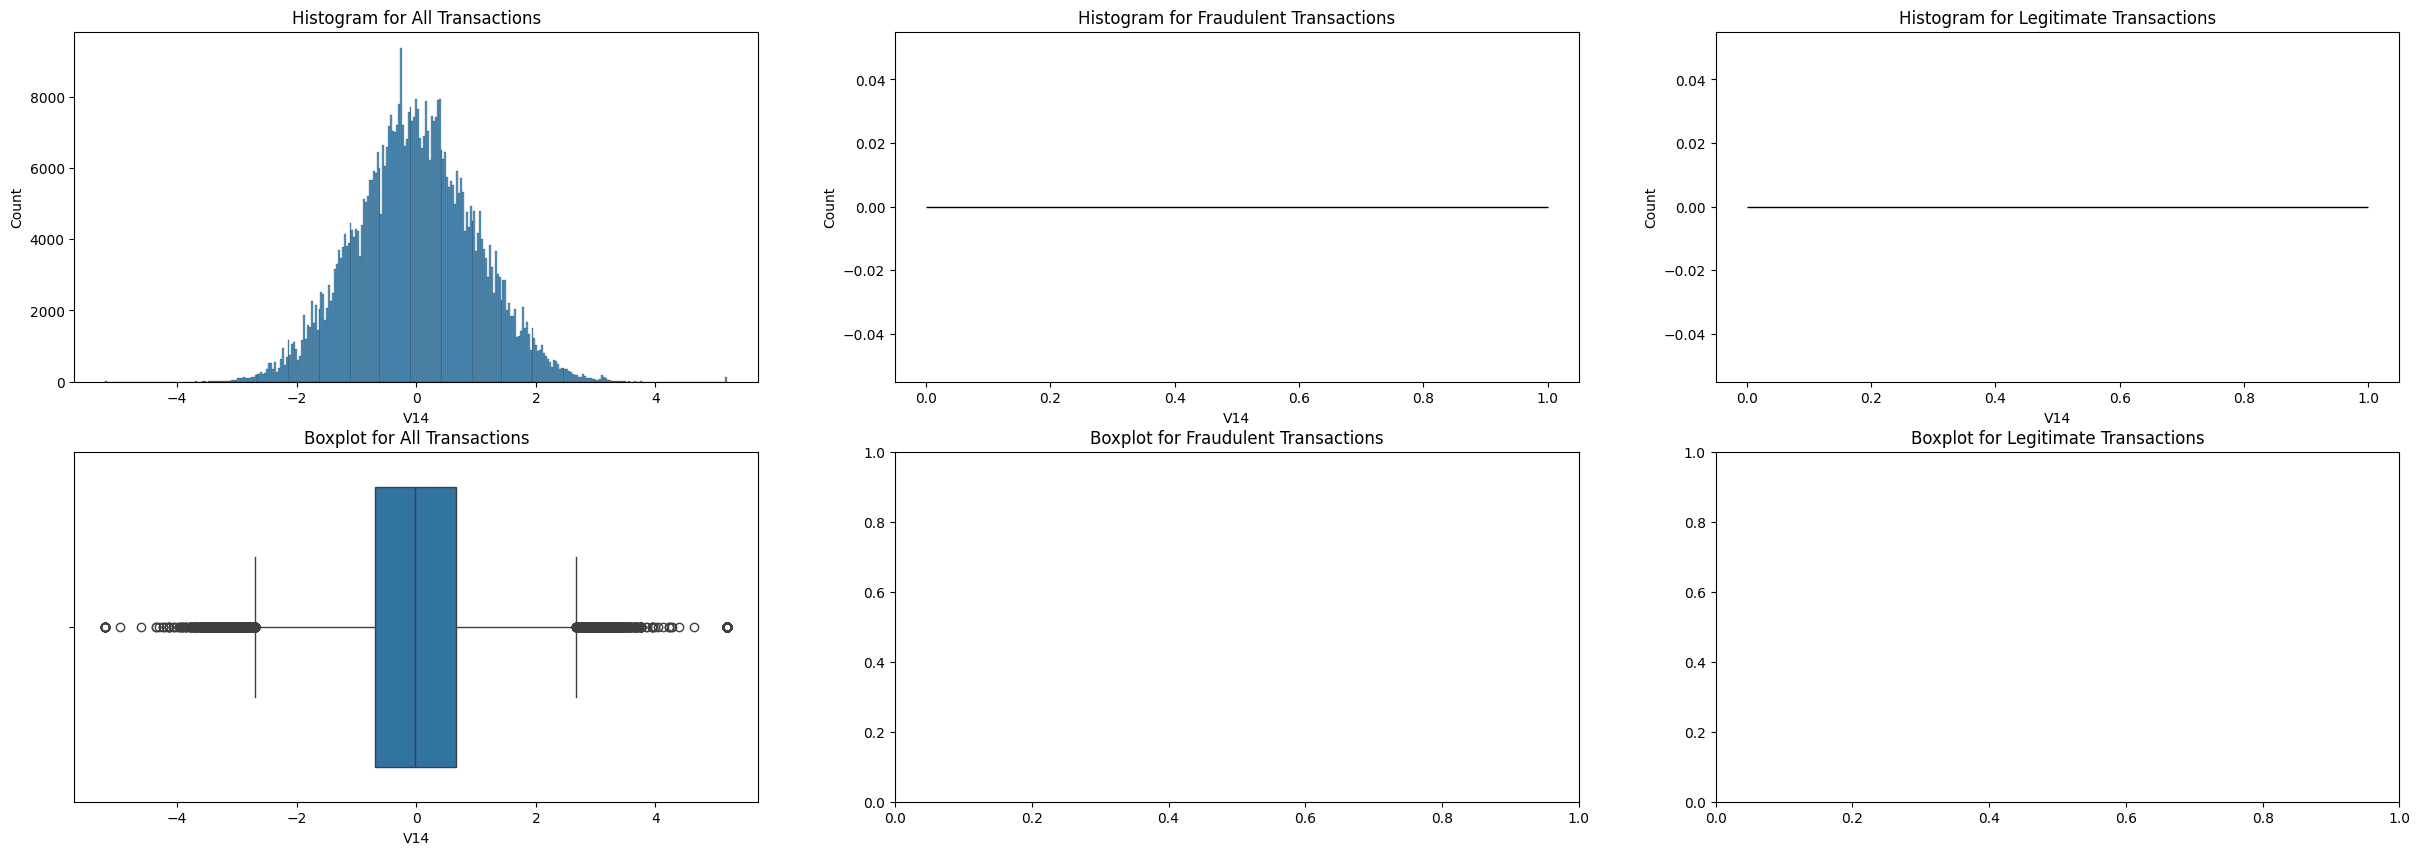

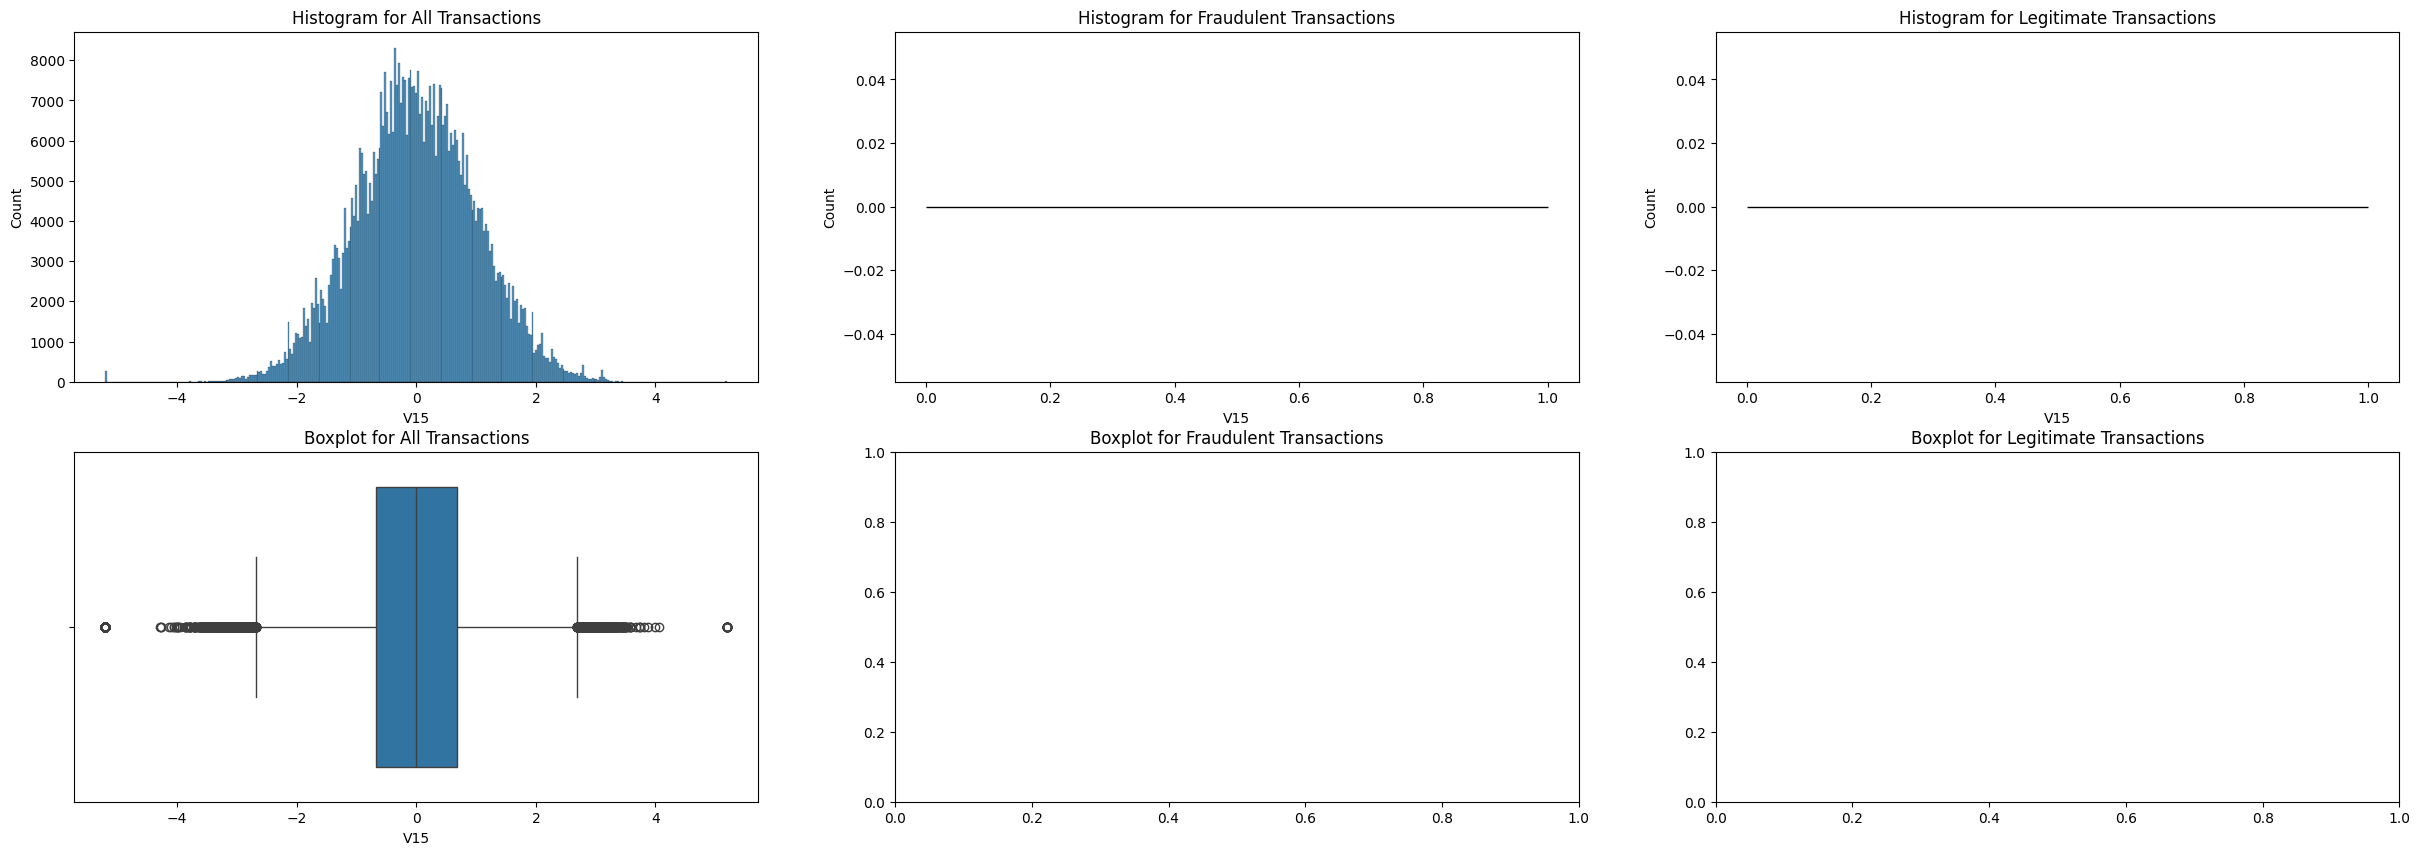

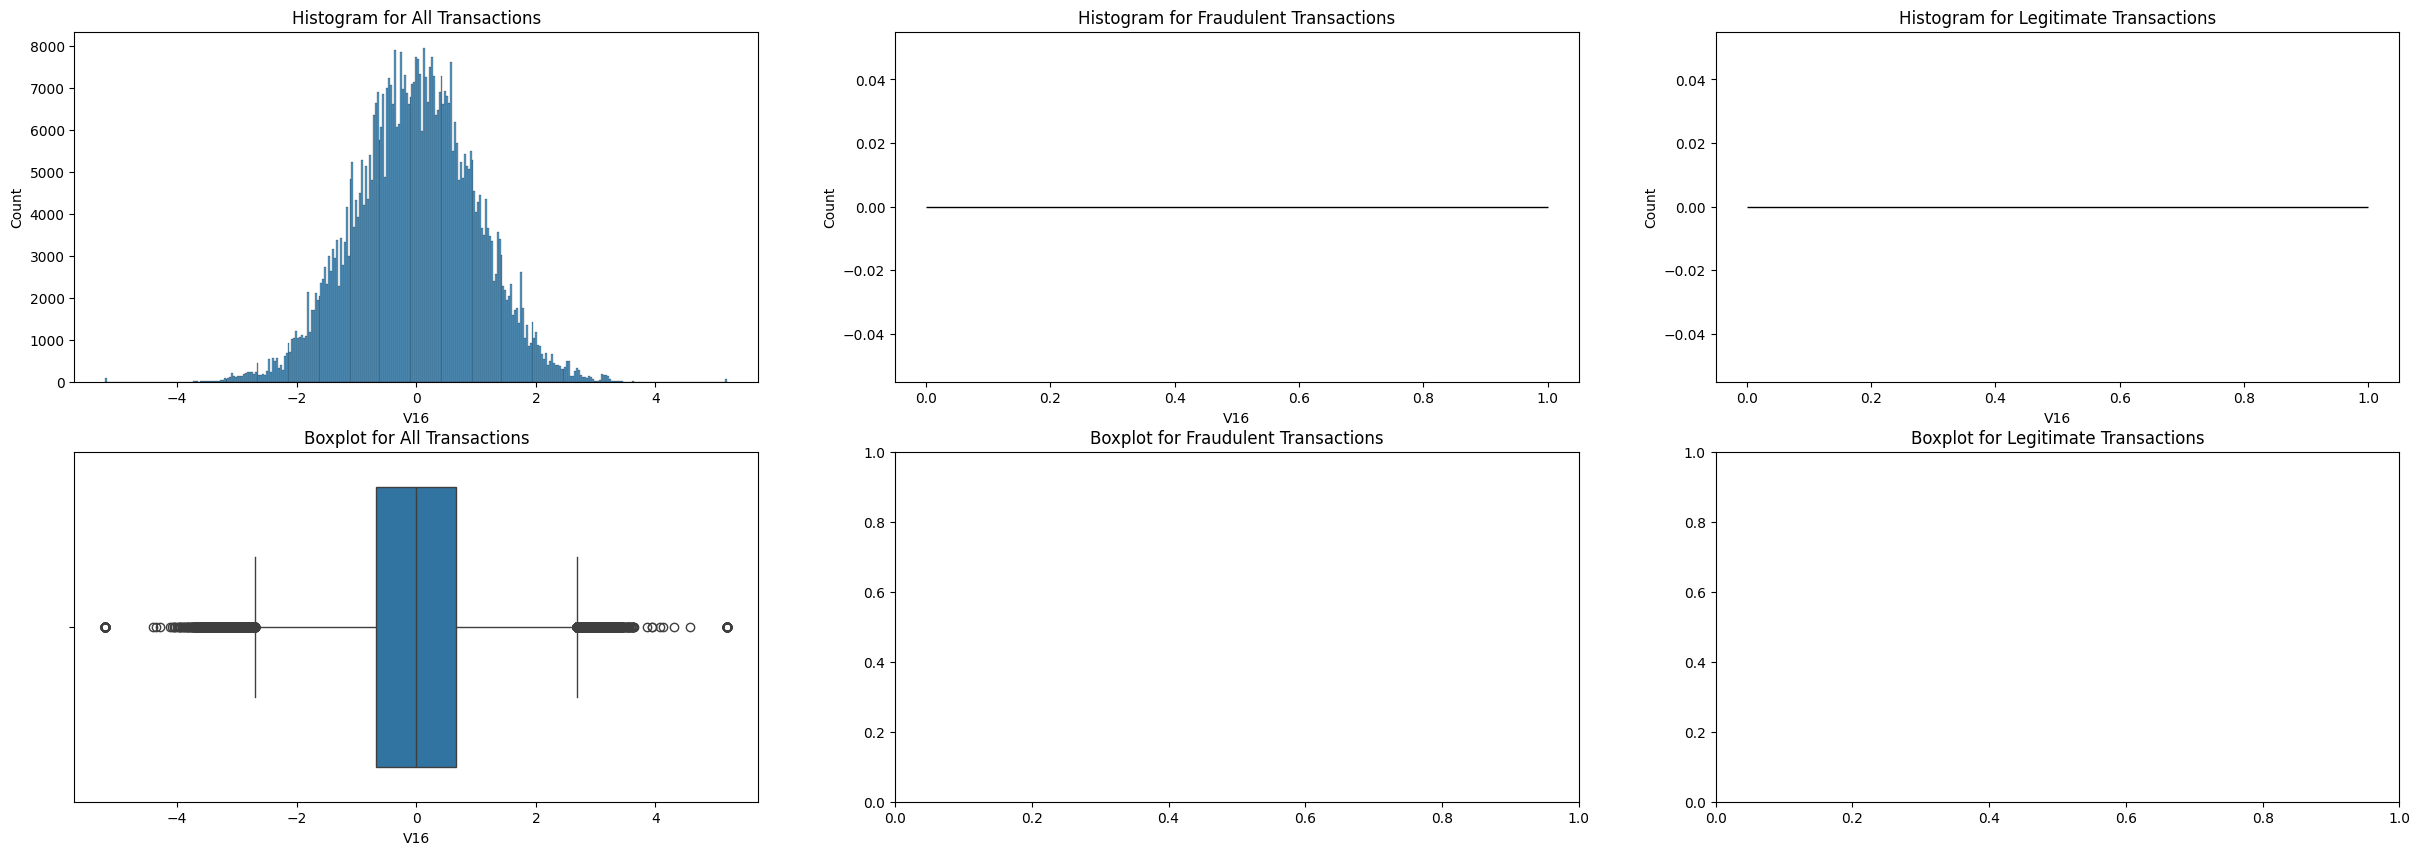

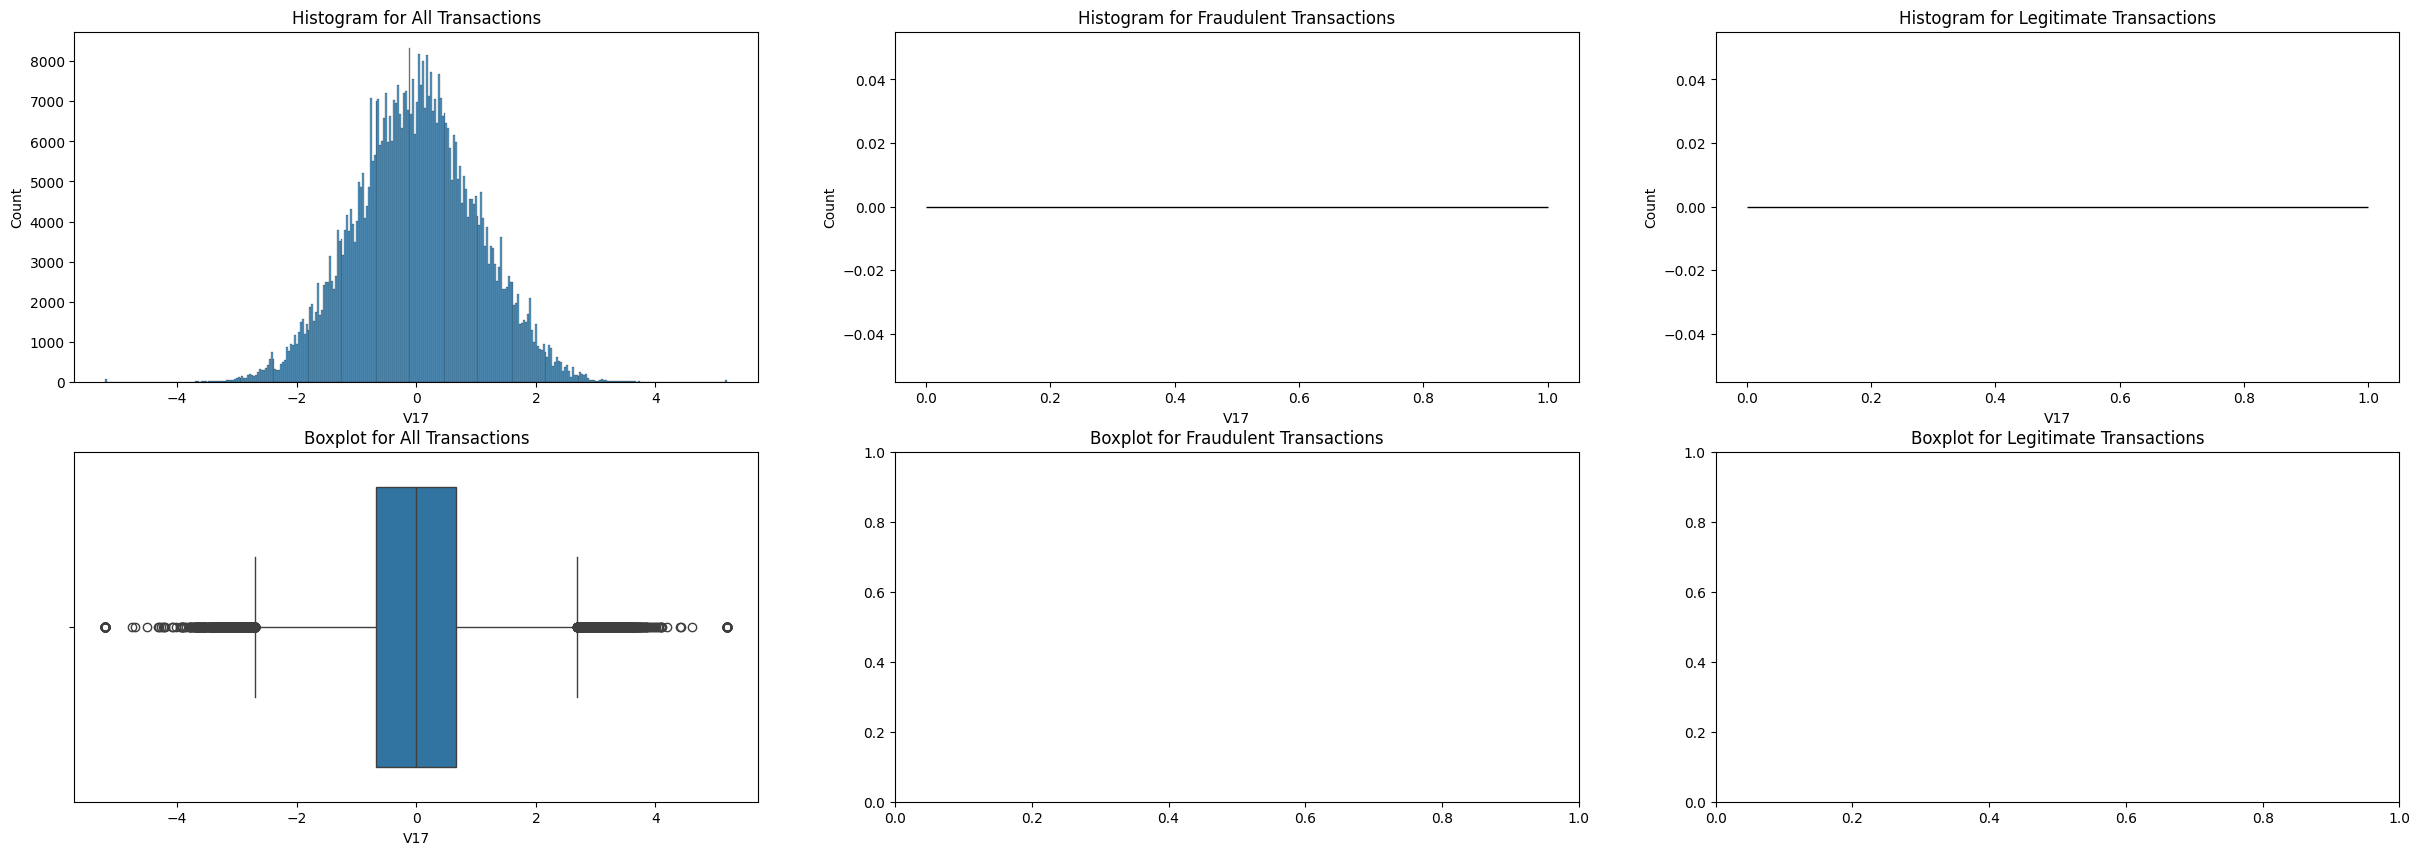

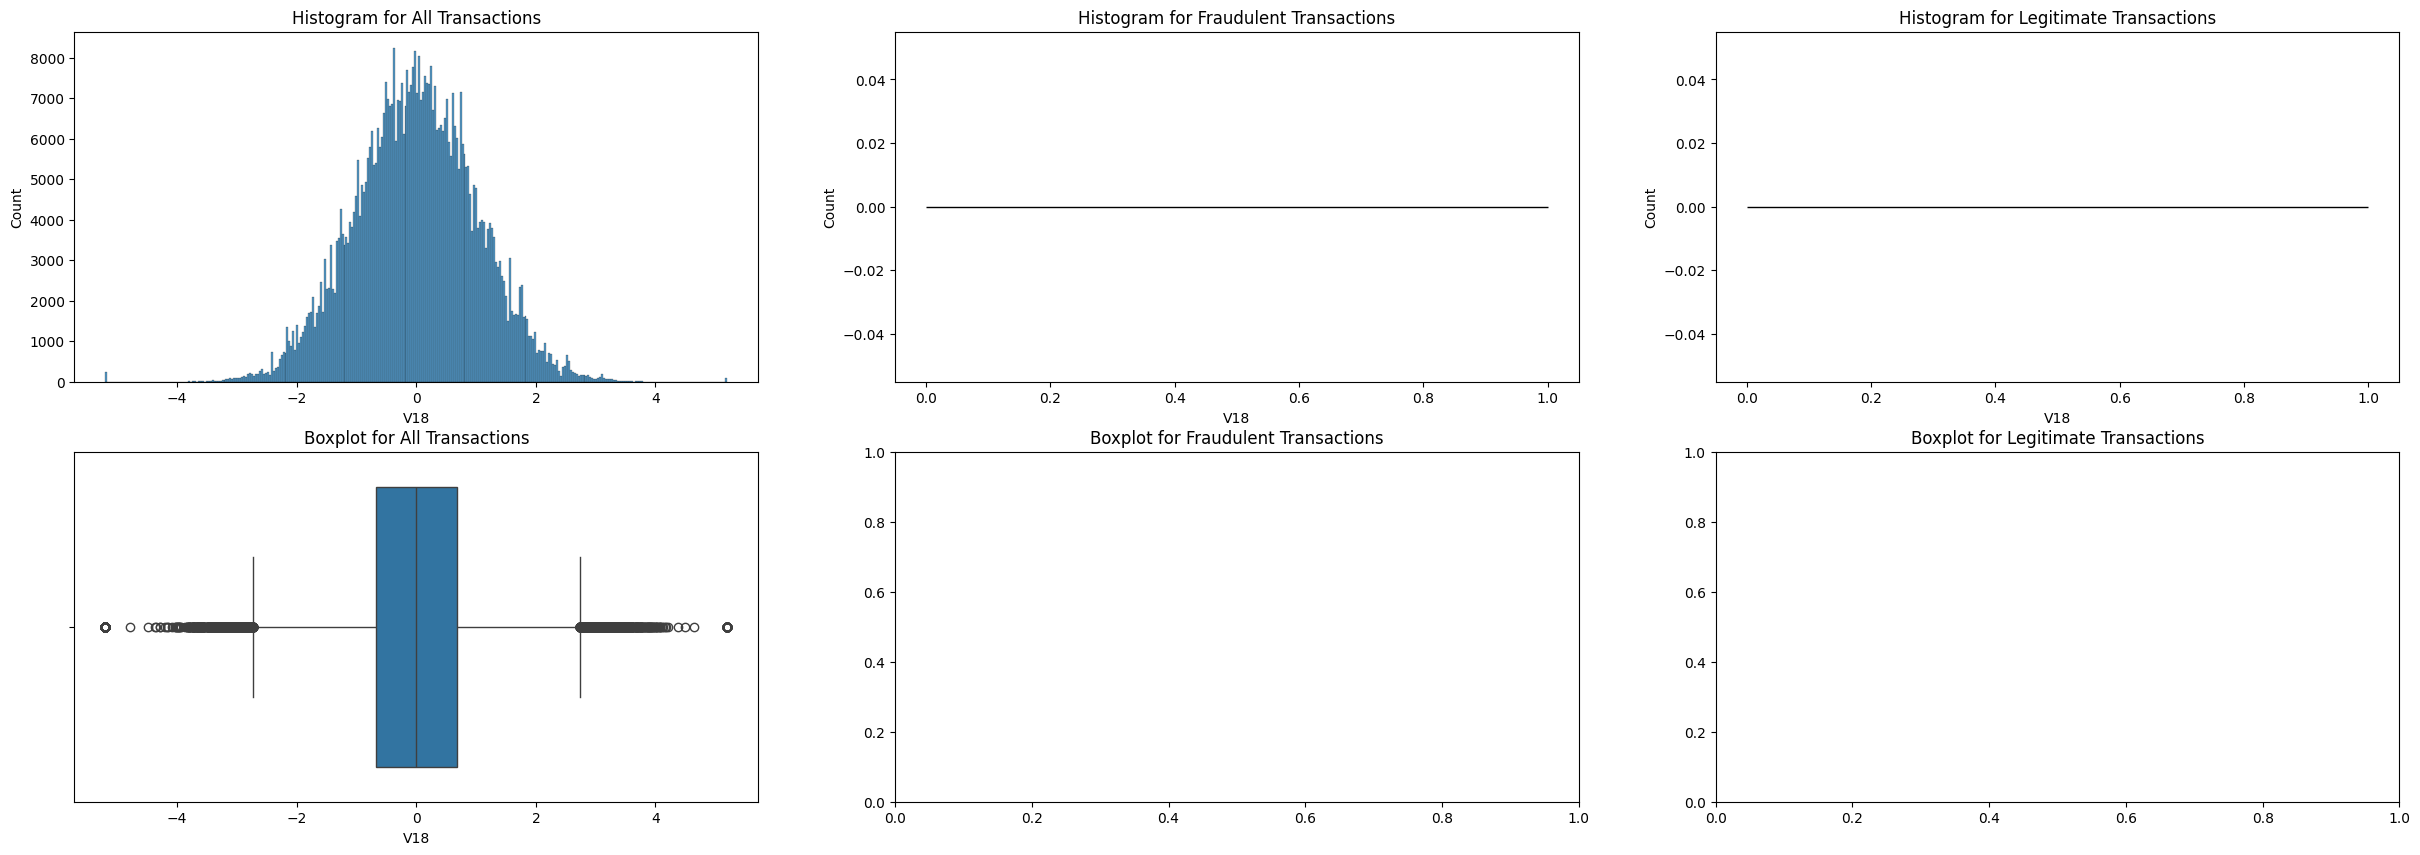

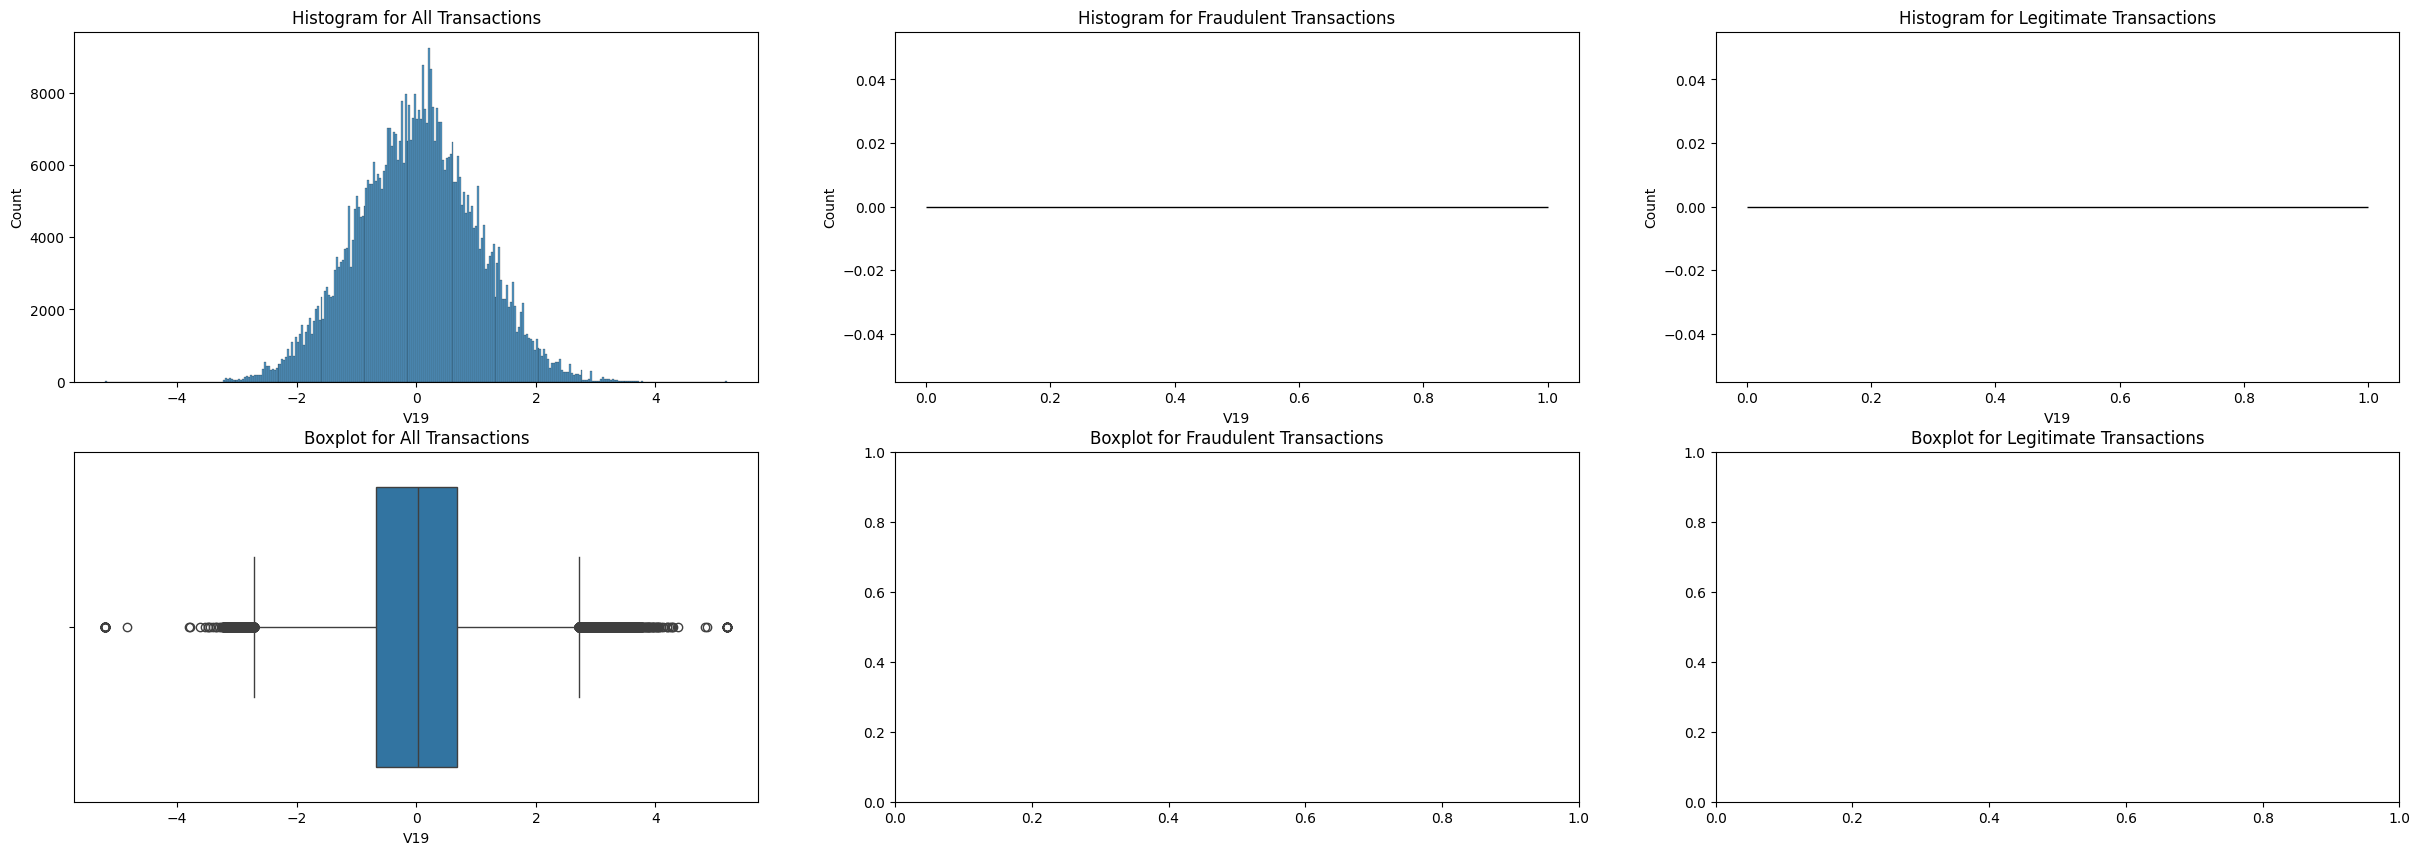

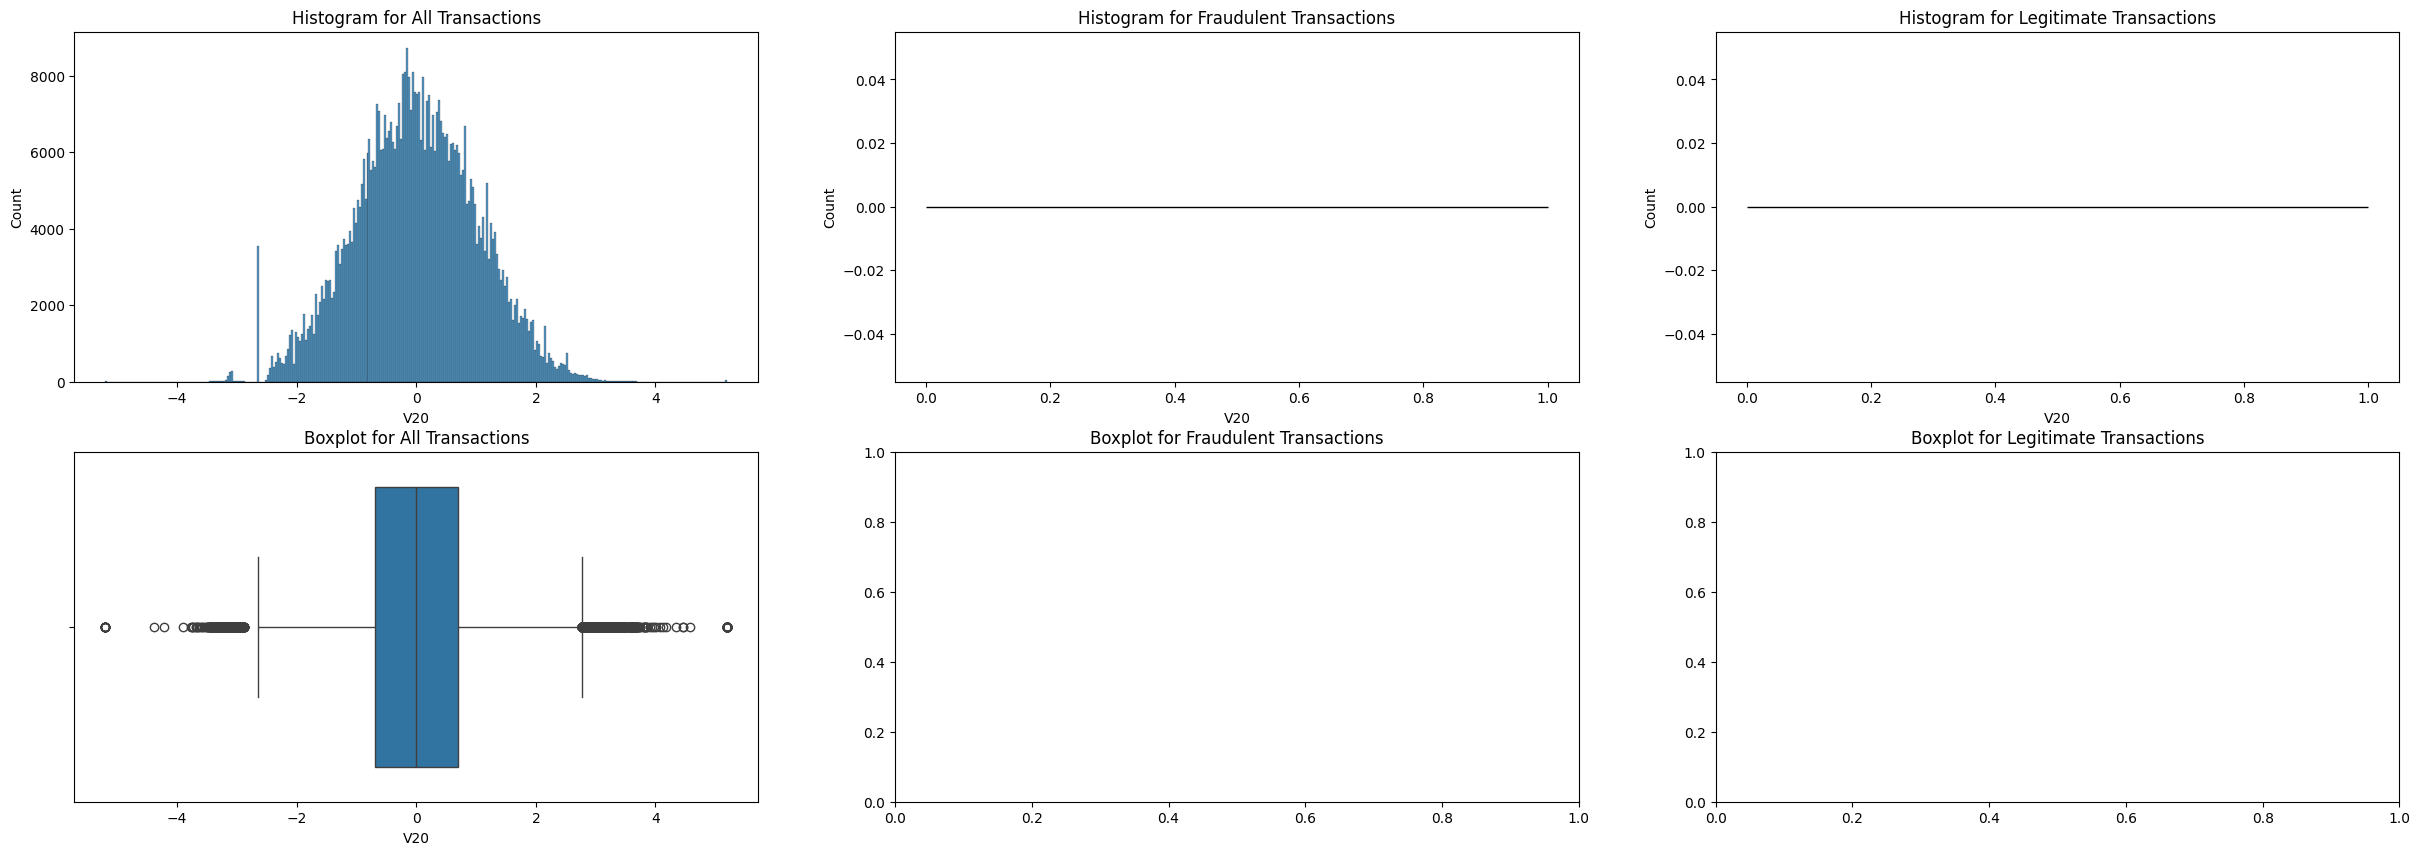

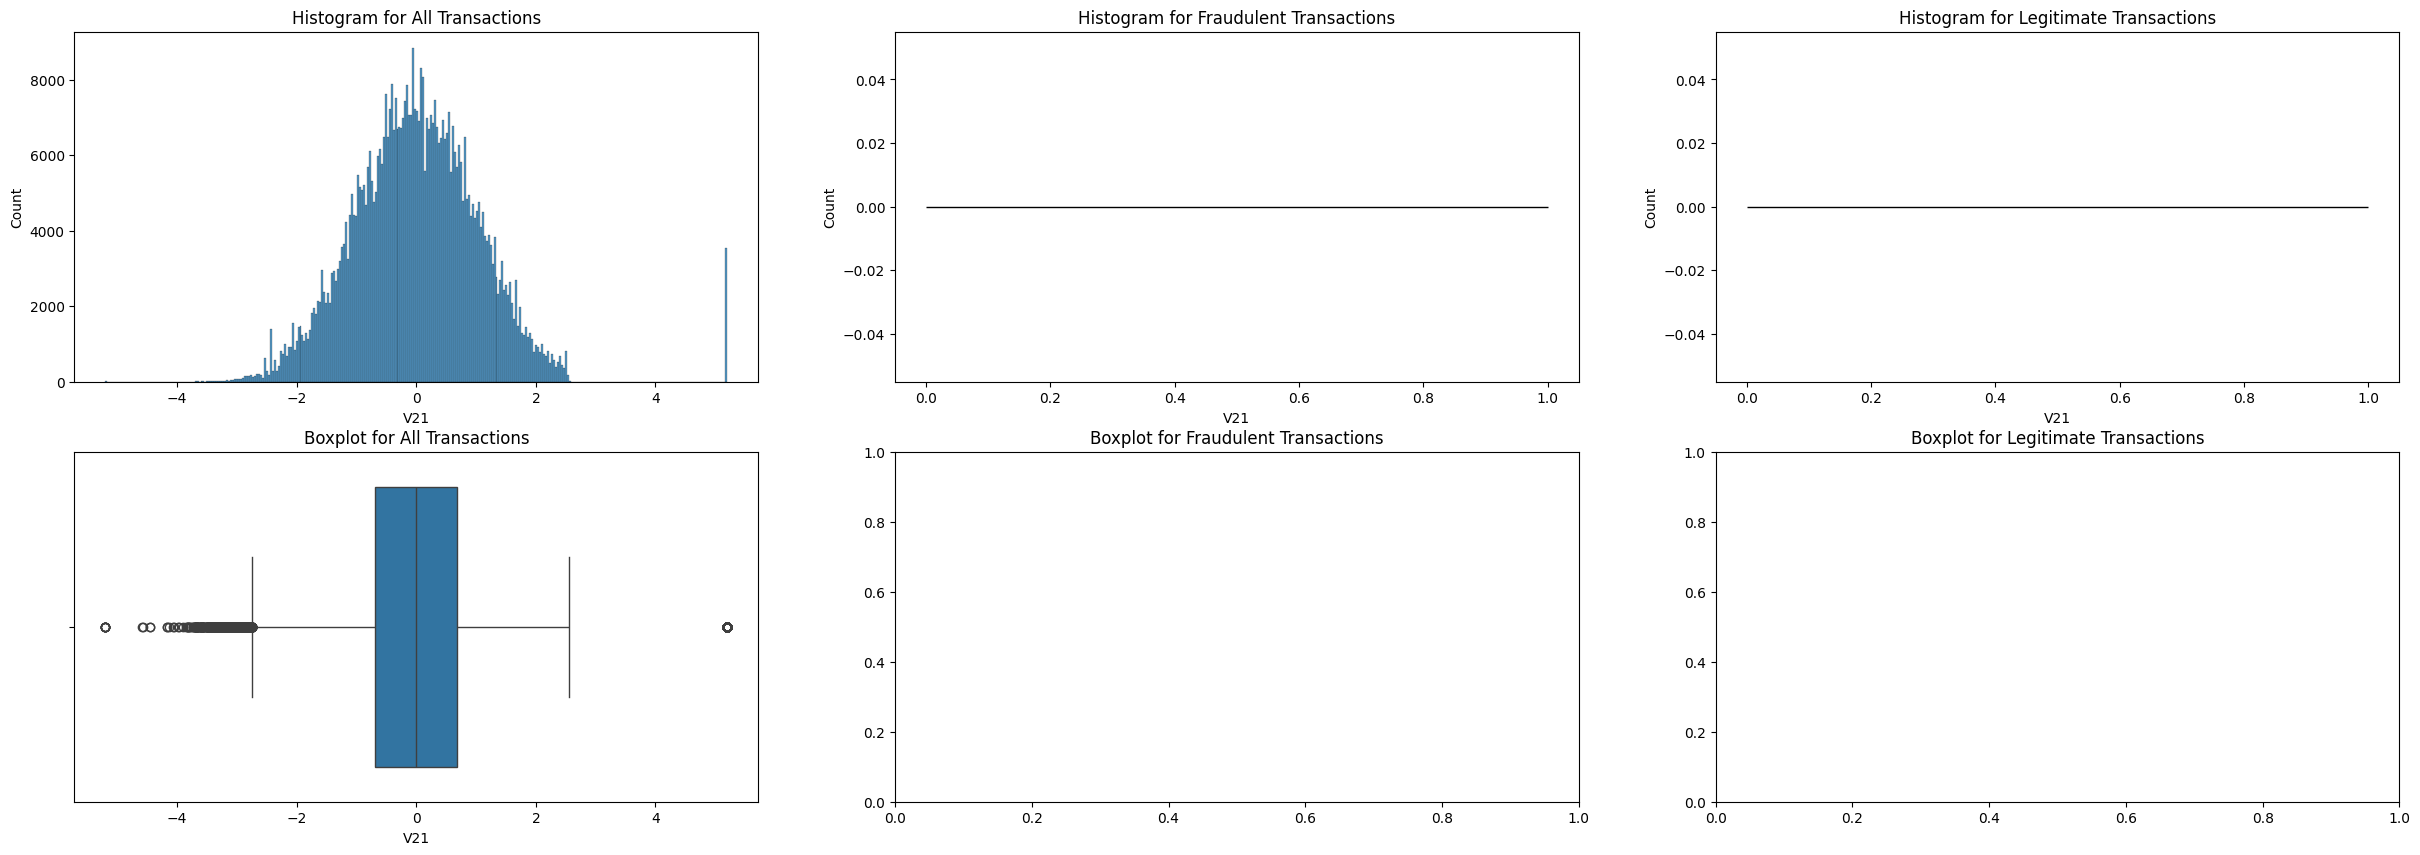

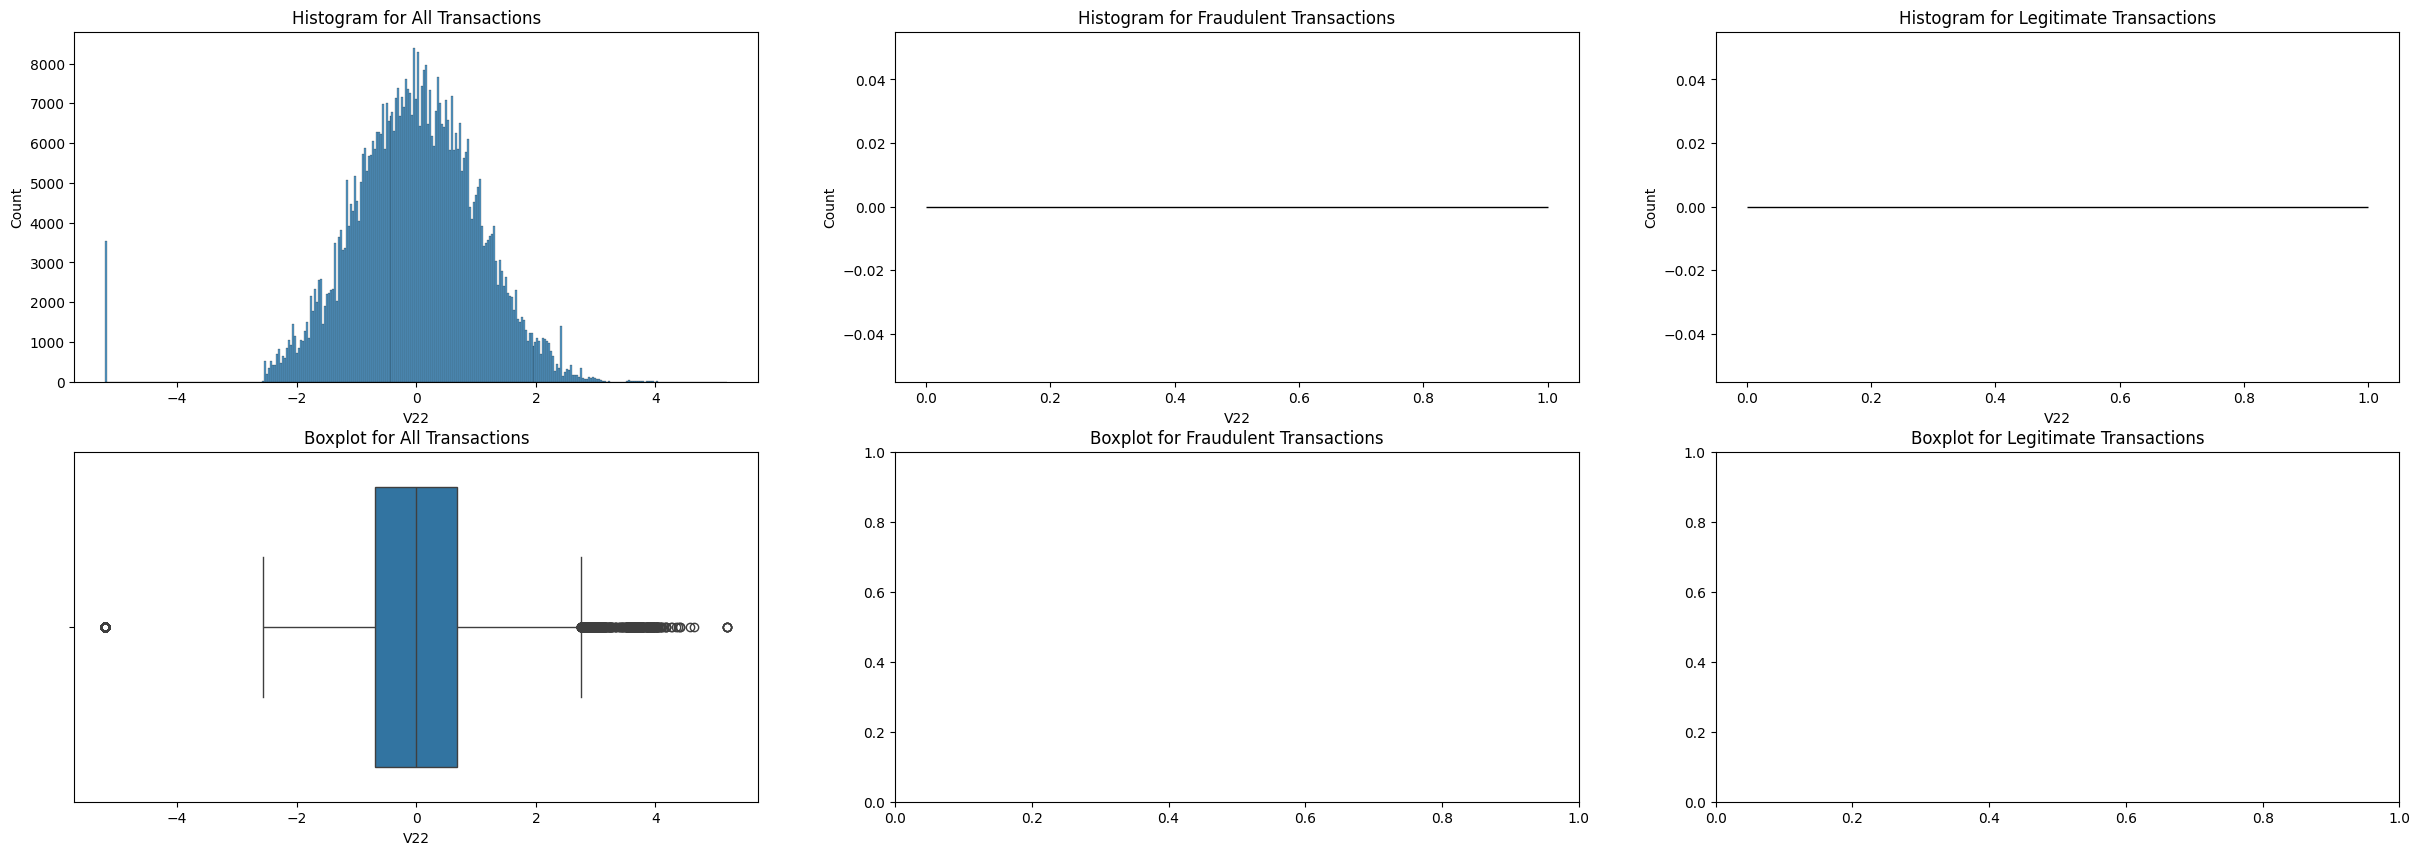

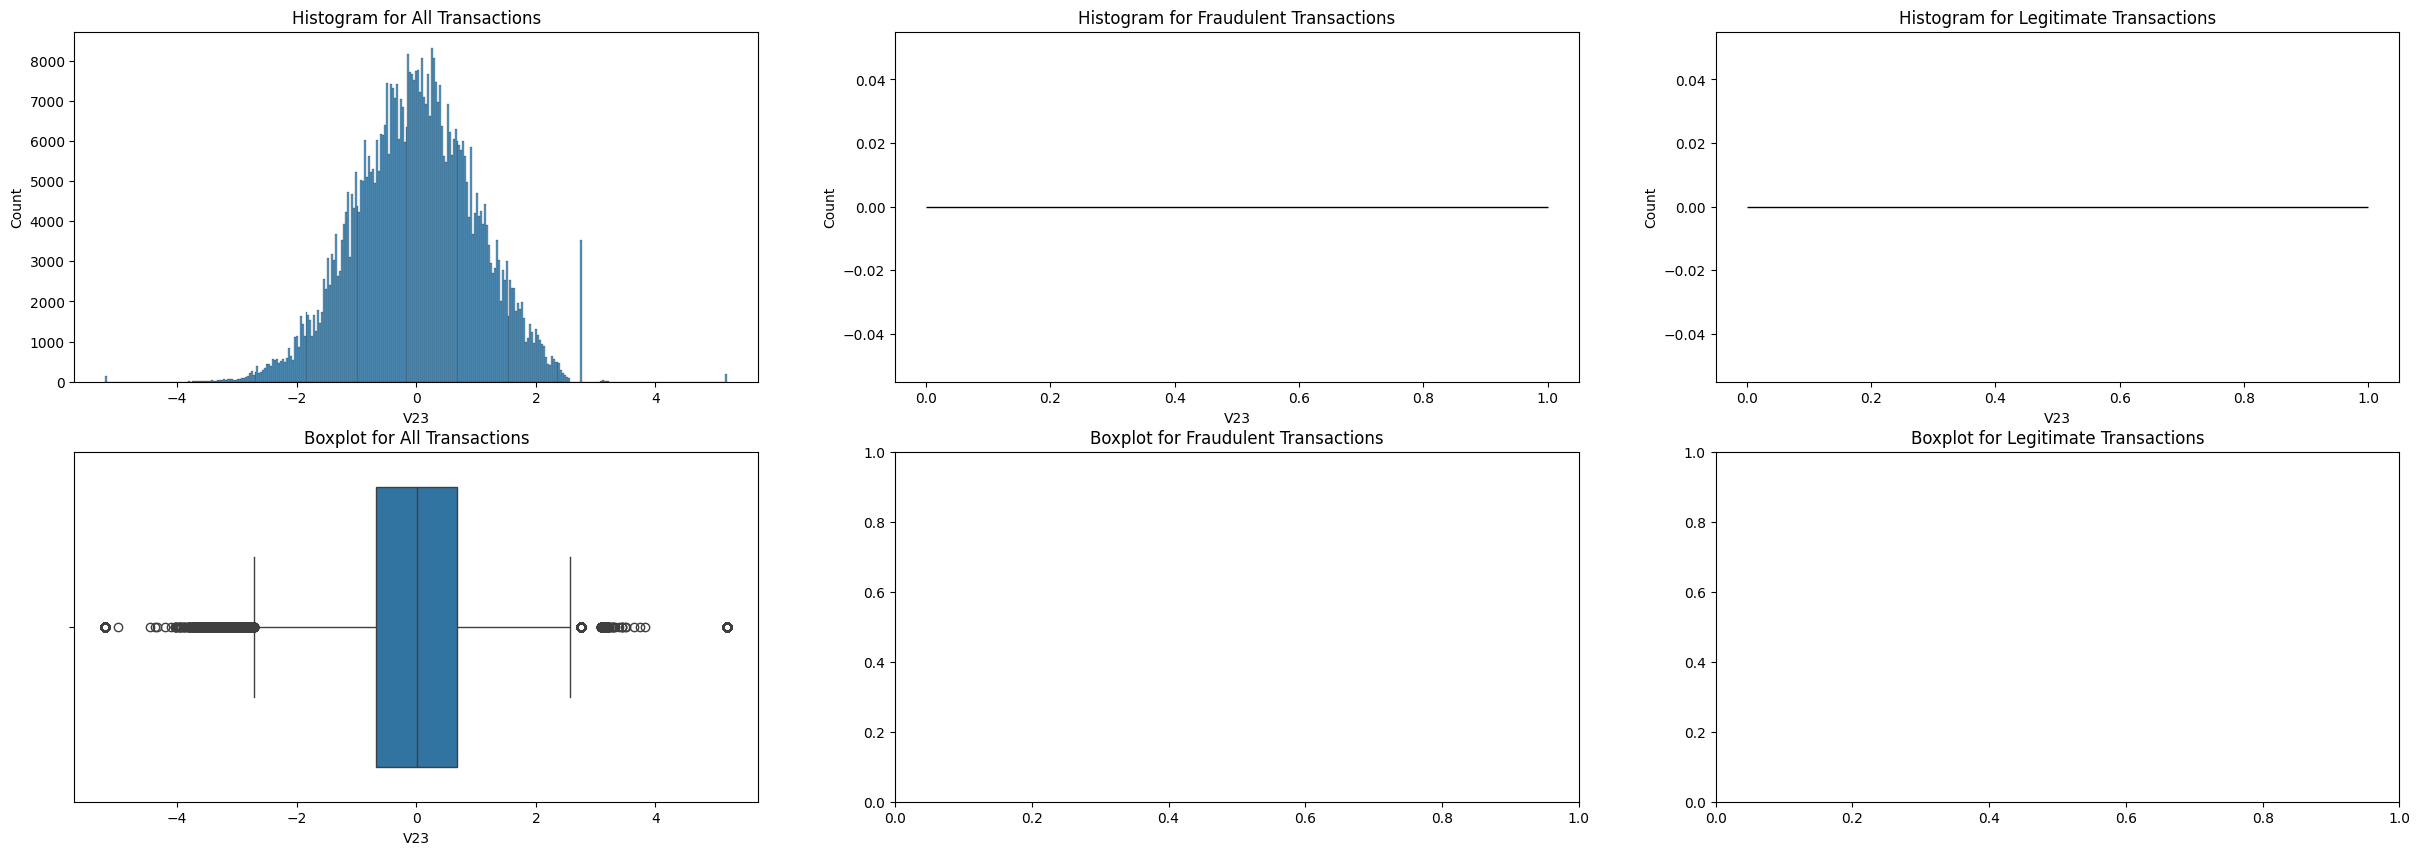

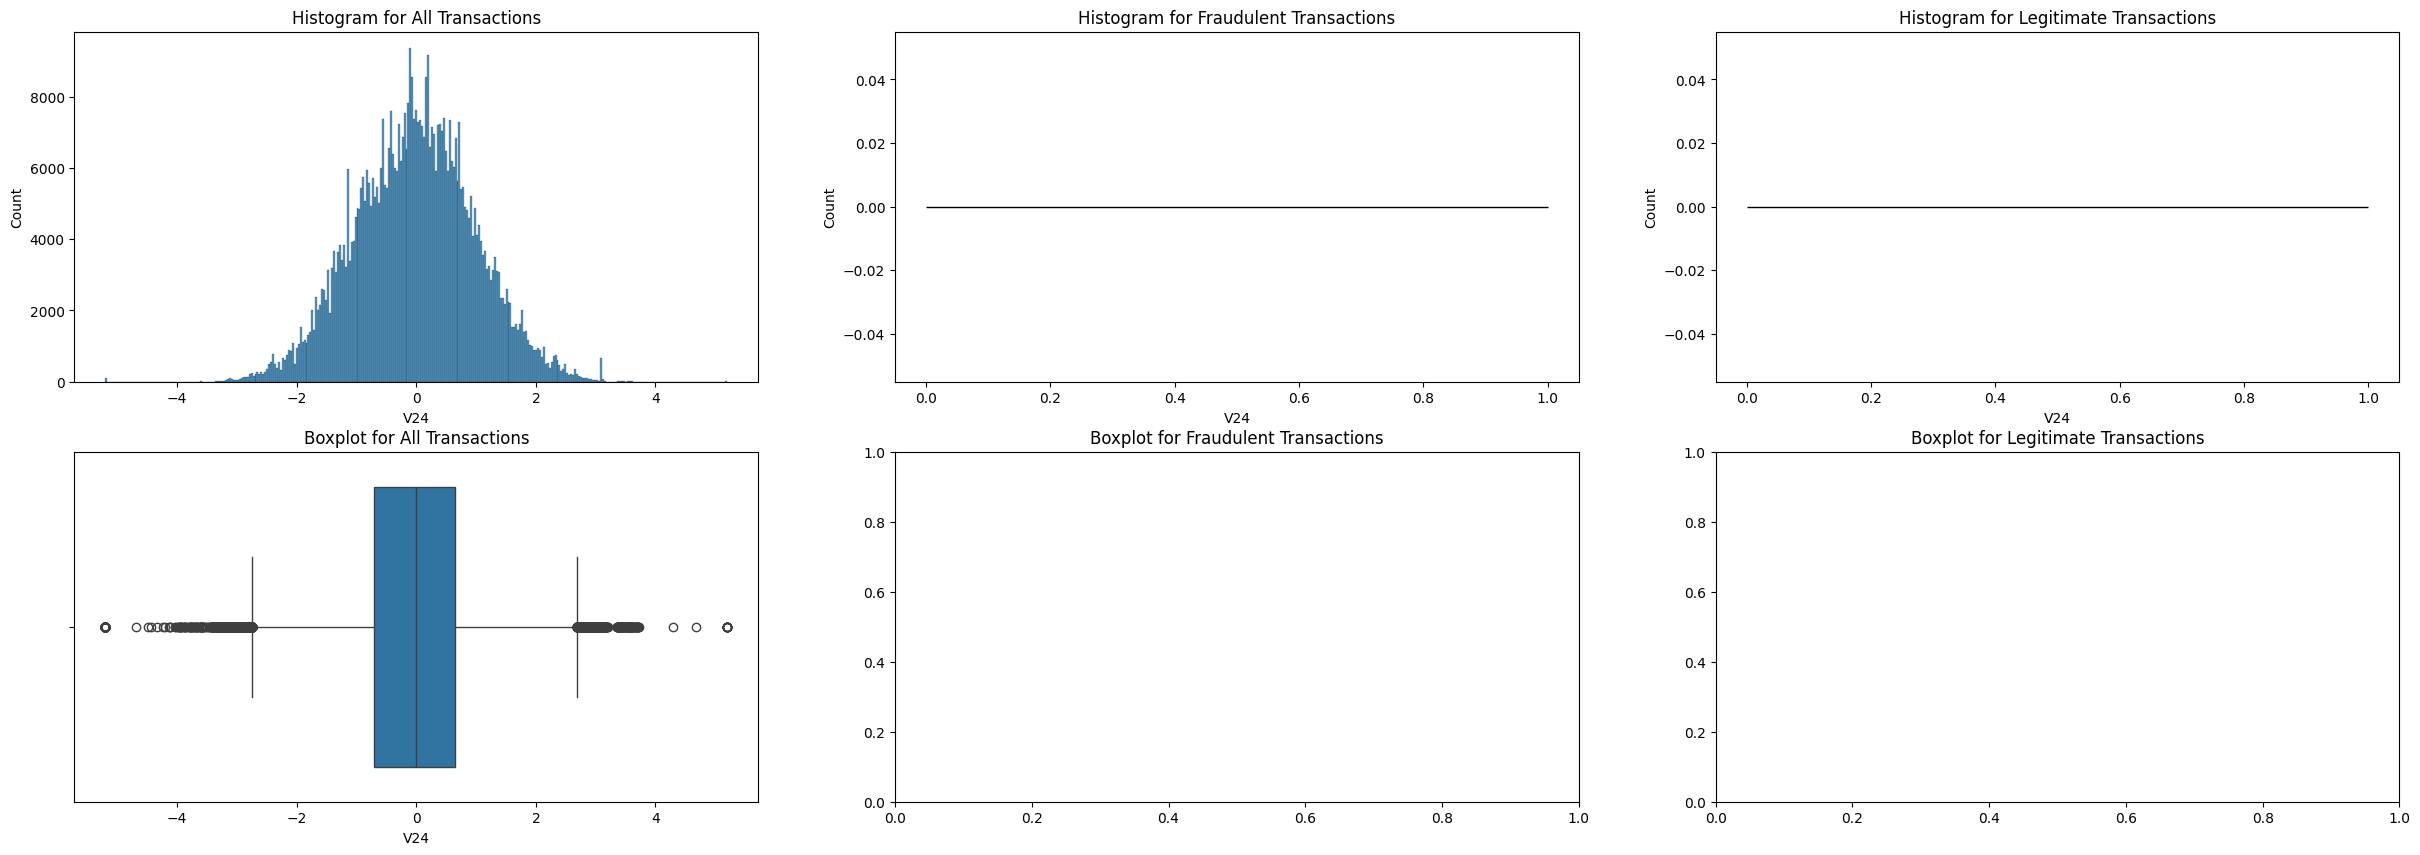

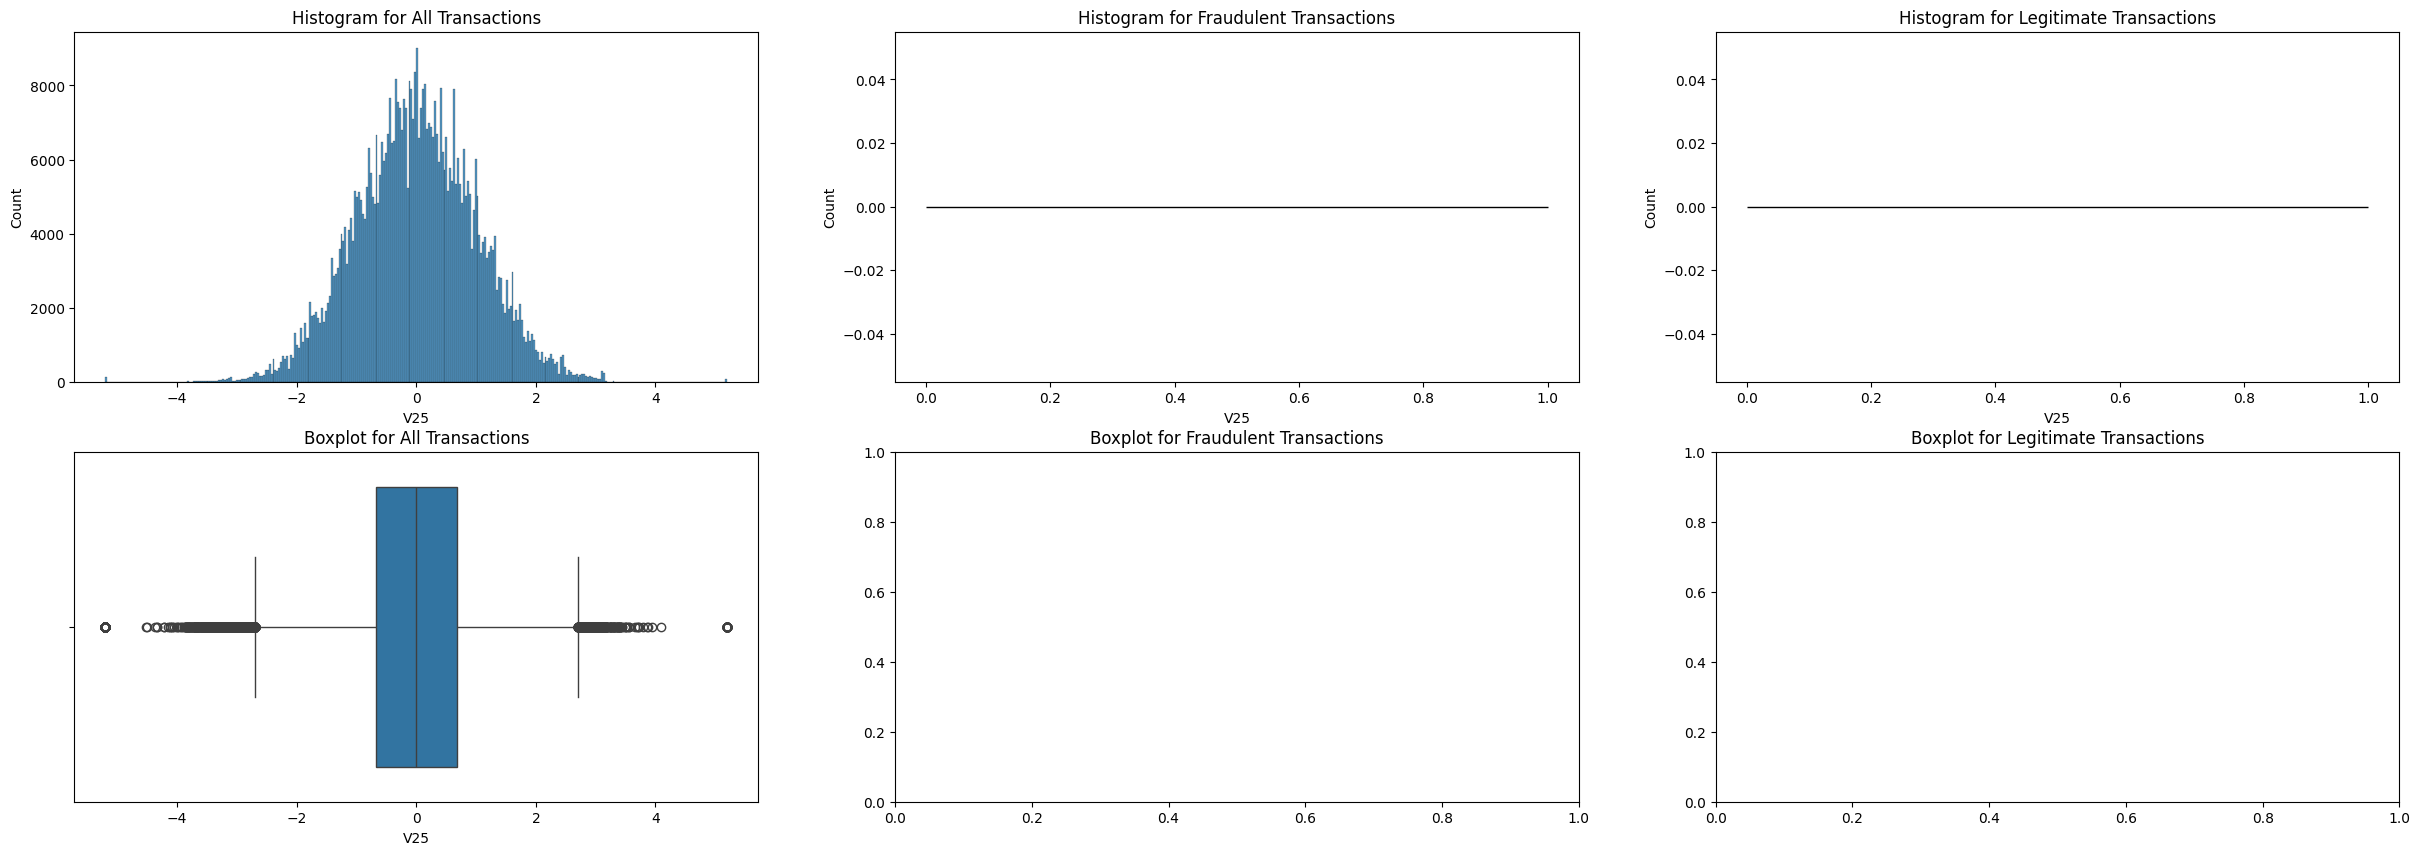

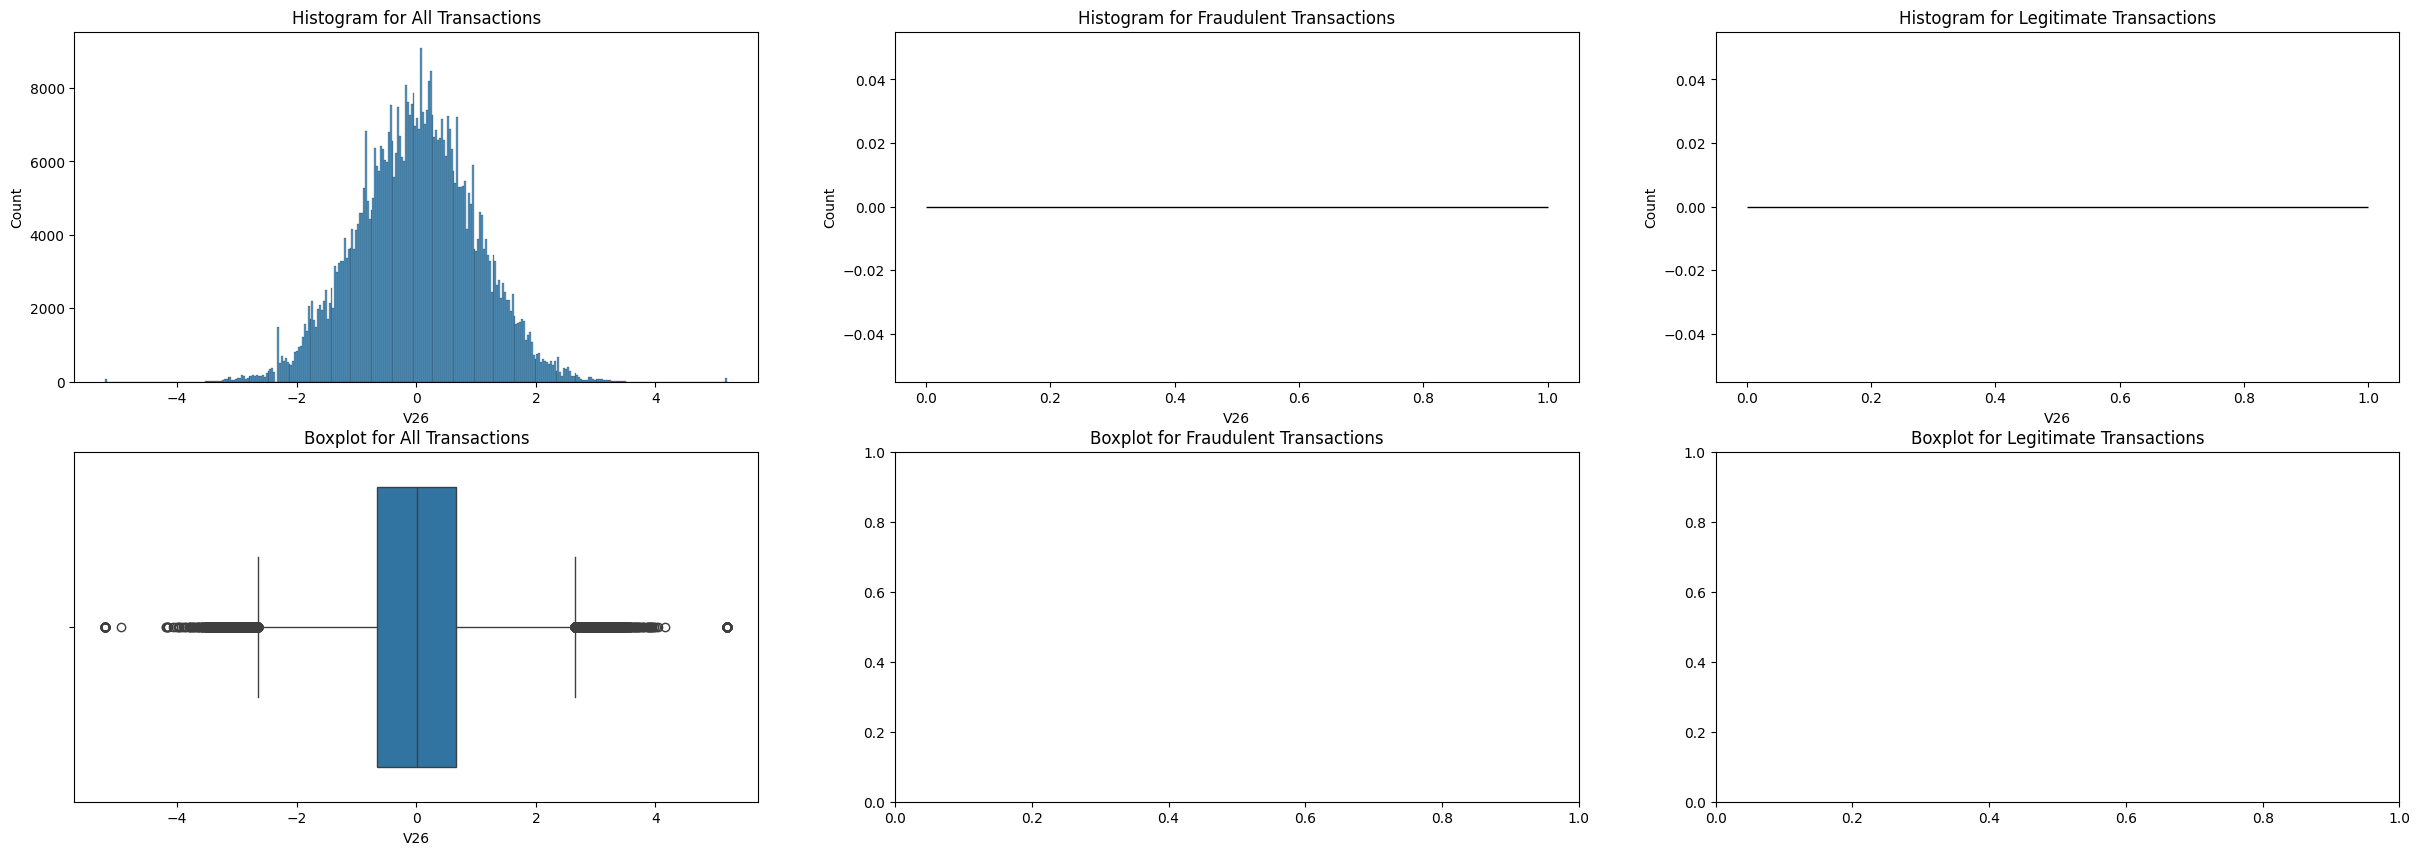

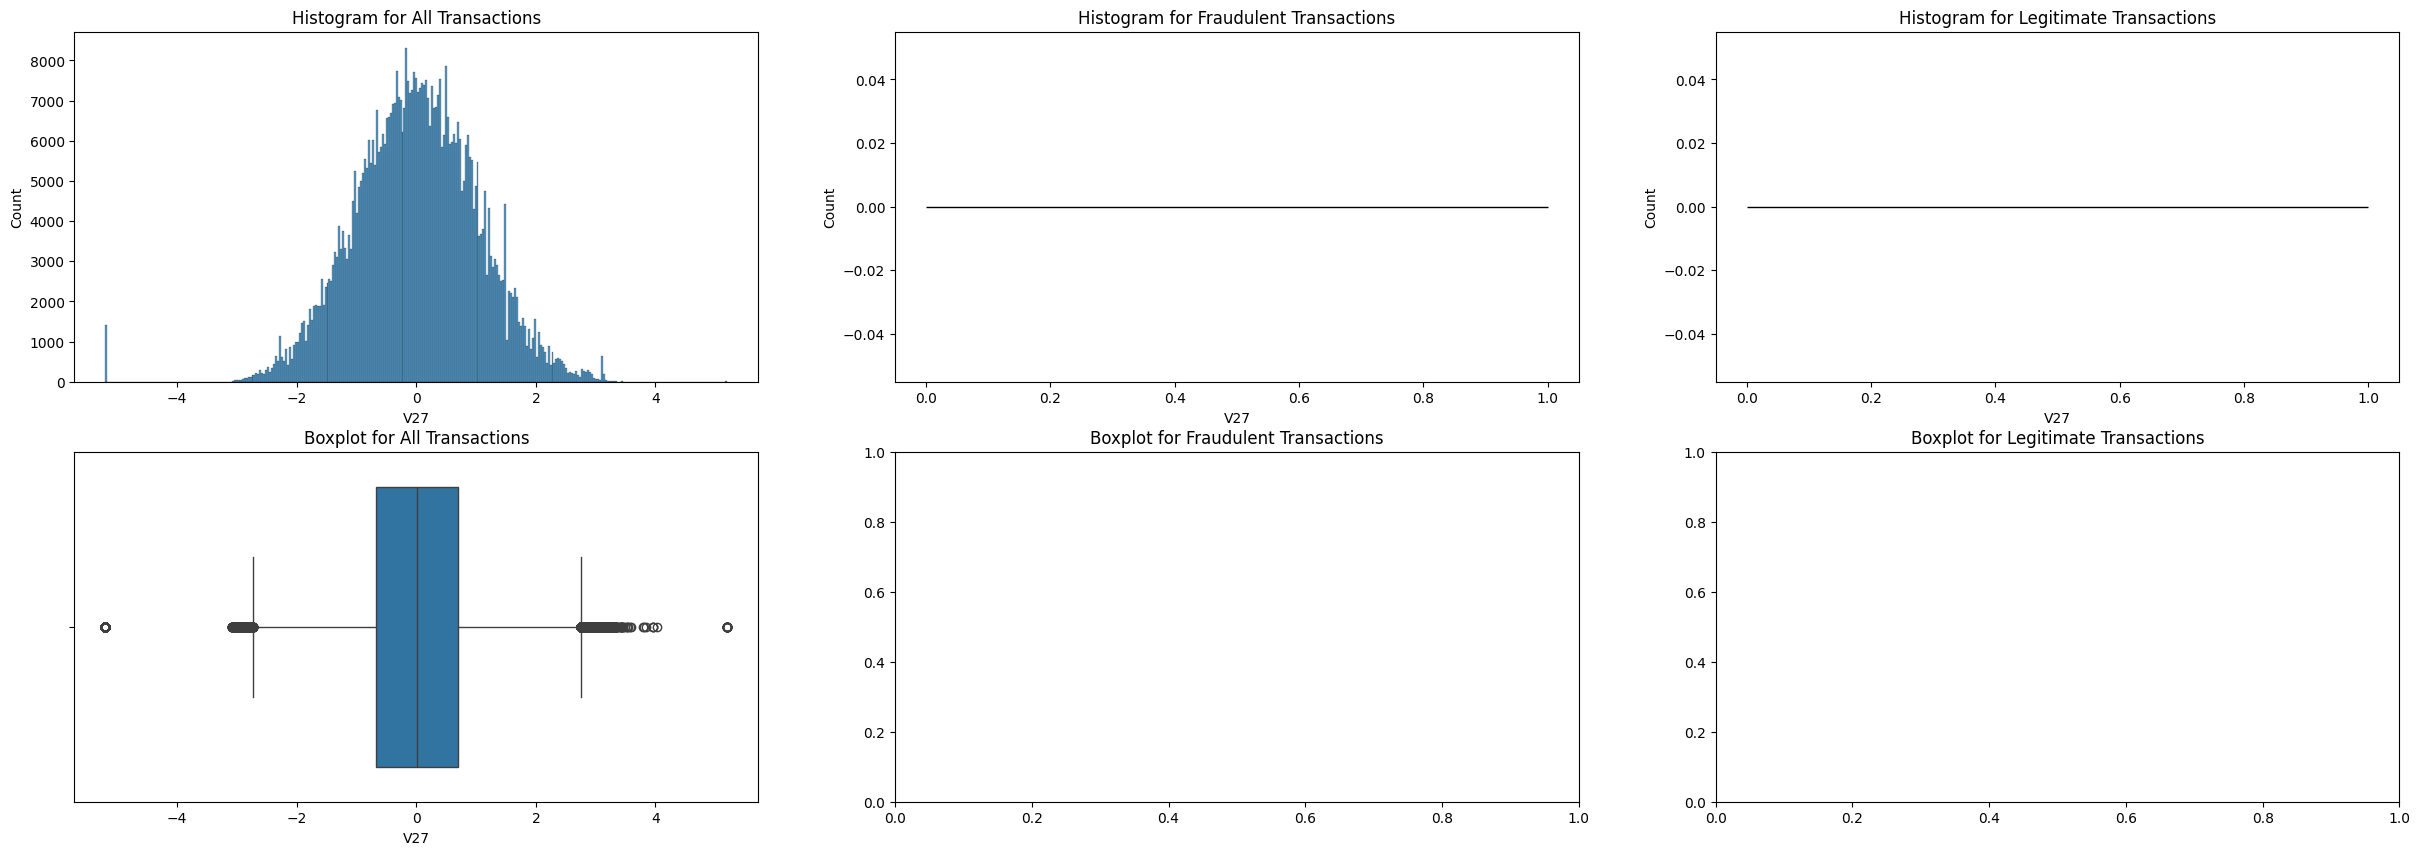

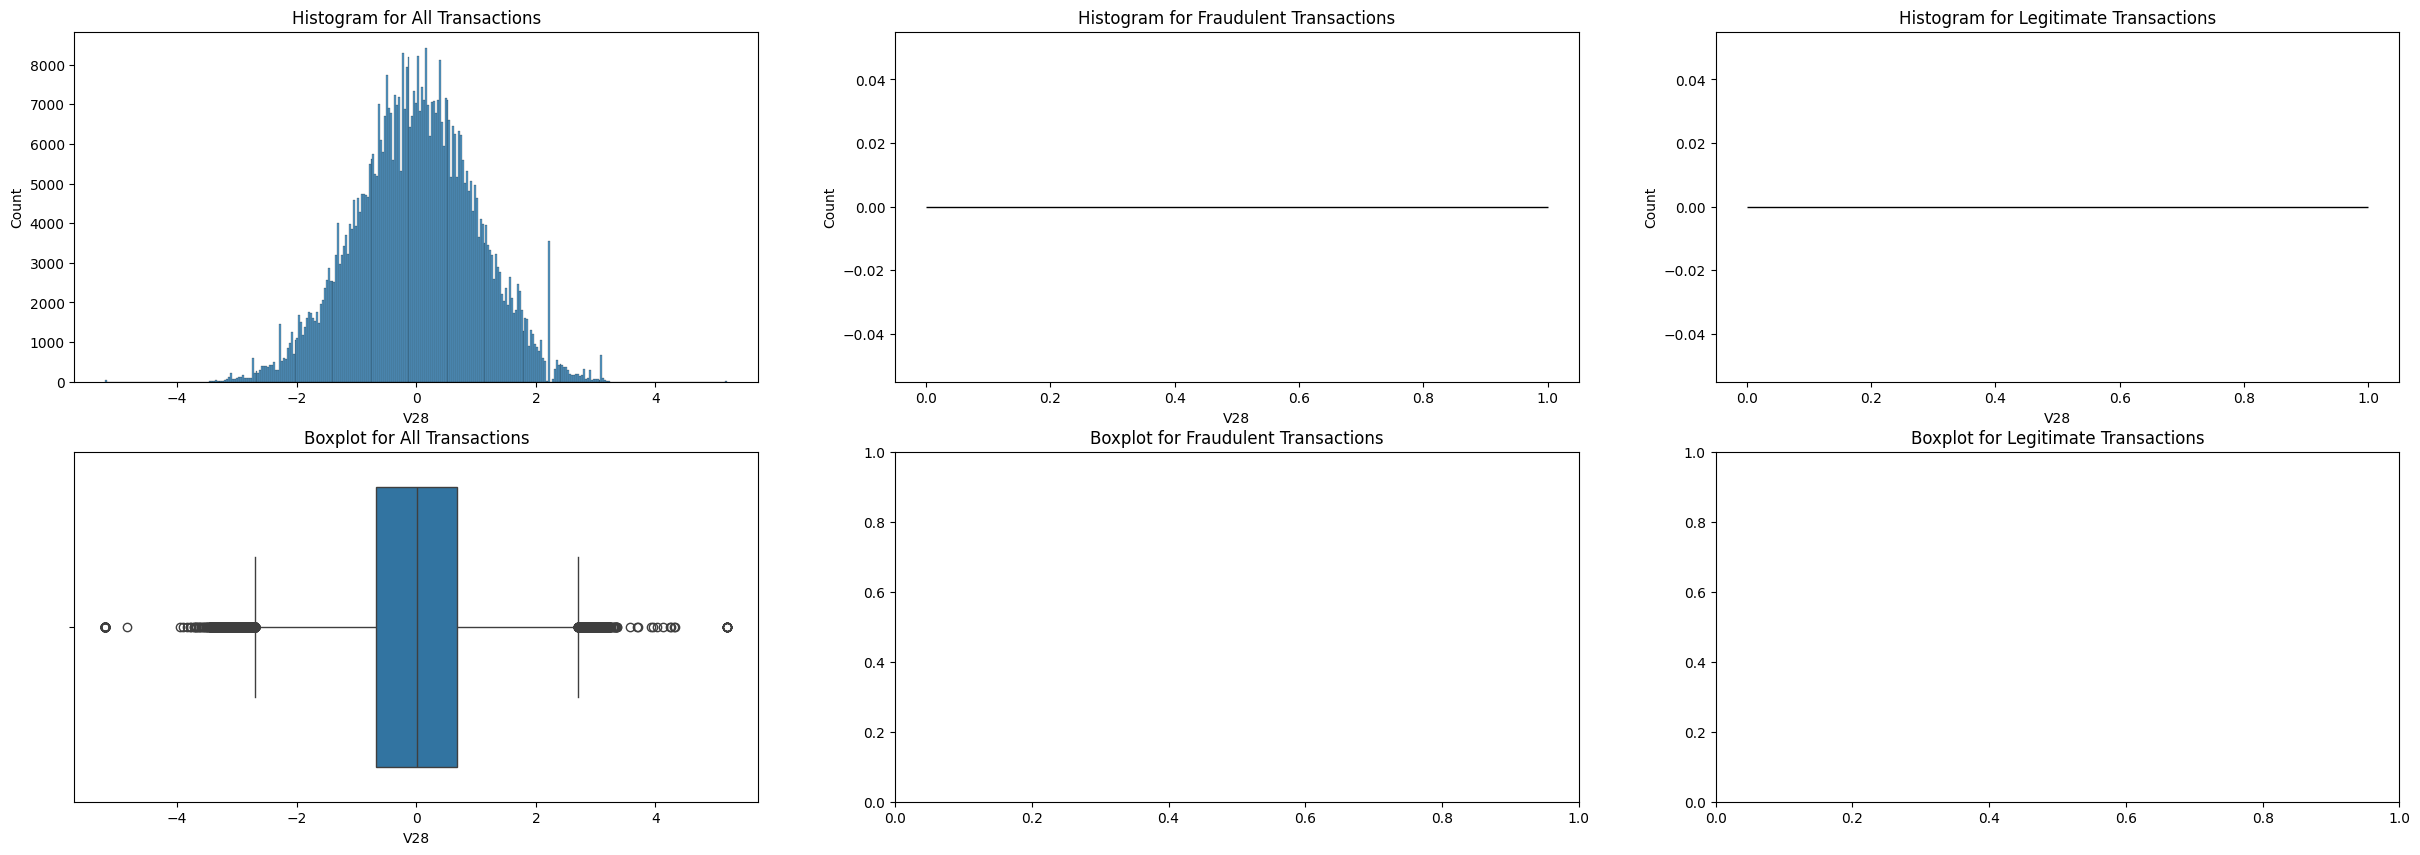

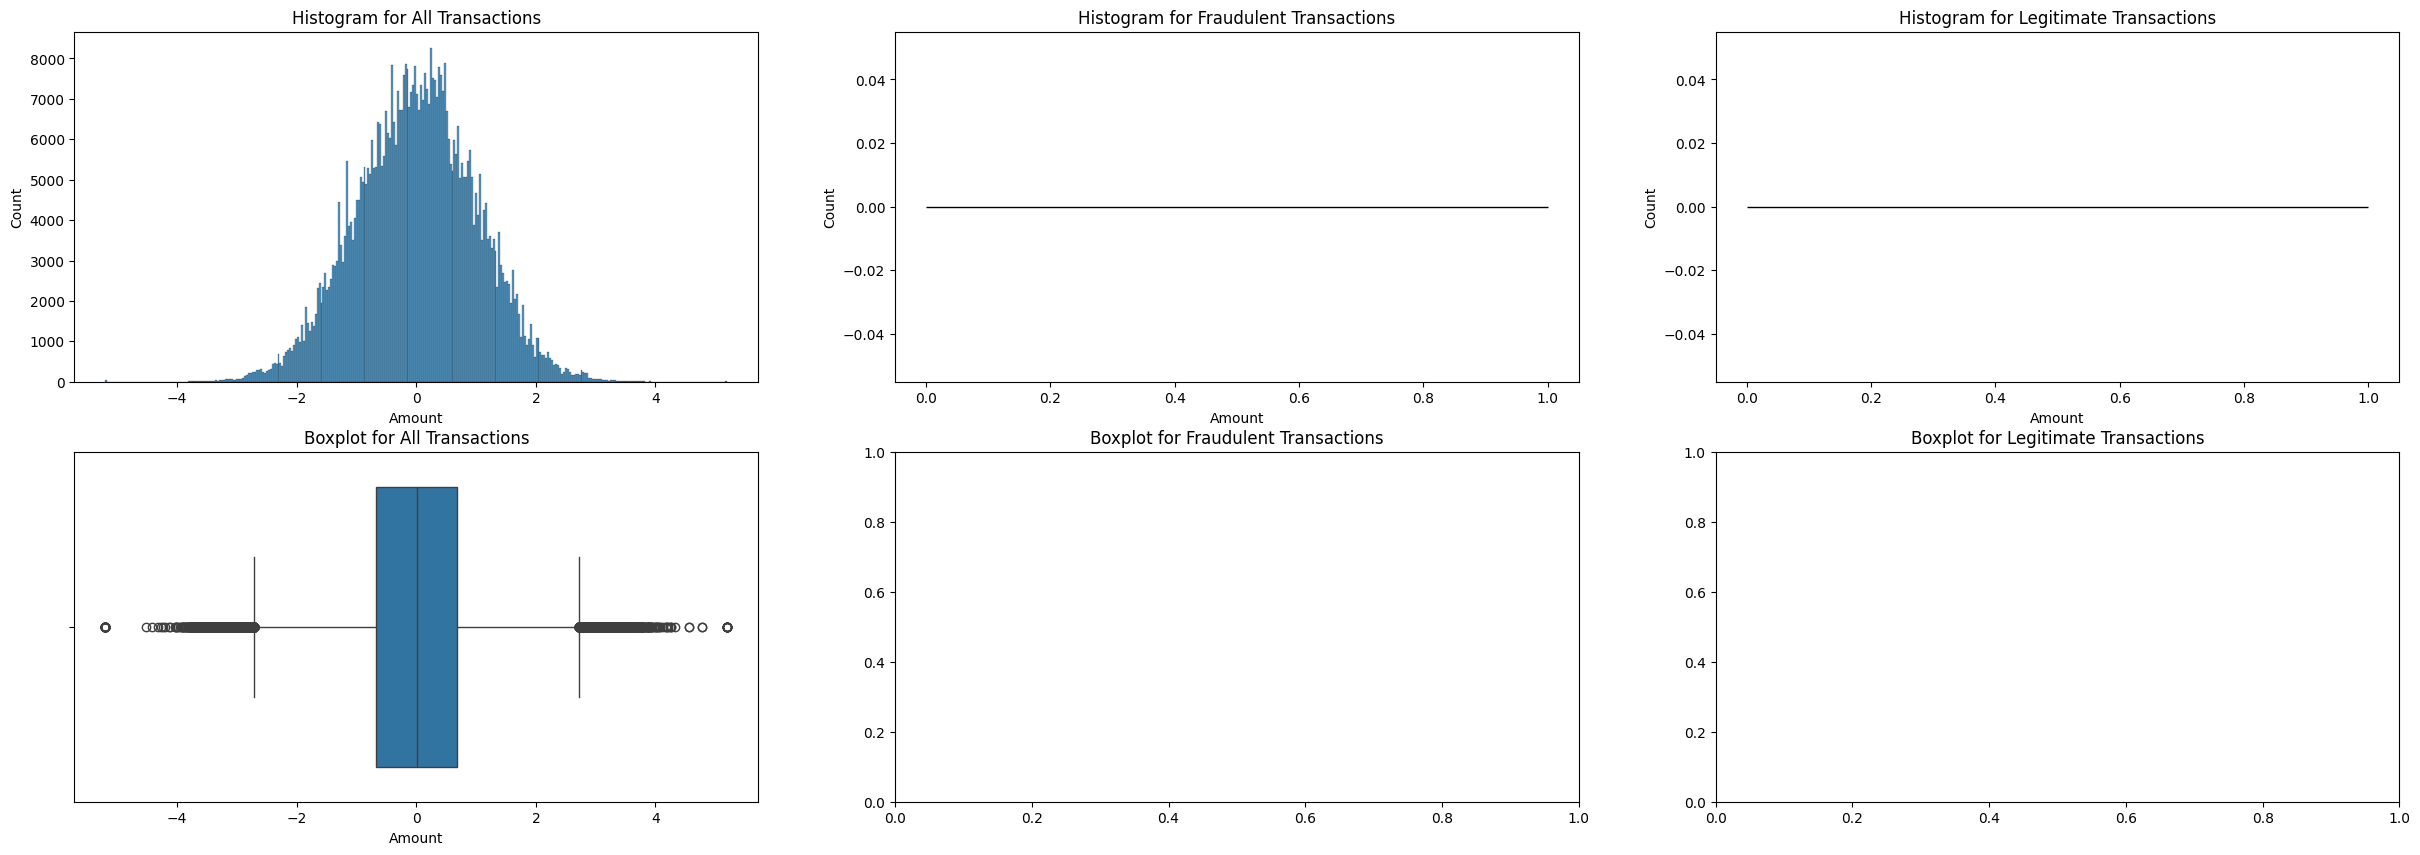

In [11]:
from sklearn.preprocessing import QuantileTransformer

df2 = df.copy()
qt = QuantileTransformer(output_distribution='normal')
df2_matrix = qt.fit_transform(df2)
df2 = pd.DataFrame(df2_matrix, columns=df2.columns)
for col in df2.columns:
    if col != 'Class' and col != 'id':
        plot_hist_and_box(df2, col)

In [12]:
df2.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.294974 -0.621446  2.417386  0.003205  0.111295  0.978305  0.647706   
1  0.916382 -0.378726  0.592063 -0.371117  0.381223  0.555602  0.337012   
2 -0.294485 -1.473997  1.718865 -0.410412 -0.001303  1.590921  1.183044   
3 -0.114641 -0.704624  1.743082 -1.156013  0.332865  1.413703  0.644812   
4 -0.203848 -0.041201  1.506063 -0.396358  0.063793  0.708068  0.984326   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0 -0.118426  0.874218  0.781736  ... -0.367800  0.366903 -0.308193  0.178020   
1 -0.140227  0.351104  0.511967  ... -0.862040 -0.903096  0.463338 -0.607663   
2  0.111581 -0.404313  0.901944  ...  0.143354  1.027185  1.593133 -1.218934   
3  0.271380 -0.346913  0.616350  ... -0.566450 -0.021943 -0.592651 -1.818556   
4 -0.862184  1.259735  1.327272  ... -0.350329  1.069726 -0.407664  0.348898   

        V25       V26       V27       V28    Amount     Class  
0  0.146242 -0.382925  0.222187 -0.448313  0.674048 -5.199338  
1  0.219781  0.314803 -0.364170 -0.189316 -0.614851 -5.199338  
2 -0.749706 -0.261672 -0.659890 -0.714457 -1.280584 -5.199338  
3  1.242812 -0.491629  0.028475  0.147443 -0.772027 -5.199338  
4 -0.476326  1.023302  0.353885  0.693181  0.253620 -5.199338  

[5 rows x 30 columns]

# Model Training

## Neural Networks

Using neural networks, we have 96% accuracy using raw data and 99% accuracy using adjusted data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#df = df.drop(['id'], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['Class'], axis=1), df['Class'], test_size=0.2, random_state=42)
X_test_unseen, X_test, y_test_unseen, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

c:\Users\focka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 10s 642us/step - accuracy: 0.9726 - loss: 0.0702 - val_accuracy: 0.9974 - val_loss: 0.0093
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 608us/step - accuracy: 0.9977 - loss: 0.0087 - val_accuracy: 0.9983 - val_loss: 0.0066
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 612us/step - accuracy: 0.9986 - loss: 0.0058 - val_accuracy: 0.9969 - val_loss: 0.0098
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 608us/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9992 - val_loss: 0.0037
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 623us/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9983 - val_loss: 0.0066
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 637us/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9989 - val_loss: 0.0039
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 608us/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 9s 596us/step - a

In [16]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_unseen, y_test_unseen)

# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

1777/1777 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.9993 - loss: 0.0029
Test Loss: 0.00298450724221766
Test Accuracy: 0.9992437958717346


## Random Forest

Wow... 99% accuracy for both? That's suspicous...

When using df2, we realized that quantile transform also hit the class and it is no longer binary. This was fixed temporarily by utilizing df for our y

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#df = df.drop(['id'], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'], axis=1), df['Class'], test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9998856901675958


This shows us that V10, V4, and V14 had the biggest impact on how our model made preictions

Elapsed time to compute the importances: 0.011 seconds


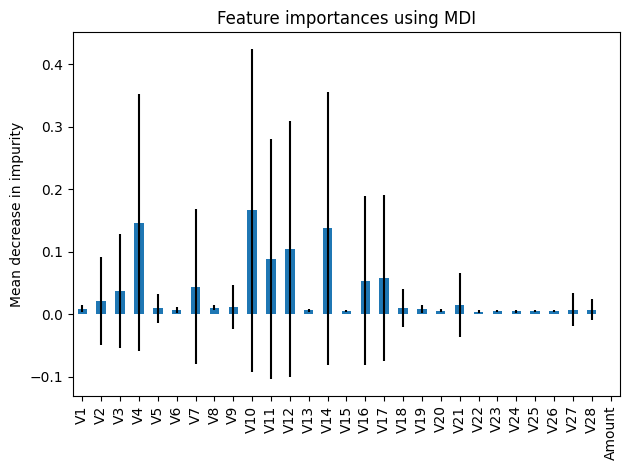

In [33]:
import time

import numpy as np

start_time = time.time()
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=df.drop(['Class'], axis=1).columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Permutation importance instead show us that it's V12, V4 and V14 that hold the greatest weight. Which isn't too far off since V12 was the 4th most important feature when using MDI

Elapsed time to compute the importances: 168.755 seconds


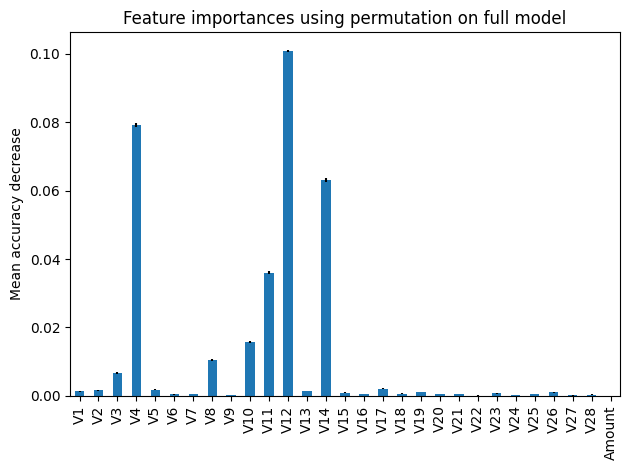

In [34]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=df.drop(['Class'], axis=1).columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Either way, V4, V10, V11, V12, and V14 are the most important features despite change in order of importance across both methods which match the heatmap as these are the features with the highest correlation (or inverse correlation) 